In [1]:
#nativos
import os
import unicodedata

#terceros
import pandas as pd
import pymssql
import missingno as msnolistad
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#propios
from utils_ficha import *
from querys import *

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  import sys


In [2]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass

In [3]:
#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

### Clientes Universo

In [4]:
sql_clientes = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
clientes = pd.read_sql(
   sql_clientes , connection_market
)
clientes.head(3)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,GARANTIZAR,202007,0016343477,CORPORACION OTINGSA,0,0,0,0,0,0,...,S,NORMAL,NORMAL,LA LIBERTAD,2019-08-29,2019-09-11,CONSTRUCCIÓN,2,20482843299,20482843299
1,None,202007,0011271101,TRANSCORD,0,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2009-07-31,2018-02-12,TRANSPORTE,2,20513208597,20513208597
2,None,202007,0015508354,TEOMA CORP,0,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2018-02-09,2018-02-09,SERVICIOS,2,20555731150,20555731150


In [5]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [6]:
sql_ = """
    SELECT * FROM ODS.HM_FEVE_REAJUSTADO_SEGUIR_COVID WITH (NOLOCK)
"""
reajustado = pd.read_sql(
   sql_ , connection_market
)
reajustado['CODUNICOCLI'] = reajustado['CU'].copy()
reajustado.head(3)

,CU,CLIENTE,SEGUIR COVID,PERIODO,SEGUIR_COVID,CODUNICOCLI
0,0012430609,SOCIEDAD AGRICOLA RAPEL,SI,202007,1,0012430609
1,0009230888,MIXERCON,SI,202007,1,0009230888
2,0013693786,MOVIL BUS,SI,202007,1,0013693786


In [7]:
reajustado['PERIODO'].value_counts()

202009    269
202010    263
202011    260
202008     71
202012     67
202007     44
Name: PERIODO, dtype: int64

In [8]:
clientes['PERIODO'].value_counts()

202007    1924
202008    1882
202009    1832
202010    1801
202012    1792
202101    1783
202011    1773
Name: PERIODO, dtype: int64

In [9]:
reajustado.dtypes

CU              object
CLIENTE         object
SEGUIR COVID    object
PERIODO         object
SEGUIR_COVID     int64
CODUNICOCLI     object
dtype: object

In [10]:
clientes = clientes.merge(
    reajustado[['CODUNICOCLI', 'PERIODO', 'SEGUIR_COVID']], how='left', on=['CODUNICOCLI', 'PERIODO']
)
clientes.head()

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC,SEGUIR_COVID
0,GARANTIZAR,202007,0016343477,CORPORACION OTINGSA,0,0,0,0,0,0,...,NORMAL,NORMAL,LA LIBERTAD,2019-08-29,2019-09-11,CONSTRUCCIÓN,2,20482843299,20482843299,NaN
1,None,202007,0011271101,TRANSCORD,0,0,0,0,0,0,...,NORMAL,NORMAL,LIMA,2009-07-31,2018-02-12,TRANSPORTE,2,20513208597,20513208597,NaN
2,None,202007,0015508354,TEOMA CORP,0,0,0,0,0,0,...,NORMAL,NORMAL,LIMA,2018-02-09,2018-02-09,SERVICIOS,2,20555731150,20555731150,NaN
3,None,202007,0014750165,PETROPACK,1,0,0,0,0,0,...,NORMAL,NORMAL,LIMA,2016-07-14,2016-07-14,INDUSTRIA,2,20513017147,20513017147,NaN
4,EX-FEVE,202008,0009426215,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,0,...,DEFICIENTE,C.P.P.,LIMA,2005-01-22,2005-01-22,OTROS,1,07977215,10079772157,NaN


In [11]:
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011,202012
FEVE,,,,,,
EX-FEVE,533,569,558,555,561,569
GARANTIZAR,385,310,245,182,151,133
RECUP.,0,0,0,0,0,4
REDUCIR,67,72,80,92,91,90
SALIR,19,22,24,25,23,26
SEGUIR,130,150,212,265,282,294


In [12]:
clientes['FEVE'] = clientes[['FEVE', 'SEGUIR_COVID']].apply(
    lambda _: 'SEGUIR COVID' if _[1] == 1 and _[0] not in ['REDUCIR', 'SALIR'] else _[0], axis=1
)
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011,202012
FEVE,,,,,,
EX-FEVE,533,568,532,548,559,566
GARANTIZAR,370,287,195,148,119,122
RECUP.,0,0,0,0,0,4
REDUCIR,67,72,80,92,91,90
SALIR,19,22,24,25,23,26
SEGUIR,103,105,100,115,125,244
SEGUIR COVID,42,69,199,194,192,64


In [13]:
#cruce = pd.crosstab(
#    clientes['SEI_MCDO'], clientes['FEVE']
#)
#cruce['total_referencial'] = cruce.sum(axis=1)#
#for col in cruce.columns:
#    cruce[col] =  cruce[col] / cruce['total_referencial']
    
#cruce

In [14]:
clientes['SEI_MCDO'] = clientes['SEI_MCDO'].fillna('DESCONOCIDO')

In [15]:
print(set(clientes['SEI_MCDO']))

{'ESTADO', 'ENERGÍA', 'DESCONOCIDO', 'MINERÍA', 'TURISMO Y HOSPEDAJE', 'RESTAURANTES', 'PESCA', 'TRANSPORTE', 'CONSTRUCCIÓN', 'TEXTIL', 'OTROS', 'COMERCIO', 'AUTOMOTRIZ VEHÍCULOS', 'INDUSTRIA', 'HIDROCARBUROS', 'AGROPECUARIO', 'SERVICIOS', 'TELECOMUNICACIONES', 'EDUCACIÓN', 'INMOBILIARIO'}


In [16]:
text_sei_mas_preocupa = 'RESTAURANTES%,%HIDROCARBUROS%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL'
text_sei_medio_peocupa = 'INDUSTRIA%,%CONSTRUCCIÓN%,%TRANSPORTE%,%MINERÍA%,%INMOBILIARIO'
text_sei_banca = 'RESTAURANTES%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL,%CONSTRUCCIÓN%,%TRANSPORTE, %TURISMO Y HOSPEDAJE'

clientes['sei_letal'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa).astype(int)
clientes['sei_preocupa'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa or _.upper() in text_sei_medio_peocupa).astype(int)
clientes['sei_observado_banca'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_banca).astype(int)

In [17]:
print(clientes.columns)

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca'],
      dtype='object')


In [18]:
clientes.shape

(12787, 43)

In [19]:
clientes['PERIODO'].value_counts(dropna=False)

202007    1924
202008    1882
202009    1832
202010    1801
202012    1792
202101    1783
202011    1773
Name: PERIODO, dtype: int64

In [20]:
#clientes['ESTADO_FICHA'] = clientes['ESTADO'].copy()
#clientes['ESTADO_FICHA'].value_counts()

In [21]:
clientes['BUCKET'].value_counts()

1    6531
2    3331
4    2218
3     707
Name: BUCKET, dtype: int64

In [22]:
sql_tc = """
    SELECT * FROM TIPO_CAMBIO WHERE FECHA = (SELECT MAX(FECHA) FROM TIPO_CAMBIO)
"""
tc = pd.read_sql(
   sql_tc , connection_market
)
tc.head(3)

,fecha,tc_punta,tc_promedio,TC_PUNTA_EUR
0,2021-01-11,3.617,3.62,4.400779


In [23]:
ultimo_tipo_cambio = tc.iloc[0]['tc_punta']
ultimo_tipo_cambio

3.617

In [24]:
ticket_promedio = (clientes.groupby(by=['BUCKET'])['RIESGO'].agg(['median']).apply(
    lambda _: round(_*ultimo_tipo_cambio, 1))
).to_dict()['median']

In [25]:
def format_monetary(val):
    if val < 1000000:
        return str(round(val/1000, 1)) + ' M'
    else:
        return str(round(val/1000000, 1)) + ' MM'

clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes['BUCKET'].map(ticket_promedio)
clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes[['TICKET_PROMEDIO_EN_RIESGO', 'BUCKET']].apply(lambda _: 'Bucket {} - {}'.format(
    int(_[1]), format_monetary(_[0])).replace(" ", "_"),  axis=1)

clientes['TICKET_PROMEDIO_EN_RIESGO'].value_counts()

Bucket_1_-_155.0_M    6531
Bucket_2_-_1.0_MM     3331
Bucket_4_-_6.7_MM     2218
Bucket_3_-_2.5_MM      707
Name: TICKET_PROMEDIO_EN_RIESGO, dtype: int64

In [26]:
clientes['FEVE'].value_counts()

EX-FEVE         3306
GARANTIZAR      1241
SEGUIR           792
SEGUIR COVID     760
REDUCIR          492
SALIR            139
RECUP.             4
Name: FEVE, dtype: int64

### Obtención del último mes cerrado 

In [27]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

now = datetime.now()
ultimo_mes_cerrado =  datetime.strptime((now - relativedelta(months=1)).strftime('%Y-%m'), '%Y-%m').strftime('%Y-%m-%d')
ultimo_mes_cerrado

'2020-12-01'

### CONFIGURACION Y ARMADO DE COSECHAS

In [28]:
first_valid_month = '2019-03-01'
first_analysis_month = '2020-07-01'  # 1er nmes de cosecha, ya que desde este messe triene universos BEL, BEP, GE
first_init_valid = '2018-04-01'

In [29]:
rango_general =  [_ for _ in list(pd.date_range(first_analysis_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general)

[Timestamp('2020-07-01 00:00:00', freq='MS'), Timestamp('2020-08-01 00:00:00', freq='MS'), Timestamp('2020-09-01 00:00:00', freq='MS'), Timestamp('2020-10-01 00:00:00', freq='MS'), Timestamp('2020-11-01 00:00:00', freq='MS'), Timestamp('2020-12-01 00:00:00', freq='MS')]


In [30]:
tramos = []
for periodo_base in rango_general:
    
    rango_particular = [
        int(_.strftime('%Y%m')) for _ in list(
            pd.date_range((periodo_base - relativedelta(months=11)), (periodo_base + relativedelta(months=2)), freq='MS')
        )
    ]
    
    tramos.append(
        (int(periodo_base.strftime('%Y%m')),             #mes cerrado de la cosecha del mes siguiente
         rango_particular,  # listado 14 periodos sumando dos adelante y restando 11 periodos atras
         rango_particular[-8:-2],
         rango_particular[-5:-2],
         rango_particular[:2],     # 2 meses delante de la coasecha (año previo)
         rango_particular[-2:])    # 2 meses delante de la coasecha (año actual)
    )

print("EJEMPLO:")
print(
    str(tramos[-4][0]) + ' mes cerrado de la cosecha de ' + str(tramos[-4][1][-3]), tramos[-4][2], tramos[-4][3],
    '\n',  'historia',
    '\n', tramos[-4][1][:-2],  '\n',  '-'*100,  '\n',tramos[-4][-1],  '\n',  '-'*100,  '\n',tramos[-4][-2]
)

EJEMPLO:
202009 mes cerrado de la cosecha de 202009 [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009] 
 historia 
 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009] 
 ---------------------------------------------------------------------------------------------------- 
 [202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911]


##### EJEMPLOS COSECHAS

In [31]:
print("EJEMPLO:")
print(
    str(tramos[-3][0]) + ' es cerrado de la cosecha de ' + str(tramos[-3][1][-3]),
    tramos[-3][2], tramos[-3][3], '\n',  'historia',
    '\n', tramos[-3][1][:-2],  '\n',  '-'*100,  '\n',tramos[-3][-1],  '\n',  '-'*100,  '\n',tramos[-3][-2]
)

EJEMPLO:
202010 es cerrado de la cosecha de 202010 [202005, 202006, 202007, 202008, 202009, 202010] [202008, 202009, 202010] 
 historia 
 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010] 
 ---------------------------------------------------------------------------------------------------- 
 [202011, 202012] 
 ---------------------------------------------------------------------------------------------------- 
 [201911, 201912]


In [32]:
print("EJEMPLO:")
print(
    str(tramos[-1][0]) + ' es cerrado de la cosecha de ' + str(tramos[-1][1][-3]),
    tramos[-1][2], tramos[-1][3], '\n',  'historia',
    '\n', tramos[-1][1][:-2],  '\n',  '-'*100,  '\n',tramos[-1][-1],  '\n',  '-'*100,  '\n',tramos[-1][-2]
)

EJEMPLO:
202012 es cerrado de la cosecha de 202012 [202007, 202008, 202009, 202010, 202011, 202012] [202010, 202011, 202012] 
 historia 
 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] 
 ---------------------------------------------------------------------------------------------------- 
 [202101, 202102] 
 ---------------------------------------------------------------------------------------------------- 
 [202001, 202002]


In [33]:
rango_general_int = [_[0] for _ in tramos]
print(rango_general_int)

[202007, 202008, 202009, 202010, 202011, 202012]


In [34]:
rango_general_int =  [int(_.strftime('%Y%m'))  for _ in list(pd.date_range(first_valid_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]


In [35]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data,
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    pivoteo.columns = columns + index + [col_name]
    
    contador = 1
    dicc = {col_name: list}
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)
    
        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=index).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': index[0]})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

### CREACION DE BASE

In [36]:
clientes.shape, clientes['CODUNICOCLI'].unique().shape

((12787, 44), (2071,))

In [37]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO'],
      dtype='object')

In [38]:
clientes['NUM_RUC'].isnull().sum(),  clientes['CODDOC'].isnull().sum()

(1784, 1784)

In [39]:
print(clientes.shape)
clientes = clientes[clientes['NUM_RUC'].notnull()]
print(clientes.shape)

(12787, 44)
(11003, 44)


In [40]:
clientes['ESTADO'].value_counts(dropna=False)

NaN             8478
CON CONOCEME    1026
VALIDADO         965
LLENADO          534
Name: ESTADO, dtype: int64

In [41]:
clientes['COD_UNICO'] = clientes['CODUNICOCLI'].copy()
clientes['RUC'] = clientes['NUM_RUC'].copy()
clientes['UNIVERSO_MESA'] = 1

base = clientes[['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO',
       'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca',
       'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']]
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,sei_preocupa,sei_letal,sei_observado_banca,TICKET_PROMEDIO_EN_RIESGO,UNIVERSO_MESA
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NORMAL,LA LIBERTAD,2019-08-29,2019-09-11,CONSTRUCCIÓN,1,0,1,Bucket_1_-_155.0_M,1
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,NORMAL,LIMA,2009-07-31,2018-02-12,TRANSPORTE,1,0,1,Bucket_2_-_1.0_MM,1
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NORMAL,LIMA,2018-02-09,2018-02-09,SERVICIOS,0,0,0,Bucket_1_-_155.0_M,1
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,NORMAL,LIMA,2016-07-14,2016-07-14,INDUSTRIA,1,0,0,Bucket_1_-_155.0_M,1
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,C.P.P.,LIMA,2005-01-22,2005-01-22,OTROS,0,0,0,Bucket_1_-_155.0_M,1


In [42]:
base['CLASIF_NO_NORMAL'] = base[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0] != 'NORMAL' or _[1] != 'NORMAL', axis=1).astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
base['DES_GRUPO_ECONOMICO'].value_counts(dropna=False)

                                 364
MINISTERIO DE ENERGIA Y MINAS     60
MUSTAFA AGUINAGA                  42
LEÑA Y CARBON                     36
MASIAS MARROU                     36
                                ... 
SANCHEZ DIA                        1
QUESADA                            1
GRUPO DIMERC                       1
MULTIVALORES                       1
PEREZ TAIMAN                       1
Name: DES_GRUPO_ECONOMICO, Length: 1588, dtype: int64

In [44]:
base.shape

(11003, 42)

In [45]:
base['NO_EST_ASOCIADO_A_GRUPO_ECONOMICO'] = base['DES_GRUPO_ECONOMICO'].apply(lambda _: pd.isnull(_) or _.strip() == '').astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ANALISIS DE GRUPO ECONOMICO

In [46]:
ge = """
    SELECT * FROM ODS.HD_VMVP_VPC_GRUPO_ECONOMICO_ALERTA with (nolock)
"""
ge = pd.read_sql(
   ge , connection_market
)
ge.head(3)

,DES_GRUPO_ECONOMICO,PERIODO,NRO_MIEMBROS_GRUPO_ECONOMICO,NRO_CLASIF_NO_NORMAL,NRO_FEVE_DURO,NRO_FEVE_SEGUIR
0,LA MORA,202003,3,0,0,0
1,JAGUANDE GAYOSO,202008,7,0,0,0
2,VLG PERU,202007,10,3,0,0


In [47]:
ge['PERCENT_GRUPO_ECON_VPC_SEGUIR'] = ge['NRO_FEVE_SEGUIR'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_FEVE_DURO'] = ge['NRO_FEVE_DURO'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']

ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=2).astype(int)
ge['TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>=1).astype(int)
ge['TIENE_1_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=1).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>=2).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=2).astype(int)

ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] =ge['NRO_FEVE_DURO'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=3).astype(int)

ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.1).astype(int)

ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.2).astype(int)

ge = ge.rename(columns={
    'NRO_CLASIF_NO_NORMAL': 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON',
    'NRO_FEVE_SEGUIR': 'NRO_FEVE_SEGUIR_GRUPO_EECON',
    'NRO_FEVE_DURO': 'NRO_FEVE_DURO_GRUPO_EECON'
})
del ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge.head()

,DES_GRUPO_ECONOMICO,PERIODO,NRO_CLASIF_NO_NORMAL_GRUPO_EECON,NRO_FEVE_DURO_GRUPO_EECON,NRO_FEVE_SEGUIR_GRUPO_EECON,PERCENT_GRUPO_ECON_VPC_SEGUIR,PERCENT_GRUPO_ECON_VPC_FEVE_DURO,PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,...,TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL
0,LA MORA,202003,0,0,0,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,JAGUANDE GAYOSO,202008,0,0,0,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VLG PERU,202007,3,0,0,0.000000,0.0,0.3,0,0,...,1,0,0,1,0,0,1,0,0,1
3,COCHACHIN,202005,0,0,0,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CORDERO GARCIA ZAPATERO,202007,0,0,1,0.166667,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [48]:
base.shape

(11003, 43)

In [49]:
ge['PERIODO'] = ge['PERIODO'].astype(str)
base = base.merge(
    ge, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
base.shape

(11003, 63)

In [50]:
acum = generate_listado_u3m(
    ge, 'listados_percent', values='PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL',
    index=['DES_GRUPO_ECONOMICO'], columns=['PERIODO'], aggfunc=np.max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(5677, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(11354, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(17031, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(22708, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(28385, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(34062, 3)


,DES_GRUPO_ECONOMICO,listados_percent,PERIODO
0,,"[0.23563093071395028, 0.23563093071395028, 0.3...",202007
1,4PACK,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
2,7 SAMURAI,"[0.3333333333333333, 0.3333333333333333, 0.333...",202007
3,A F & ASOCIADOS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
4,A MONTENEGRO Y CIA,"[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]",202007


<AxesSubplot:>

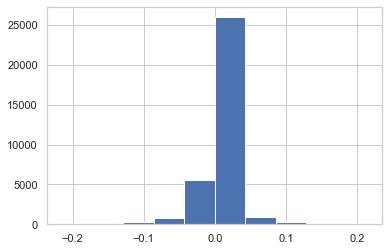

In [51]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['GRUPO_ECON_TIENE_TENDENCIA_AUMENTO_CLASIF_NO_NORMAL_U7M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'].apply(lambda _: _ > 0)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'].hist()

<AxesSubplot:>

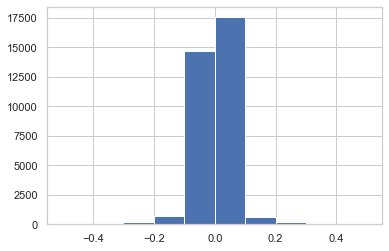

In [52]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])
acum['GRUPO_ECON_TIENE_TENDENCIA_AUMENTO_CLASIF_NO_NORMAL_U3M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'].apply(lambda _: _ > 0)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'].hist()

In [53]:
acum['GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)

acum['GRUPO_ECON_MANTIENE_TENDENCIA_FUERTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M']].apply(
    lambda _: _[0] > 0.001 and _[1] > 0.001, axis=1
).astype(int)

pd.crosstab(
    acum['GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL'], acum['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011,202012
GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL,,,,,,
0,5431,5340,5412,5423,5446,5457
1,246,337,265,254,231,220


In [54]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
base.shape

(11003, 70)

## ANALISIS SEI MERCADO

In [55]:
ge = """
    SELECT * FROM ODS.HD_VMVP_VPC_SEI_ALERTA_CARTERA WITH (NOLOCK)
"""
ge = pd.read_sql(
   ge , connection_market
)
ge['PERCENT_SEI_VPC_SEGUIR'] = ge['NRO_FEVE_SEGUIR'] / ge['NRO_MISMO_SEI']
ge['PERCENT_SEI_VPC_FEVE_DURO'] = ge['NRO_FEVE_DURO'] / ge['NRO_MISMO_SEI']
ge['PERCENT_SEI_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'] / ge['NRO_MISMO_SEI']

ge.head()

,SEI_MCDO,PERIODO,NRO_MISMO_SEI,NRO_CLASIF_NO_NORMAL,NRO_FEVE_DURO,NRO_FEVE_SEGUIR,PERCENT_SEI_VPC_SEGUIR,PERCENT_SEI_VPC_FEVE_DURO,PERCENT_SEI_VPC_NO_CLASIF_NORMAL
0,AUTOMOTRIZ VEHÍCULOS,202010,2408,1007,28,32,0.013289,0.011628,0.418189
1,AUTOMOTRIZ VEHÍCULOS,202012,2410,1024,27,36,0.014938,0.011203,0.424896
2,AUTOMOTRIZ VEHÍCULOS,202001,2383,930,25,28,0.011750,0.010491,0.390264
3,AUTOMOTRIZ VEHÍCULOS,202011,2409,1020,27,36,0.014944,0.011208,0.423412
4,AUTOMOTRIZ VEHÍCULOS,202002,2383,930,25,28,0.011750,0.010491,0.390264


<AxesSubplot:>

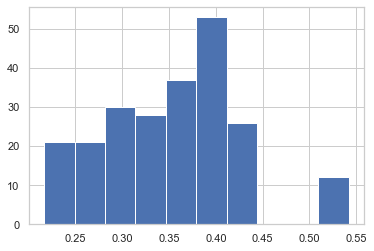

In [56]:
ge['PERCENT_SEI_VPC_NO_CLASIF_NORMAL'].hist()

<AxesSubplot:>

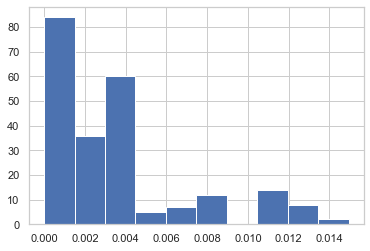

In [57]:
ge['PERCENT_SEI_VPC_SEGUIR'].hist()

In [58]:
top_percent_seguir = ge['PERCENT_SEI_VPC_SEGUIR'].quantile(0.9)
top_percent_seguir

0.011020230878457717

In [59]:
ge[ge['PERCENT_SEI_VPC_SEGUIR'] >= top_percent_seguir]['SEI_MCDO'].unique()

array(['AUTOMOTRIZ VEHÍCULOS', 'PESCA'], dtype=object)

In [60]:
ge['SEI_TOP_PERCENT_FEVE_SEGUIR'] = ge['PERCENT_SEI_VPC_SEGUIR'].apply(lambda _: _ >= top_percent_seguir).astype(int)
ge['TIENE_10PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.1).astype(int)
ge['TIENE_20PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.2).astype(int)
ge['TIENE_25PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.25).astype(int)
ge['TIENE_30PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.3).astype(int)
ge['TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.35).astype(int)
ge['TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.4).astype(int)
ge['TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.45).astype(int)

del ge['NRO_CLASIF_NO_NORMAL']
del ge['NRO_FEVE_SEGUIR']
del ge['NRO_FEVE_DURO']
del ge['NRO_MISMO_SEI']

ge.head()

,SEI_MCDO,PERIODO,PERCENT_SEI_VPC_SEGUIR,PERCENT_SEI_VPC_FEVE_DURO,PERCENT_SEI_VPC_NO_CLASIF_NORMAL,SEI_TOP_PERCENT_FEVE_SEGUIR,TIENE_10PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_25PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_30PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL
0,AUTOMOTRIZ VEHÍCULOS,202010,0.013289,0.011628,0.418189,1,1,1,1,1,1,1,1
1,AUTOMOTRIZ VEHÍCULOS,202012,0.014938,0.011203,0.424896,1,1,1,1,1,1,1,1
2,AUTOMOTRIZ VEHÍCULOS,202001,0.011750,0.010491,0.390264,1,1,1,1,1,1,1,1
3,AUTOMOTRIZ VEHÍCULOS,202011,0.014944,0.011208,0.423412,1,1,1,1,1,1,1,1
4,AUTOMOTRIZ VEHÍCULOS,202002,0.011750,0.010491,0.390264,1,1,1,1,1,1,1,1


In [61]:
ge['PERIODO'] = ge['PERIODO'].astype(str)
base = base.merge(
    ge, how='left', on=['PERIODO', 'SEI_MCDO']
)
base.shape

(11003, 81)

In [62]:
acum = generate_listado_u3m(
    ge, 'listados_percent', values='PERCENT_SEI_VPC_NO_CLASIF_NORMAL',
    index=['SEI_MCDO'], columns=['PERIODO'], aggfunc=np.max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(19, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(38, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(57, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(76, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(95, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(114, 3)


,SEI_MCDO,listados_percent,PERIODO
0,AGROPECUARIO,"[0.3509020040702287, 0.3509020040702287, 0.382...",202007
1,AUTOMOTRIZ VEHÍCULOS,"[0.39026437263953, 0.39026437263953, 0.4182046...",202007
2,COMERCIO,"[0.3059329066581786, 0.3059329066581786, 0.367...",202007
3,CONSTRUCCIÓN,"[0.3151241934058163, 0.3151241934058163, 0.380...",202007
4,EDUCACIÓN,"[0.2723090367019636, 0.2723090367019636, 0.276...",202007


<AxesSubplot:>

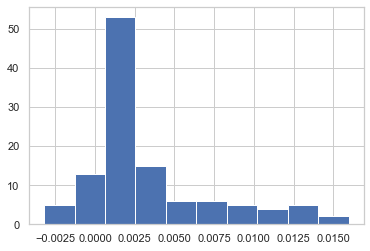

In [63]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U7M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'].apply(lambda _: _> 0).astype(int)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'].hist()

<AxesSubplot:>

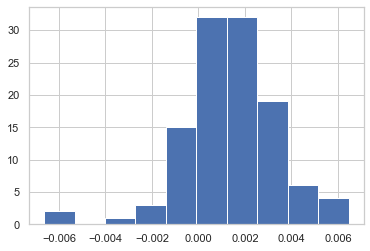

In [64]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])
acum['TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U3M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'].apply(lambda _: _> 0).astype(int)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'].hist()

In [65]:
acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_FUERTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M']].apply(
    lambda _: _[0] > 0.001 and _[1] > 0.001, axis=1
).astype(int)

acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)

pd.crosstab(
    acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL'], acum['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011,202012
SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL,,,,,,
0,11,3,3,4,2,6
1,8,16,16,15,17,13


In [66]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'SEI_MCDO']
)
base.shape

(11003, 88)

In [67]:
#cols_new_dataFrame = list(new_dataFrame.columns)
#print('cols_new_dataFrame :', cols_new_dataFrame)

#for cliente in base['COD_UNICO'].unique():
    
#    data_cliente = base[base['COD_UNICO'] == cliente]
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
#    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int).reset_index()
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
#    data_cliente['COD_UNICO'] = cliente
    
#    new_dataFrame = pd.concat(
#        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
#    )

#del data_cliente
#base = new_dataFrame.copy()
#del new_dataFrame

#new_dataFrame['PERIODO'].value_counts()

In [68]:
#base = new_dataFrame.merge(
#    base[['COD_UNICO', 'BUCKET', 'FEVE_FICHA', 'ESTADO_FICHA', 'RIESGO', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']],
#    how='left', on=['COD_UNICO']
#)
#del new_dataFrame
base['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202012    1792
202011    1773
Name: PERIODO, dtype: int64

In [69]:
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,listados_percent_y,TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M,TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U7M,TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M,TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U3M,SEI_MANTIENE_TENDENCIA_CRECIENTE_FUERTE_CLASIF_NO_NORMAL,SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,1,1,1,"[0.3151241934058163, 0.3151241934058163, 0.380...",0.011926,1,-0.000662,0,0,0
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,1,1,1,"[0.30995128740431455, 0.30995128740431455, 0.3...",0.010616,1,-0.000302,0,0,0
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,1,1,1,"[0.2784560918449283, 0.2784560918449283, 0.327...",0.008768,1,-0.000727,0,0,0
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,1,1,1,"[0.33848038543466535, 0.33848038543466535, 0.4...",0.012820,1,0.000319,1,0,1
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,1,1,1,"[0.21664525531979875, 0.21664525531979875, 0.2...",0.006532,1,-0.000299,0,0,0


In [70]:
base.shape

(11003, 88)

In [71]:
#[col for col in base.columns if 'preocupa' in col.lower()]

In [72]:
#base[base['COD_UNICO'] == '0011702929'].sort_values(by=['PERIODO'])

In [73]:
base['CLASIF_NO_NORMAL'] = base['CLASIF_NO_NORMAL'].astype(int)

### LINEAS

In [74]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,MAX_VENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,202012,0012547086,MINORISTA,2021-11-15,330000.0,63820.53,0.0,VENCIDA,VENCIDA
1,202012,0008442926,EMPRESA,2021-02-15,22700000.0,0.00,9333000.0,VIGENTE,VIGENTE


In [75]:
lineas['PERIODO'].max(), lineas['PERIODO'].min()

('202012', '201901')

In [76]:
#lineas[lineas['COD_UNICO'] == '0000002469'].sort_values(by=['PERIODO'])

#### Buscando viegentes

In [77]:
acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='MAX_VENCIMIENTO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1463, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(2926, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(4389, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5852, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7315, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(8778, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
1,0000003392,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
2,0000006114,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007
4,0000037374,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007


In [78]:





acum.tail(5)

,COD_UNICO,listados_vigentes,PERIODO
1458,0017023529,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",202012
1459,0017122537,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]",202012
1460,0017232155,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]",202012
1461,0017239443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",202012
1462,0017311917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",202012


In [79]:
def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

acum['NO_TIENE_LINEA_VIGENTE_MES_ACTUAL'] = acum['listados_vigentes'].apply(lambda _: _[-1] == 0).astype(int)
acum['TIENE_LINEAS_VIGENTES_MES_ACTUAL'] = acum['listados_vigentes'].apply(lambda _: _[-1] == 1).astype(int)
acum['NRO_MESES_SIN_LINEA_VIGENTE'] = acum['listados_vigentes'].apply(searhc_no_zero).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U2M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0 or _[-3] > 0).astype(int)
acum['TIENE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 2).astype(int)
acum['TIENE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 3).astype(int)
acum['TIENE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 3).astype(int)
acum['TIENE_MAS_DE_1MES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 1).astype(int)
acum['TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 2).astype(int)
acum['TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 3).astype(int)
acum['TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 4).astype(int)
acum['TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 5).astype(int)
acum['TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 6).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,NO_TIENE_LINEA_VIGENTE_MES_ACTUAL,TIENE_LINEAS_VIGENTES_MES_ACTUAL,NRO_MESES_SIN_LINEA_VIGENTE,TIENE_UNA_O_MAS_LINEAS_VIGENTES_U2M,TIENE_UNA_O_MAS_LINEAS_VIGENTES_U3M,TIENE_2MESES_SIN_LINEA_VIGENTE,TIENE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_1MES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE
1458,0017023529,202012,0,1,0,1,1,0,0,0,0,0,0,0,0
1459,0017122537,202012,0,1,0,1,1,0,0,0,0,0,0,0,0
1460,0017232155,202012,0,1,0,1,1,0,0,0,0,0,0,0,0
1461,0017239443,202012,0,1,0,1,1,0,0,0,0,0,0,0,0
1462,0017311917,202012,0,1,0,1,1,0,0,0,0,0,0,0,0


In [80]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(11003, 101)

In [81]:
#assert  False

### LINEAS ORIGEN (WBC_LINEAS)

In [82]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ORIGEN_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,NRO_LINEA,FECHARENOVACION,FECHAVENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,202010,0010752805,EMPRESA,32072785,2012-07-25,2012-07-26,209798.33,209798.33,0.0,VENCIDA,VENCIDA
1,202010,0010752805,EMPRESA,31094011,2011-12-01,2011-12-31,522000.00,522000.00,0.0,VENCIDA,VENCIDA


In [83]:

acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='NRO_LINEA',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1854, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3708, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5562, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7416, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9270, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(11124, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[1, 1, 1, 1, 0, 0, 2, 2, 2, 2]",202007
1,0000003392,"[4, 4, 5, 5, 6, 7, 7, 8, 7, 7]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",202007
3,0000008318,"[5, 5, 6, 6, 6, 7, 7, 7, 7, 7]",202007
4,0000037374,"[3, 3, 3, 3, 3, 3, 4, 4, 4, 3]",202007


In [84]:
acum.tail()

,COD_UNICO,listados_vigentes,PERIODO
1849,0017239443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",202012
1850,0017311917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]",202012
1851,0017316313,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",202012
1852,0017415833,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",202012
1853,0017492799,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",202012


In [85]:
acum['TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-3] >= _[-2] and _[-2 ] > _[-1] ).astype(int)
acum['TIENE_MAYOR_NRO_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-3] <= _[-2] and _[-2 ] < _[-1] ).astype(int)
acum['TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 1).astype(int)
acum['TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 2).astype(int)
acum['TIENE_1_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 1 and sum(_[-3:]) / 3 > 0).astype(int)
acum['TIENE_2_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 2 and sum(_[-3:]) / 3 > 1).astype(int)
acum['TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 2).astype(int)
acum['TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 3).astype(int)
acum['TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 4).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M,TIENE_MAYOR_NRO_LINEAS_VIGENTES_U3M,TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT,TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT,TIENE_1_LINEA_VIGENTE_U3M,TIENE_2_LINEA_VIGENTE_U3M,TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M
1849,0017239443,202012,0,0,0,0,1,0,0,0,0
1850,0017311917,202012,0,0,0,0,0,1,0,0,0
1851,0017316313,202012,0,0,0,0,1,0,0,0,0
1852,0017415833,202012,0,1,0,0,1,0,0,0,0
1853,0017492799,202012,0,1,0,0,1,0,0,0,0


In [86]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(11003, 110)

## NRO DE TRBAJADORES

In [87]:
sql_ = """
    SELECT *
    FROM ODS.HM_VMVP_NRO_TRABAJADOES_ALERTA_CARTERA WITH (NOLOCK)
"""
workers = pd.read_sql(
   sql_ , connection_market
)
workers.head(2)

,RUC,PERIODO,NRO_TRABAJADORES,NRO_PENSIONISTAS,NRO_PRESTADORES_SERVICIO,FECHA_CARGA
0,20110598646,201910,159.0,0.0,16.0,2020-12-02 10:14:00
1,20110598646,201911,159.0,0.0,11.0,2020-12-02 10:14:00


In [88]:
# Se auemnta un periodo por el desfase de la información
workers['PERIODO'] = workers['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [89]:
workers['PERIODO'].value_counts().sort_index()

201911    1882
201912    1882
202001    3731
202002    3731
202003    3731
202004    3731
202005    3731
202006    3731
202007    3731
202008    3731
202009    3731
202010    3731
202011    1849
202012    1849
Name: PERIODO, dtype: int64

In [90]:
acum = generate_listado_u3m(
    workers, 'listados_workers', values='NRO_TRABAJADORES', index=['RUC'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(2015, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(4030, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(6045, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(8060, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(10075, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12090, 3)


,RUC,listados_workers,PERIODO
0,10010600338,"[23, 23, 46, 44, 42, 42, 42, 42, 44]",202007
1,10011231581,"[6, 6, 12, 12, 12, 12, 12, 12, 12]",202007
2,10028918041,"[31, 21, 40, 52, 44, 34, 30, 30, 30]",202007
3,10052682041,"[6, 6, 12, 12, 12, 12, 10, 10, 10]",202007
4,10090993866,"[105, 97, 188, 184, 164, 156, 138, 90, 80]",202007


In [91]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    
    if not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS'] = acum['listados_workers'].apply(lambda _: (_[0] - _[-1]) > 0 ).astype(int)
acum['TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT'] = acum['listados_workers'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_A_DISMINUIR_NRO_TRABAJADORES_SUNAT_U7M'] = acum['TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['NO_TIENE_TRABAJADORES_REGISTRADOS'] = acum['listados_workers'].apply(lambda _: sum(_) == 0).astype(int)
del acum['listados_workers']

acum.head()

,RUC,PERIODO,TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS,TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT,TENDENCIA_A_DISMINUIR_NRO_TRABAJADORES_SUNAT_U7M,TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS
0,10010600338,202007,0,-3.571429e-01,1,0,0,0,0,0,0,0
1,10011231581,202007,0,-6.005182e-16,1,0,0,0,0,0,0,0
2,10028918041,202007,1,-3.142857e+00,1,1,1,1,0,0,0,0
3,10052682041,202007,0,-4.285714e-01,1,1,0,0,0,0,0,0
4,10090993866,202007,1,-1.921429e+01,1,1,1,1,1,1,0,0


In [92]:
acum['RUC'] = acum['RUC'].astype(str)
acum['PERIODO'] = acum['PERIODO'].astype(str)

base = base.merge(
    acum, how='left', on=['PERIODO', 'RUC']
)
base.shape

(11003, 120)

In [93]:
def get_div_means_perios(val_anio_act , val_anio_pas):
    if pd.isnull(val_anio_act) or not val_anio_act:
        return 0
    
    if pd.isnull(val_anio_pas) or not val_anio_pas:
        return val_anio_act
    
    return val_anio_act / val_anio_pas

# REACTIVA

In [94]:
sql1 = """
    SELECT * FROM ODS.HD_VMVP_REACTIVA_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
interno_reactiva_ibk = pd.read_sql(
   sql1 , connection_market
)
interno_reactiva_ibk.head(2)

,ESTADO_DESEMBOLSO,CERTIFICADO,FECHA_FIN_CREDITO,FECHA_DESEMBOLSO,PERIODO,HORARIO,TIP_DOC,NUM_DOC,RAZON_SOCIAL,APE_PATERNO,...,FLG_DJ_REACTIVA_1,TIPO_REACTIVA,FLG_TOMO_REACTIVA_1,MONTO_PRESTAMO_REACTIVA_1,FLG_REGIMEN_RUS,INGRESOS_MENSUAL_2019_PROMEDIO,COMPRAS_MENSUAL_2019_PROMEDIO,FLG_DJ_ANEXO_4,FLG_DJ_REQUISITOS,FLG_RP
0,Desembolsado,CGAR2-2020-0106674,2023-07-14,2020-07-29,20200716,11:12:00,RUC,20510913371,COINREFRI AIR,,...,1.0,2,2.0,2200551.0,0.0,0.0,0.0,1.0,1.0,1
1,Desembolsado,CGAR2-2020-0106679,2023-07-09,2020-07-24,20200716,11:12:00,RUC,20516485524,BFX,,...,1.0,2,1.0,1117000.0,0.0,0.0,0.0,1.0,1.0,1


In [95]:
interno_reactiva_ibk['PERIODO'] = interno_reactiva_ibk['FECHA_DESEMBOLSO'].apply(lambda _: int(_.replace('-', '')[:6]))
interno_reactiva_ibk['PERIODO'].value_counts(dropna=False)

202005    627
202007    174
202006    154
202008    117
202009     38
202010     13
202011      2
Name: PERIODO, dtype: int64

In [96]:
pivoteo = pd.pivot_table(
    interno_reactiva_ibk[['CODUNICOCLI', 'PERIODO', 'TIPO_REACTIVA']], 
    index=['CODUNICOCLI'], columns=['PERIODO'], aggfunc=len, values='TIPO_REACTIVA',fill_value=0
)
pivoteo.head()

PERIODO,202005,202006,202007,202008,202009,202010,202011
CODUNICOCLI,,,,,,,
0000002469,0,0,0,1,0,0,0
0000006114,1,0,0,0,0,0,0
0000008318,0,0,1,0,0,0,0
0000039982,0,0,1,0,0,0,0
0000046268,1,0,1,0,0,0,0


In [97]:
# Adaptacion Rractiva faltantes en meses psoteriores a Noviembre --- 07/01/2021

columnas_pivoteo = [int(_) for _ in pivoteo.columns]                 
for column in [mes for mes in rango_general_int if int(mes) >= columnas_pivoteo[0]]:
    if column not in columnas_pivoteo:
        pivoteo[column] = 0

pivoteo.head()

PERIODO,202005,202006,202007,202008,202009,202010,202011,202012
CODUNICOCLI,,,,,,,,
0000002469,0,0,0,1,0,0,0,0
0000006114,1,0,0,0,0,0,0,0
0000008318,0,0,1,0,0,0,0,0
0000039982,0,0,1,0,0,0,0,0
0000046268,1,0,1,0,0,0,0,0


In [98]:
columnas_ordenadas = sorted(pivoteo.columns, reverse=False)

for col in columnas_ordenadas[1:]:
    posicion_columna = columnas_ordenadas.index(col)
    #print(posicion_columna)
    print(posicion_columna, col, columnas_ordenadas[posicion_columna -1])
    pivoteo[col] = pivoteo[
        [columnas_ordenadas[posicion_columna -1], col]
    ].sum(axis=1)

pivoteo.head()

1 202006 202005
2 202007 202006
3 202008 202007
4 202009 202008
5 202010 202009
6 202011 202010
7 202012 202011


PERIODO,202005,202006,202007,202008,202009,202010,202011,202012
CODUNICOCLI,,,,,,,,
0000002469,0,0,0,1,1,1,1,1
0000006114,1,1,1,1,1,1,1,1
0000008318,0,0,1,1,1,1,1,1
0000039982,0,0,1,1,1,1,1,1
0000046268,1,1,2,2,2,2,2,2


In [99]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_IBK']
pivoteo['TIENE_REACTIVA_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'].value_counts(dropna=False))
pivoteo.head(3)

0    4751
1    1849
Name: TIENE_REACTIVA1_REACTIVA2_IBK, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK
0,202005,0000002469,0,0,0
1,202005,0000006114,1,1,0
2,202005,0000008318,0,0,0


In [100]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(11003, 123)

### REACTIVA RCC

In [101]:
sql_reactiva_rcc = """
    SELECT * FROM ODS.HD_VMVP_REACTIVA_ALERTAS_CARTERA_BE     
"""
reactiva = pd.read_sql(
   sql_reactiva_rcc , connection_market  ## # aCTUALIZACION TABLA 
)

## Se le suma un mes para que la info de rcc se use el mes siguiente
reactiva['PERIODO'] = reactiva['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo = pd.pivot_table(
    reactiva[['COD_UNICO', 'PERIODO', 'NBR_EMPRESA']], 
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len, values='NBR_EMPRESA',fill_value=0
)

del reactiva
pivoteo.head()

PERIODO,202006,202007,202008,202009,202010,202011,202012
COD_UNICO,,,,,,,
0000002469,2,2,2,3,3,3,3
0000003392,2,2,2,2,2,2,2
0000006114,1,1,1,1,1,1,1
0000008318,0,0,1,1,1,1,1
0000037374,2,2,2,2,2,2,2


In [102]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_SF']
pivoteo['TIENE_REACTIVA_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'].value_counts(dropna=False))
pivoteo.head(3)

1    7451
0    4792
Name: TIENE_REACTIVA1_REACTIVA2_SF, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202006,0000002469,2,1,1
1,202006,0000003392,2,1,1
2,202006,0000006114,1,1,0


In [103]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(11003, 126)

In [104]:
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [105]:
for col in [_ for _ in base.columns if 'REACTIVA' in _.upper()]:
    base[col] = base[col].fillna(0)

base['TIENE_REACTIVA_CON_OTRA_EF'] = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'] = base[['TIENE_REACTIVA1_REACTIVA2_SF', 'TIENE_REACTIVA_IBK']].apply(
    lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)

base['TIENE_REACTIVA_SF']  = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 0 and _[1] == 1 else 0, axis=1) #si tiene reactiva en IBK --> entonces tambien SF en dos mese adlante

base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'] = base['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ == 1).astype(int)
base['TIENE_REACTIVA_CON_OTRA_EF'].value_counts()

0    6257
1    4746
Name: TIENE_REACTIVA_CON_OTRA_EF, dtype: int64

In [106]:
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'].value_counts(dropna=False)

0    6436
1    4567
Name: TIENE_REACTIVA_1_2_CON_OTRAS_EF, dtype: int64

In [107]:
base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'].value_counts(dropna=False)

0    7603
1    3400
Name: TIENE_SOLO_1_CREDITO_REACTIVA_SF, dtype: int64

#### Review Cosechas JUlio y Agosto - REACTIVA IBK

In [108]:
base[base['PERIODO'].astype(int) >= 202007]['TIENE_REACTIVA_IBK'].value_counts()

0.0    6605
1.0    4398
Name: TIENE_REACTIVA_IBK, dtype: int64

In [109]:
base.isnull().sum()

PERIODO                             0
COD_UNICO                           0
RUC                                 0
FLG_VIGENTE                         0
NOMBRE_COMPLETO                     0
                                   ..
TIENE_REACTIVA_SF                   0
TIENE_REACTIVA1_REACTIVA2_SF        0
TIENE_REACTIVA_CON_OTRA_EF          0
TIENE_REACTIVA_1_2_CON_OTRAS_EF     0
TIENE_SOLO_1_CREDITO_REACTIVA_SF    0
Length: 129, dtype: int64

In [110]:
base.shape
base[base['PERIODO'].astype(int) >= 202007]['BUCKET'].value_counts()

1    5607
2    2884
4    1900
3     612
Name: BUCKET, dtype: int64

# TRANSACCIONES

In [111]:
import gc
gc.collect()

145

In [112]:
sql_trx_cliente = """
    SELECT * FROM ODS.HD_VMVP_TRANSACCION_CLIENTE_ALERTAS_CARTERA_BE
"""
transac_cliente = pd.read_sql(
   sql_trx_cliente , connection_market
)

print(transac_cliente.shape)
transac_cliente.groupby(by=['PERIODO']).size()

(184099, 9)


PERIODO
201904    7908
201905    8325
201906    8101
201907    8393
201908    8218
201909    8662
201910    8547
201911    8846
201912    8725
202001    8801
202002    8571
202003    8427
202004    6997
202005    8280
202006    8381
202007    9015
202008    9035
202009    9013
202010    9092
202011    9252
202012    9316
202101    4194
dtype: int64

In [113]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION
0,2019,201905,0013121592,CASH OUT,NO_CONS,OTROS,4,73.60,20190531
1,2019,201905,0013127096,CASH IN,TABLERO,DEPOSITOS,2,14080.00,20190528
2,2019,201905,0013151585,CASH IN,TABLERO,DEPOSITOS,3,105500.00,20190515
3,2019,201905,0013156237,CASH OUT,NO_CONS,OTROS,7,74.95,20190531
4,2019,201905,0013160139,CASH IN,TABLERO,DEPOSITOS,4,6404.21,20190528


#### REVIEW PERIODOS

In [114]:
transac_cliente.shape, transac_cliente.groupby(by=['PERIODO', 'COD_UNICO', 'TIPO_CASH', 'GRUPO_N1', 'KPI']).size().shape

((184099, 9), (184099,))

In [115]:
transac_cliente['COD_UNICO'].unique().shape

(2000,)

In [116]:
def get_kpi(val):
    if val == 'NO_CONS':
        return 'NO_TABLERO'
    elif val == 'TABLERO':
        return ''
    
    return val
        
transac_cliente['KPI'] = transac_cliente['KPI'].apply(get_kpi)
transac_cliente['KPI'].value_counts()

              133820
NO_TABLERO     50279
Name: KPI, dtype: int64

#### PIVOTEO GRUPO DE CASH_IN EN LA MISMA COSECHA

In [117]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
)
print(pivoteo.shape)
pivoteo.head(2)

(1990, 177)


GRUPO_N1     COBRANZAS                                              \
KPI                                                                  
PERIODO         201904     201905     201906     201907     201908   
COD_UNICO                                                            
0000002469        0.00       0.00       0.00        0.0       0.00   
0000003392  1628254.71  790647.27  658597.38  1425572.6  924867.68   

GRUPO_N1                                                             ...  \
KPI                                                                  ...   
PERIODO         201909      201910     201911     201912     202001  ...   
COD_UNICO                                                            ...   
0000002469        0.00        0.00       0.00       0.00       0.00  ...   
0000003392  2674209.53  3306476.38  601537.18  635073.36  286165.18  ...   

GRUPO_N1   TRANSFERENCIAS                                                \
KPI                                                                       
PERIODO            202004      202005      202006     202007     202008   
COD_UNICO                                                                 
0000002469           0.00        0.00     1731.00       0.00        0.0   
0000003392     1273436.14  2847147.57  1362382.15  573919.81  1300100.9   

GRUPO_N1                                                               
KPI                                                                    
PERIODO         202009      202010      202011      202012     202101  
COD_UNICO                                                              
0000002469   358400.00     1000.00        0.00        0.00       0.00  
0000003392  1642966.45  4399121.42  2864879.85  2570102.45  584169.42  

[2 rows x 177 columns]

In [118]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']
pivoteo.head()

,GRUPO_N1,KPI,PERIODO,COD_UNICO,VOLUMEN_SOLES
0,COBRANZAS,,201904,0000002469,0.00
1,COBRANZAS,,201904,0000003392,1628254.71
2,COBRANZAS,,201904,0000006114,0.00
3,COBRANZAS,,201904,0000008318,0.00
4,COBRANZAS,,201904,0000038026,0.00


In [119]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)

pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
print(pivoteo.shape)

pivoteo.head()

(43780, 10)


COBRANZAS_  DEPOSITOS_  OPERACIONES_MESA_  \
COD_UNICO  PERIODO                                              
0000002469 201904          0.0         0.0                0.0   
           201905          0.0         0.0                0.0   
           201906          0.0         0.0                0.0   
           201907          0.0         0.0                0.0   
           201908          0.0         0.0                0.0   

                    OPERACIONES_MESA_NO_TABLERO  OTROS_NO_TABLERO  \
COD_UNICO  PERIODO                                                  
0000002469 201904                           0.0         342654.51   
           201905                           0.0         148519.20   
           201906                           0.0         505101.87   
           201907                           0.0         259281.10   
           201908                           0.0              0.00   

                    PAGOS_RECIBIDOS_  POS_  RECAUDACION_  TRANSFERENCIAS_  \
COD_UNICO  PERIODO                                                          
0000002469 201904                0.0   0.0           0.0              0.0   
           201905                0.0   0.0           0.0          15000.0   
           201906                0.0   0.0           0.0          16655.0   
           201907                0.0   0.0           0.0          20000.0   
           201908                0.0   0.0           0.0              0.0   

                        TOTAL  
COD_UNICO  PERIODO             
0000002469 201904   342654.51  
           201905   163519.20  
           201906   521756.87  
           201907   279281.10  
           201908        0.00

In [120]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,0.0,0.0,342654.51,0.0,0.0,0.0,0.0,342654.51
1,0000002469,201905,0.0,0.0,0.0,0.0,148519.20,0.0,0.0,0.0,15000.0,163519.20
2,0000002469,201906,0.0,0.0,0.0,0.0,505101.87,0.0,0.0,0.0,16655.0,521756.87


In [121]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    _6_meses_previos = tramo[2]
    print(tramo[0], _6_meses_previos, _3_meses_previos, tramo[1][:-2])
    break

202007 [202002, 202003, 202004, 202005, 202006, 202007] [202005, 202006, 202007] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [122]:
#pivoteo_grupo[pivoteo_grupo['COD_UNICO'] == '0000006114']

In [123]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u3m']
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1990, 3) (1990, 12)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3980, 3) (3980, 12)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5970, 3) (5970, 12)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7960, 3) (7960, 12)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9950, 3) (9950, 12)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(11940, 3) (11940, 12)


In [124]:
sum_3.head()

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.00,0.00,3457641.74,0.0,0.00,0.00,0.0,0.0,1731.00,3459372.74,202007
1,0000003392,277203.98,0.00,804910.00,0.0,0.00,0.00,0.0,0.0,4783449.53,5865563.51,202007
2,0000006114,0.00,121811.12,4647105.92,0.0,248.71,18433.94,0.0,0.0,29762.60,4817362.29,202007
3,0000008318,0.00,660.00,0.00,0.0,0.00,2875.03,0.0,0.0,0.00,3535.03,202007
4,0000038026,0.00,0.00,0.00,0.0,0.00,108810.00,0.0,0.0,14304.45,123114.45,202007


In [125]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_IN_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,0000002469,202007,0.00000,0.000000,0.999500,0.0,0.000000,0.000000,0.0,0.0,0.000500
1,0000003392,202007,0.04726,0.000000,0.137226,0.0,0.000000,0.000000,0.0,0.0,0.815514
2,0000006114,202007,0.00000,0.025286,0.964658,0.0,0.000052,0.003827,0.0,0.0,0.006178


In [126]:
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_SOLO_1_CREDITO_REACTIVA_SF,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,0,0.0,0.438142,0.0,0.0,0.000000,0.0,0.0,0.0,0.561858
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,1,0.0,0.997898,0.0,0.0,0.002102,0.0,0.0,0.0,0.000000


In [127]:
acum_3.head(5)

,COD_UNICO,listado_cash_in_u3m,PERIODO
0,0000002469,"[0.0, 1731.0, 3457641.74]",202007
1,0000003392,"[2949657.57, 2341986.13, 573919.81]",202007
2,0000006114,"[15621.66, 1919693.49, 2882047.14]",202007
3,0000008318,"[230.1, 660.0, 2644.93]",202007
4,0000038026,"[7243.33, 0.0, 115871.12]",202007


In [128]:
lambda_caida_seguida_u3m = lambda _: ((_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)) and _[2] > 100
lambda_subida_seguida_u3m = lambda _: _[1] > _[0] and _[2] > _[1]
lambda_caida_10_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.9 and _[2] > 100
lambda_caida_20_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.8 and _[2] > 100
lambda_caida_30_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.7 and _[2] > 100
lambda_caida_40_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.6 and _[2] > 100
lambda_caida_50_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.5 and _[2] > 100
lambda_subida_10_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.1 and _[2] > 100
lambda_subida_20_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.2 and _[2] > 100
lambda_subida_30_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.3 and _[2] > 100
lambda_subida_40_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.4 and _[2] > 100
lambda_subida_50_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.5 and _[2] > 100
lambda_min_u3m = lambda _: _[-1] == min([mes for mes in _]) and _[2] > 100
lambda_max_u3m = lambda _: _[2] > _[0] and _[2] >= _[1]
lambda_no_hay = lambda _: _[-1] < 100 and (_[-2] > 100 or  _[-3] > 100)
lambda_no_hay_u2m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] > 100
lambda_no_hay_u3m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100

acum_3['TRX_CAIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_seguida_u3m).astype(int)
acum_3['TRX_CAIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_10_percent).astype(int)
acum_3['TRX_CAIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_20_percent).astype(int)
acum_3['TRX_CAIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_30_percent).astype(int)
acum_3['TRX_CAIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_40_percent).astype(int)
acum_3['TRX_CAIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_50_percent).astype(int)

acum_3['TRX_SUBIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_10_percent).astype(int)
acum_3['TRX_SUBIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_20_percent).astype(int)
acum_3['TRX_SUBIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_30_percent).astype(int)
acum_3['TRX_SUBIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_40_percent).astype(int)
acum_3['TRX_SUBIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_50_percent).astype(int)

acum_3['TRX_SUBIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_seguida_u3m).astype(int)
acum_3['TRX_MENOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_min_u3m).astype(int)
acum_3['TRX_MAYOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_max_u3m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_ESTE_MES'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U2M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u2m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u3m).astype(int)

acum_3['TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M'] = acum_3[['TRX_CAIDA_SEGUIDA_U3M_CASH_IN', 'TRX_NO_CASH_IN_VPC_U3M']].apply(
    lambda _: 1 if _[0] == 1 or _[1] == 1 else 0, axis=1
).astype(int)

acum_3[acum_3['PERIODO'] == 202009].head(10)

,COD_UNICO,listado_cash_in_u3m,PERIODO,TRX_CAIDA_SEGUIDA_U3M_CASH_IN,TRX_CAIDA_10PERCENT_MES_ANTERIOR,TRX_CAIDA_20PERCENT_MES_ANTERIOR,TRX_CAIDA_30PERCENT_MES_ANTERIOR,TRX_CAIDA_40PERCENT_MES_ANTERIOR,TRX_CAIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_10PERCENT_MES_ANTERIOR,...,TRX_SUBIDA_30PERCENT_MES_ANTERIOR,TRX_SUBIDA_40PERCENT_MES_ANTERIOR,TRX_SUBIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_SEGUIDA_U3M_CASH_IN,TRX_MENOR_CASH_IN_DE_U3M,TRX_MAYOR_CASH_IN_DE_U3M,TRX_NO_CASH_IN_VPC_ESTE_MES,TRX_NO_CASH_IN_VPC_U2M,TRX_NO_CASH_IN_VPC_U3M,TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M
0,0000002469,"[3457641.74, 6354633.340000001, 358400.0]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0000003392,"[573919.81, 1367027.02, 3613267.87]",202009,0,0,0,0,0,0,1,...,1,1,1,1,0,1,0,0,0,0
2,0000006114,"[2882047.14, 3314569.74, 7901.280000000001]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0000008318,"[2644.93, 433942.8, 1291.78]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0000038026,"[115871.12, 32991.46, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0000039982,"[1839021.0, 0.0, 71135.0]",202009,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0000042044,"[1792911.21, 1512349.02, 644891.4199999999]",202009,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
7,0000042432,"[0.0, 0.0, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,0000043141,"[2567515.0999999996, 231655.74, 4107086.37]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0
9,0000043778,"[322881.64, 123751.0, 505462.19]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0


In [129]:
if 'listado_cash_in_u3m' in acum_3.columns:
    del acum_3['listado_cash_in_u3m']
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(11003, 156)

## 12 meses previos (NUevo 23/12/2020)

In [130]:
for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]


In [131]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos[:-2])
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos[:-2])].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u12m']
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1990, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3980, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5970, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7960, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////

,COD_UNICO,listado_cash_in_u12m,PERIODO
0,0000002469,"[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,0000003392,"[2875652.21, 2733800.1199999996, 3643894.09, 8...",202007
2,0000006114,"[5932273.36, 3274232.59, 918585.38, 3397388.72...",202007
3,0000008318,"[22315.59, 48883.55, 10647.08, 32145.510000000...",202007
4,0000038026,"[464762.25, 333902.19, 685069.53, 1416611.9500...",202007


In [132]:
acum_3['len'] = acum_3['listado_cash_in_u12m'].apply(lambda _: len(_))
acum_3['len'].value_counts()

12    11940
Name: len, dtype: int64

In [133]:
def caida_hist(lista, indice_hist, treshold):
    media_hist = (lista[indice_hist] +  lista[indice_hist + 1]) / 2
    now = lista[-1]
    
    if media_hist == 0:
        return 0
    
    return  now / media_hist <= treshold

del acum_3['len']
acum_3['TENDENCIA_CASHIN_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 13)), _[-12:], 1)[0])
acum_3['TENDENCIA_CASHIN_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 7)), _[-6:], 1)[0])
acum_3['TENDENCIA_CASHIN_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])

acum_3['TENDENCIA_DISMINUCION_CASHIN_U12M'] = acum_3['TENDENCIA_CASHIN_U12M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U6M'] = acum_3['TENDENCIA_CASHIN_U6M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M'] = acum_3['TENDENCIA_CASHIN_U3M'].apply(lambda _: _ < 0).astype(int)

acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M_U6M_U12M'] = acum_3[['TENDENCIA_CASHIN_U3M', 'TENDENCIA_CASHIN_U6M', 'TENDENCIA_CASHIN_U12M']].apply(
    lambda _: _[0] < 0 and _[1] < 0 and _[2] < 0, axis=1).astype(int)

acum_3['TIENE_DISMINUCION_CASHIN_5PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.5)).astype(int)

In [134]:
acum_3.head(3)

,COD_UNICO,listado_cash_in_u12m,PERIODO,TENDENCIA_CASHIN_U12M,TENDENCIA_CASHIN_U6M,TENDENCIA_CASHIN_U3M,TENDENCIA_DISMINUCION_CASHIN_U12M,TENDENCIA_DISMINUCION_CASHIN_U6M,TENDENCIA_DISMINUCION_CASHIN_U3M,TENDENCIA_DISMINUCION_CASHIN_U3M_U6M_U12M,...,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M
0,0000002469,"[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007,114159.573916,494097.191429,1728820.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,"[2875652.21, 2733800.1199999996, 3643894.09, 8...",202007,-104052.736643,-15465.526286,-1187868.88,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
2,0000006114,"[5932273.36, 3274232.59, 918585.38, 3397388.72...",202007,-288127.451469,356387.375143,1433212.74,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
if 'listado_cash_in_u12m' in acum_3.columns:
    del acum_3['listado_cash_in_u12m']
    
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(11003, 184)

### LOS NO TIENE

In [136]:
pivoteo.shape

(43780, 10)

<AxesSubplot:>

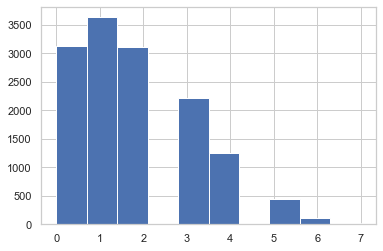

In [137]:
del pivoteo['TOTAL']
pivoteo.columns = [('NO_TIENE_TRX_' + col).replace(' ', '_') + '_MES_ACTUAL' for col in pivoteo.columns]

col_tiene = [_ for _ in pivoteo.columns if 'TIENE' in _]

for col in col_tiene:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _<= 100 else 0)

pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo[col_tiene].sum(axis=1)
pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: len(col_tiene) - _)

pivoteo = pivoteo.reset_index()
pivoteo[pivoteo['PERIODO'].astype(int) >= 202007]['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].hist()

In [138]:
def cut_2_2(val):
    if pd.isnull(val):
        return None
    
    if val <= 2:
        return 'hasta 2'
    elif val < 5:
        return '3 a 4'
    else:
        return '5 a mas'

    return 0

pivoteo['cat_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(cut_2_2)
pivoteo['TIENE_SOLO_1_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 1).astype(int)
pivoteo['TIENE_SOLO_2_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 2).astype(int)
pivoteo['TIENE_SOLO_3_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 3).astype(int)
pivoteo['TIENE_2_O_MENOS_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ <= 2).astype(int)

In [139]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(11003, 199)

#### MIRANDO 3  MESES TODOS LAS CATEGORIAS

In [140]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)

202007 [202005, 202006, 202007]
202008 [202006, 202007, 202008]
202009 [202007, 202008, 202009]
202010 [202008, 202009, 202010]
202011 [202009, 202010, 202011]
202012 [202010, 202011, 202012]


In [141]:
pivoteo_grupo['PERIODO'].min(), pivoteo_grupo['PERIODO'].max()

('201904', '202101')

In [142]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1990, 11)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3980, 11)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5970, 11)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7960, 11)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9950, 11)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(11940, 11)


,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 3457641.74]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 1731.0, 0.0]",202007
1,0000003392,"[0.0, 277203.98, 0.0]","[0.0, 0.0, 0.0]","[102510.0, 702400.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[2847147.57, 1362382.15, 573919.81]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 121811.12]","[0.0, 1889847.25, 2757258.67]","[0.0, 0.0, 0.0]","[83.56, 83.64, 81.51]","[15538.1, 0.0, 2895.84]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 29762.6, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[0.0, 660.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[230.1, 0.0, 2644.93]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
4,0000038026,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 108810.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[7243.33, 0.0, 7061.12]",202007


In [143]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

In [144]:
for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M'] = acum_3[col].apply(lambda_min_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHIN'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TRX_APAGADO_' + col + '_MES_ACTUAL'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)  #Nuevo 28/12/2020

acum_3['TIPOS_CASH_IN_ACTIVOS_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_MENOR_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_SEGUIDA_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_APAGADO_' in col]].sum(axis=1)

for col in [_ for _ in acum_3.columns if 'NO_CONSIDERADO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_U3M' in col or '_MES_ANT' in col or '_MES_ACTUAL' in col ]]
acum_3.head()

,,_aux_TIENE_TRX_COBRANZAS__U3M,_aux_TRX_MENOR_COBRANZAS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_COBRANZAS__U3M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__MES_ANT,_aux_TRX_APAGADO_COBRANZAS__MES_ACTUAL,_aux_TIENE_TRX_DEPOSITOS__U3M,_aux_TRX_MENOR_DEPOSITOS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_DEPOSITOS__U3M,...,_aux_TRX_CAIDA_20PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_APAGADO_TRANSFERENCIAS__MES_ACTUAL,TIPOS_CASH_IN_ACTIVOS_U3M,TRX_TIPOS_CASH_IN_MENORES_DE_U3M,TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M,TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0000002469,202007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,1
0000003392,202007,1,0,0,0,0,0,1,0,0,0,...,1,1,0,3,1,1,1,1,1,2
0000006114,202007,0,0,0,0,0,0,0,1,0,0,...,0,0,1,5,0,1,1,1,1,1
0000008318,202007,0,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,1
0000038026,202007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0


<AxesSubplot:>

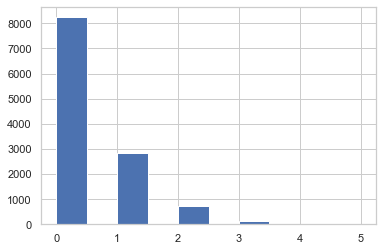

In [145]:
test = acum_3.reset_index()
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'].hist()

<AxesSubplot:>

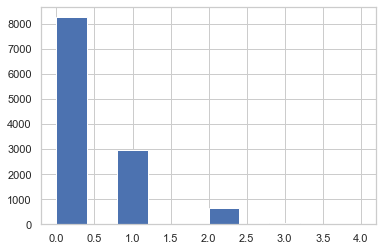

In [146]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'].hist()

<AxesSubplot:>

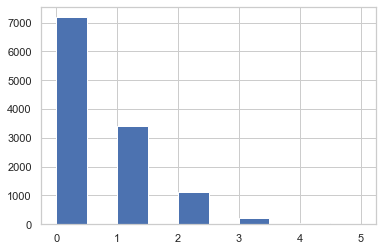

In [147]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'].hist()

<AxesSubplot:>

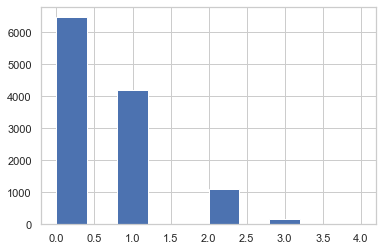

In [148]:

test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'].hist()

In [149]:
del test
gc.collect()

22

In [150]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(11003, 270)

<AxesSubplot:>

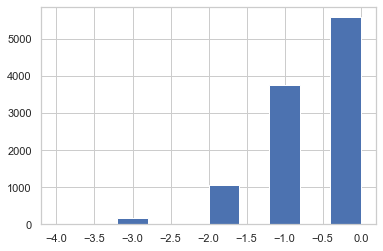

In [151]:
base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'] = base['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] - base['TIPOS_CASH_IN_ACTIVOS_U3M']

base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].hist()

In [152]:
base['cut_0_TIENE_EL_MISMO_NRO_TIPOS_CAHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_2_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)

In [153]:
base['cut_1_TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -1).astype(int)
base['cut_2_TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -2).astype(int)
base['cut_3_TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -3).astype(int)

base['cut_0_NINGUN_INGRESO_CASHIN_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _ == 0).astype(int)
base['cut_1_TIENE_AL_MENOS_1_TIPO_CASHIN_ACTIVO_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _>= 1).astype(int)

In [154]:
base['cat_TIPOS_CASH_IN_ACTIVOS_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(cut_2_2)

In [155]:
gc.collect()

88

#### ATRAS 12 MESES

In [156]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1990, 11)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3980, 11)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5970, 11)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7960, 11)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,0000003392,"[924867.68, 2674209.53, 3306476.38, 601537.18,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25305.0, 0.0, 0.0, 0.0, 0.0, 20000.0, 34060.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 13100.0, 29412.3, 28000.0, 10000.0, 1000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1925479.53, 46490.59, 308005.41, 222041.51, 1...",202007
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[316289.09, 69585.9, 384271.87, 213445.73, 0.0...","[5580201.94, 3190984.87, 468060.0, 3142808.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.58, 87.37, 46.32, 0.0, 46.36, 46.41, 73.89...","[35697.75, 13574.45, 52207.09, 41134.2, 61228....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 14000.1, 0.0, 3399.46, 0.0, 52438.0...",202007
3,0000008318,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4361.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3803.27, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17954.59, 48883.55, 10647.08, 26355.16, 6697....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 5790.35, 35.0, 4945.61, 16965....",202007
4,0000038026,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[85573.48, 0.0, 202544.17, 1196859.07, 562432....","[237188.77, 237902.19, 482525.36, 219752.88, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[142000.0, 96000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",202007


In [157]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_TIENE_TRX_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_TRX_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  COBRANZAS_
>>  DEPOSITOS_
>>  OPERACIONES_MESA_
>>  OPERACIONES_MESA_NO_TABLERO
>>  OTROS_NO_TABLERO
>>  PAGOS_RECIBIDOS_
>>  POS_
>>  RECAUDACION_
>>  TRANSFERENCIAS_


,_aux_TIENE_TRX_COBRANZAS__U12M,_aux_NO_TIENE_TRX_COBRANZAS__HACE_12M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_40PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_50PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__U6M,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__U6M,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__U6M,...,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_40PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_50PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_10PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_20PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_40PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_50PERCENT_TRANSFERENCIAS__U6M,COD_UNICO,PERIODO
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000002469,202007
1,1,0,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0000003392,202007
2,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0000006114,202007
3,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0000008318,202007
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0000038026,202007


In [158]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

del acum_3
base.shape

(11003, 280)


(11003, 364)

In [159]:
#raise Exception("""SSSTTTTOOOOOPPP""")

#### PIVOTEO POR CASH OUT

In [160]:
del pivoteo_grupo

In [161]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']

pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)

print(pivoteo.shape)
pivoteo.head(2)

(43934, 7)


OPERACIONES_MESA_  OPERACIONES_MESA_NO_TABLERO  \
COD_UNICO  PERIODO                                                   
0000002469 201904                 0.0                          0.0   
           201905                 0.0                          0.0   

                    OTROS_NO_TABLERO  PAGO_DE_SERVICIOS_  PAGOS_MASIVOS_  \
COD_UNICO  PERIODO                                                         
0000002469 201904             637.88                 0.0             0.0   
           201905           15949.25                 0.0             0.0   

                    TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                              
0000002469 201904         494016.06  494653.94  
           201905         150004.03  165953.28

In [162]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,637.88,0.0,0.0,494016.06,494653.94
1,0000002469,201905,0.0,0.0,15949.25,0.0,0.0,150004.03,165953.28
2,0000002469,201906,0.0,0.0,29086.38,0.0,0.0,466512.13,495598.51


In [163]:
del pivoteo['TOTAL']
pivoteo.columns = [('TIENE_TRX_' + col).replace(' ', '_') + '_CASH_OUT_MES_ACTUAL' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _  > 100 else 0 )

pivoteo['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] = pivoteo[[_ for _ in pivoteo.columns if 'TIENE' in _]].sum(axis=1)
pivoteo = pivoteo.reset_index()
display(pivoteo.head(3))

,COD_UNICO,PERIODO,TIENE_TRX_OPERACIONES_MESA__CASH_OUT_MES_ACTUAL,TIENE_TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_OTROS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL
0,0000002469,201904,0,0,1,0,0,1,2
1,0000002469,201905,0,0,1,0,0,1,2
2,0000002469,201906,0,0,1,0,0,1,2


In [164]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(11003, 371)

In [165]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['suma' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1997, 9) (1997, 9)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3994, 9) (3994, 9)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5991, 9) (5991, 9)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7988, 9) (7988, 9)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9985, 9) (9985, 9)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(11982, 9) (11982, 9)


In [166]:
sum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.0,0.0,2142.20,0.00,0.00,0.00,2142.20,202007
1,0000003392,102570.0,0.0,3705.54,7468.06,114815.35,4141958.59,4370517.54,202007
2,0000006114,7886200.0,0.0,727.87,8846.20,87060.52,16349.18,7999183.77,202007
3,0000008318,700020.0,0.0,1164.12,5289.00,33431.19,57277.98,797182.29,202007
4,0000037374,0.0,0.0,170.37,0.00,0.00,0.00,170.37,202007


In [167]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
#del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_OUT_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M,TRX_TOTAL_CASH_OUT_PERCENT_U3M
0,0000002469,202007,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.0
1,0000003392,202007,0.023469,0.0,0.000848,0.001709,0.026270,0.947704,1.0
2,0000006114,202007,0.985876,0.0,0.000091,0.001106,0.010884,0.002044,1.0


In [168]:
del sum_3['TRX_TOTAL_CASH_OUT_PERCENT_U3M']
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,0.0,0.0,1.0,3.0,0.254673,0.0,0.717644,0.0,0.0,0.027683
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000


In [169]:
acum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]",202007
1,0000003392,"[102570.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[1032.0, 1983.26, 690.28]","[7468.06, 0.0, 0.0]","[35331.78, 25956.52, 53527.05]","[2465108.28, 1499173.26, 177677.05]","[2611510.1199999996, 1527113.04, 231894.38]",202007
2,0000006114,"[1883200.0, 2756000.0, 3247000.0]","[0.0, 0.0, 0.0]","[261.16, 232.78, 233.93]","[250.0, 0.0, 8596.2]","[27021.66, 24940.53, 35098.33]","[6.0, 6674.48, 9668.7]","[1910738.8199999998, 2787847.7899999996, 33005...",202007
3,0000008318,"[0.0, 0.0, 700020.0]","[0.0, 0.0, 0.0]","[238.21, 241.7, 684.21]","[0.0, 3708.0, 1581.0]","[8660.74, 8132.13, 16638.32]","[15734.27, 13727.4, 27816.31]","[24633.22, 25809.23, 746739.84]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]",202007


In [170]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_SUBIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_subida_seguida_u3m).astype(int)   
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_min_u3m).astype(int) 
    acum_3['_aux_TRX_MAYOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_max_u3m).astype(int)

    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TIENE_APAGADO_' + col + '_CASHOUT'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)
    
    if 'TOTAL' in col.upper():
        acum_3['TRX_NO_' + col + '_CASH_OUT_ESTE_MES'] = acum_3[col].apply(lambda_no_hay).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U2M'] = acum_3[col].apply(lambda_no_hay_u2m).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda_no_hay_u3m).astype(int)
        acum_3['TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
        acum_3['TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
        acum_3['TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
        acum_3['TRX_CAIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
        acum_3['TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
        acum_3['TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_CASH_OUT' in col]]
acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_NO_TOTAL_CASH_OUT_U2M,TRX_NO_TOTAL_CASH_OUT_U3M,TRX_CAIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017239443,202012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017311917,202012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017316313,202012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0017415833,202012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017492799,202012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [171]:
acum_3['TRX_TIPOS_CASH_OUT_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_MAYORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_40PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_APAGADO_' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M,TRX_TIPOS_CASH_OUT_U3M,TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017239443,202012,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0.0,0.0
0017311917,202012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
0017316313,202012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
0017415833,202012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
0017492799,202012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [172]:
#acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'].value_counts()

In [173]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(11003, 479)

In [174]:
base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'] =  base['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] - base['TRX_TIPOS_CASH_OUT_U3M']

<AxesSubplot:>

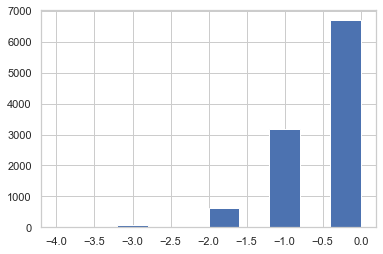

In [175]:
base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].hist()

In [176]:
base['cut_0_NO_DISMINUYO_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)
base['TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -1).astype(int)
base['TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -2).astype(int)
base['TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -3).astype(int)

In [177]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1997, 8)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3994, 8)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5991, 8)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7988, 8)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 2020

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[704.58, 56334.5, 1055.91, 702.61, 701.46, 702...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 540012.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",202007
1,0000003392,"[2684860.0, 1434030.0, 1205070.0, 1184550.0, 9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6215.19, 12937.89, 5074.61, 2329.08, 2861.29,...","[0.0, 0.0, 0.0, 4595.83, 0.0, 0.0, 0.0, 0.0, 0...","[25051.77, 23567.4, 29438.96, 25301.17, 51984....","[414917.96, 267607.76, 13729.36, 25342.59, 202...",202007
2,0000006114,"[5875450.0, 200160.0, 3288825.0, 3573330.0, 34...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[430.56, 2958.73, 11554.82, 240.61, 9246.36, 7...","[0.0, 0.0, 9010.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[35463.76, 89271.74, 58630.25, 93039.53, 11332...","[10.86, 3029.1, 5091.5, 0.0, 100718.89, 146159...",202007
3,0000008318,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1225.45, 241.35, 239.1, 248.06, 248.86, 329.7...","[0.0, 99.5, 0.0, 9978.89, 7366.0, 437.5, 2480....","[52112.83, 69386.03, 56087.08, 145642.3, 10373...","[58792.57, 10457.01, 5061.9, 21783.08, 21066.7...",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[55.08, 55.0, 54.45, 55.11, 53.96, 54.74, 55.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


In [178]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_TIENE_CASHOUT_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_CASHOUT_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  OPERACIONES_MESA_
>>  OPERACIONES_MESA_NO_TABLERO
>>  OTROS_NO_TABLERO
>>  PAGO_DE_SERVICIOS_
>>  PAGOS_MASIVOS_
>>  TRANSFERENCIAS_


,_aux_TIENE_CASHOUT_OPERACIONES_MESA__U12M,_aux_NO_TIENE_CASHOUT_OPERACIONES_MESA__HACE_12M,_aux_CASHOUT_CAIDA_10PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_20PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_30PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_40PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_50PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_10PERCENT_OPERACIONES_MESA__U6M,_aux_CASHOUT_CAIDA_20PERCENT_OPERACIONES_MESA__U6M,_aux_CASHOUT_CAIDA_30PERCENT_OPERACIONES_MESA__U6M,...,_aux_CASHOUT_CAIDA_30PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_40PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_50PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_10PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_20PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_30PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_40PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_50PERCENT_TRANSFERENCIAS__U6M,COD_UNICO,PERIODO
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000002469,202007
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0000003392,202007
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000006114,202007
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000008318,202007
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000037374,202007


In [179]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(11003, 486)


(11003, 535)

### RAZON ENTRE CASH IN - CASH OUT

In [180]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()

pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,0000002469,201904,342654.51,494653.94,0.692716
1,0000002469,201905,163519.20,165953.28,0.985333
2,0000002469,201906,521756.87,495598.51,1.052781


In [181]:
pivoteo['cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 1.1).astype(int)
pivoteo['cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 2.1).astype(int)
pivoteo['cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.9).astype(int)
pivoteo['cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.8).astype(int)
pivoteo['cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.7).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.6).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.5).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.4).astype(int)

In [182]:
pivoteo['DIFF_CASHIN_OVER_CASHOUT'] = pivoteo['CASH_IN_TOTAL_MES'] - pivoteo['CASH_OUT_TOTAL_MES']
pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,0000002469,201904,342654.51,494653.94,0.692716,0,0,1,1,1,0,0,0,-151999.43
1,0000002469,201905,163519.20,165953.28,0.985333,0,0,0,0,0,0,0,0,-2434.08
2,0000002469,201906,521756.87,495598.51,1.052781,1,1,0,0,0,0,0,0,26158.36


In [183]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,1.105457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7745.65
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,5275.103935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261331.85
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,2.358477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13452.54
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,0.992770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2119.99
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
pivoteo.shape

(40005, 14)

In [185]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='DIFF_CASHIN_OVER_CASHOUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT']

In [186]:
pivoteo.head()

,PERIODO,COD_UNICO,DIFF_CASH_IN_CASH_OUT
0,201904,0000002469,-151999.43
1,201904,0000003392,1631369.77
2,201904,0000006114,95642.10
3,201904,0000008318,-400741.82
4,201904,0000037374,-53.78


In [187]:
contador = 1
dicc = {
    'DIFF_CASH_IN_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2000, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4000, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6000, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8000, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(10000, 3)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12000, 3)


,COD_UNICO,DIFF_CASH_IN_CASH_OUT,PERIODO
0,0000002469,"[-647.5, 941.11, 3456936.93]",202007
1,0000003392,"[338147.4500000002, 814873.0899999999, 342025....",202007
2,0000006114,"[-1895117.16, -868154.2999999996, -418550.0200...",202007
3,0000008318,"[-24403.120000000003, -25149.230000000003, -74...",202007
4,0000037374,"[-55.71, -57.35, -57.31]",202007


In [188]:
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[0] < 0 and  _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda_min_u3m).astype(int)
del acum_3['DIFF_CASH_IN_CASH_OUT']
acum_3.head(20)

,COD_UNICO,PERIODO,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M
0,0000002469,202007,0,0,0,0
1,0000003392,202007,0,0,0,0
2,0000006114,202007,1,1,1,0
3,0000008318,202007,1,1,1,0
4,0000037374,202007,1,1,1,0
5,0000038026,202007,0,0,0,0
6,0000039982,202007,0,1,1,0
7,0000042044,202007,0,0,0,0
8,0000042432,202007,1,1,1,0
9,0000043141,202007,0,0,1,0


In [189]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((12000, 6), (11003, 547), (12000,), (11003,))

In [190]:
acum_3['PERIODO'] = acum_3['PERIODO'] .astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

In [191]:
pivoteo.columns

Index(['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT'], dtype='object')

### JUGANDO CON LA RZON ENTRE INGRESOS TOTAL Y EGRESOS TOTOALES

In [192]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()[['COD_UNICO', 'PERIODO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']]


pivoteo = pd.pivot_table(
    pivoteo, 
    values='PERCENT_MONTO_CASH_IN_OVER_CASH_OUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']

pivoteo.head(3)

,PERIODO,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,201904,0000002469,0.692716
1,201904,0000003392,2.138814
2,201904,0000006114,1.019986


In [193]:
contador = 1
dicc = {
    'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2000, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4000, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6000, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8000, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(10000, 3)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12000, 3)


,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.02557224682797588, 0....",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [194]:
acum_3.head(5)

,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.02557224682797588, 0....",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [195]:
def menor_a_u3m(listado, treshold):
    return int(all([_ != 0 and _ <= treshold for _ in listado]))

def menor_a_u3m_or_null(listado, treshold):
    return int(all([_ == 0 or _ <= treshold for _ in listado]))

acum_3['cut_110_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.1))
acum_3['cut_120_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.2))
acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.6))
acum_3['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda_caida_seguida_u3m).astype(int)
 

acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.6))
#del acum_3['DIFF_CASH_IN_CASH_OUT']

acum_3[acum_3['PERIODO'].astype(int) >= 202007]['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'].value_counts()

0    11874
1      126
Name: TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M, dtype: int64

In [196]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((12000, 16), (11003, 551), (12000,), (11003,))

### RAZON NUMERO DE TRANSACCIONES

In [197]:
pivoteo_cash = pd.pivot_table(
    transac_cliente, 
    values='CANT_TRX', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo_cash.columns = [('CANTIDAD_TRX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo_cash.columns]

pivoteo_cash['PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT'] = pivoteo_cash[
    ['CANTIDAD_TRX_CASH_IN_PERCENT', 'CANTIDAD_TRX_CASH_OUT_PERCENT']].apply(lambda _: get_div_means_perios(_[0], _[1]), axis=1)

pivoteo_cash['total'] = pivoteo_cash.sum(axis=1)
for col in pivoteo_cash.columns:
    if 'OVER' not in col.upper():
        pivoteo_cash[col] = pivoteo_cash[col] / pivoteo_cash['total']

del pivoteo_cash['total']

pivoteo_cash = pivoteo_cash.reset_index().fillna(0)
pivoteo_cash.tail()

,COD_UNICO,PERIODO,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
40000,0017311917,202101,0.000000,1.000000,0.000000
40001,0017316313,202011,0.230769,0.692308,0.333333
40002,0017415833,202011,0.393258,0.550562,0.714286
40003,0017415833,202012,0.000000,1.000000,0.000000
40004,0017492799,202012,0.352941,0.529412,0.666667


In [198]:
base = base.merge(
    pivoteo_cash, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo_cash
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,0.0,0.0,7745.65,0.0,0.0,0.0,0.0,0.323331,0.666871,0.484848
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,0.0,0.0,261331.85,0.0,0.0,0.0,0.0,0.297521,0.669421,0.444444
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,0.0,0.0,13452.54,0.0,0.0,0.0,0.0,0.357447,0.625532,0.571429
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,0.0,0.0,-2119.99,0.0,0.0,1.0,0.0,0.347368,0.636842,0.545455
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
base.shape

(11003, 554)

### Probando rangos de periodo para ANALISIS DE VARACION DE CASH IN

In [200]:
transac_cliente.columns

Index(['ANIO', 'PERIODO', 'COD_UNICO', 'TIPO_CASH', 'KPI', 'GRUPO_N1',
       'CANT_TRX', 'VOLUMEN_SOLES', 'MAX_FECHA_INFORMACION'],
      dtype='object')

In [201]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data, 
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    
    pivoteo.columns = columns + index + [col_name]
    #display(pivoteo.head())
    contador = 1
    dicc = { col_name: list }
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)

        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

acum_3 = generate_listado_u3m(
    transac_cliente[(transac_cliente['TIPO_CASH'] == 'CASH IN') &  (transac_cliente['VOLUMEN_SOLES'] > 100)],
    'CANT_TRX_CASH_IN_TOTAL_MES', values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max
)
acum_3.tail(58)

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1987, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3974, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5961, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7948, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9935, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(11922, 3)


,COD_UNICO,CANT_TRX_CASH_IN_TOTAL_MES,PERIODO
1929,0016364109,"[0, 1, 0, 0, 1, 1, 2, 1, 1, 3, 4, 4]",202012
1930,0016376276,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]",202012
1931,0016376605,"[1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1, 1]",202012
1932,0016387975,"[5, 1, 7, 1, 3, 4, 1, 3, 3, 1, 2, 0]",202012
1933,0016390037,"[0, 0, 2, 11, 6, 19, 17, 7, 3, 4, 0, 0]",202012
1934,0016392414,"[3, 1, 1, 1, 2, 3, 1, 3, 1, 0, 0, 0]",202012
1935,0016399085,"[0, 0, 1, 0, 2, 3, 0, 1, 0, 3, 0, 2]",202012
1936,0016401263,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 2]",202012
1937,0016402624,"[1, 0, 0, 1, 0, 2, 3, 1, 0, 109, 12, 3]",202012
1938,0016412662,"[3, 6, 6, 2, 2, 3, 1, 2, 6, 5, 1, 5]",202012


In [202]:
print(
    'mes cerrado',tramos[-3][0],  '\n', '-'*100, '\n', tramos[-3][1],  '\n',  '-'*100,  '\n',tramos[-3][-2],  '\n',  '-'*100,  '\n',tramos[-3][-1]
)

mes cerrado 202010 
 ---------------------------------------------------------------------------------------------------- 
 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] 
 ---------------------------------------------------------------------------------------------------- 
 [201911, 201912] 
 ---------------------------------------------------------------------------------------------------- 
 [202011, 202012]


### AGRUPACION POR CLIENTE - PERIODO

In [203]:
periodo_actual = datetime.now().strftime('%Y%m')
periodo_actual

'202101'

In [204]:
group_periodo_cash_in = transac_cliente[transac_cliente['KPI'] == ''].groupby(
    by=['TIPO_CASH','PERIODO'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in.head()

,TIPO_CASH,PERIODO,VOLUMEN_SOLES
0,CASH IN,201904,1.670423e+09
1,CASH IN,201905,1.820875e+09
2,CASH IN,201906,1.598233e+09
3,CASH IN,201907,1.637689e+09
4,CASH IN,201908,1.538727e+09


<AxesSubplot:xlabel='PERIODO', ylabel='VOLUMEN_SOLES'>

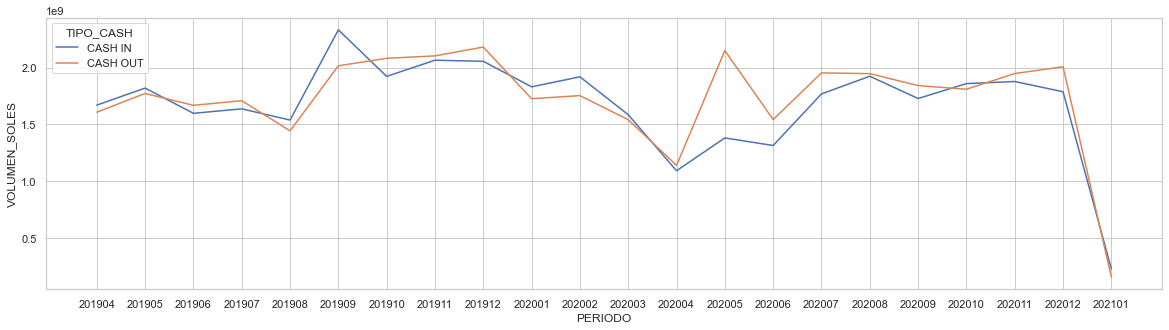

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.lineplot(
    data=group_periodo_cash_in[group_periodo_cash_in['PERIODO'].astype(int) >= 201904],
    x="PERIODO", y="VOLUMEN_SOLES", ax=axes, hue='TIPO_CASH'
)

In [206]:
transac_cliente['ANIO'].value_counts()

2020    104180
2019     75725
2021      4194
Name: ANIO, dtype: int64

In [207]:
transac_cliente['MONTH'] = transac_cliente['PERIODO'].apply(lambda _: _[-2:])
transac_cliente['MONTH'].value_counts()

11    18098
12    18041
09    17675
10    17639
07    17408
08    17253
05    16605
06    16482
04    14905
01    12995
02     8571
03     8427
Name: MONTH, dtype: int64

In [208]:
cash_in_cliente = transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN']
cash_in_cliente.shape, transac_cliente.shape, cash_in_cliente['COD_UNICO'].unique().shape, transac_cliente['COD_UNICO'].unique().shape

((84841, 10), (184099, 10), (1990,), (2000,))

### CLientesnque solo tiene CASH OUT

In [209]:
set(transac_cliente['COD_UNICO'].unique()) - set(cash_in_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0012984101',
 '0013318420',
 '0015242107',
 '0015559992',
 '0015726975',
 '0015955076',
 '0016568364'}

In [210]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
1,2019,201905,0013127096,CASH IN,,DEPOSITOS,2,14080.00,20190528,05
2,2019,201905,0013151585,CASH IN,,DEPOSITOS,3,105500.00,20190515,05
4,2019,201905,0013160139,CASH IN,,DEPOSITOS,4,6404.21,20190528,05
8,2019,201905,0013219759,CASH IN,,DEPOSITOS,1,26534.79,20190530,05
11,2019,201905,0013240835,CASH IN,,TRANSFERENCIAS,2,120000.00,20190529,05


In [211]:
group_periodo_cash_in = cash_in_cliente.groupby(by=['ANIO','MONTH'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.813214e+09
1,2019,05,1.974994e+09
2,2019,06,1.769709e+09
3,2019,07,1.792763e+09
4,2019,08,1.705492e+09
5,2019,09,2.488979e+09
6,2019,10,2.069390e+09
7,2019,11,2.225477e+09
8,2019,12,2.232188e+09
9,2020,01,2.001309e+09


In [212]:
months =  ["01", "02", '03', "04", "05", '06', "07", "08", '09', "10", "11", '12']
group_periodo_cash_in['MONTH'] = pd.Categorical(
    group_periodo_cash_in['MONTH'], [
        _.upper() for _ in months
    ]
)

In [213]:

group_periodo_cash_in.head()

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.813214e+09
1,2019,05,1.974994e+09
2,2019,06,1.769709e+09
3,2019,07,1.792763e+09
4,2019,08,1.705492e+09


### CASH IN YOY (2020 - 2019)

<AxesSubplot:xlabel='MONTH', ylabel='VOLUMEN_SOLES'>

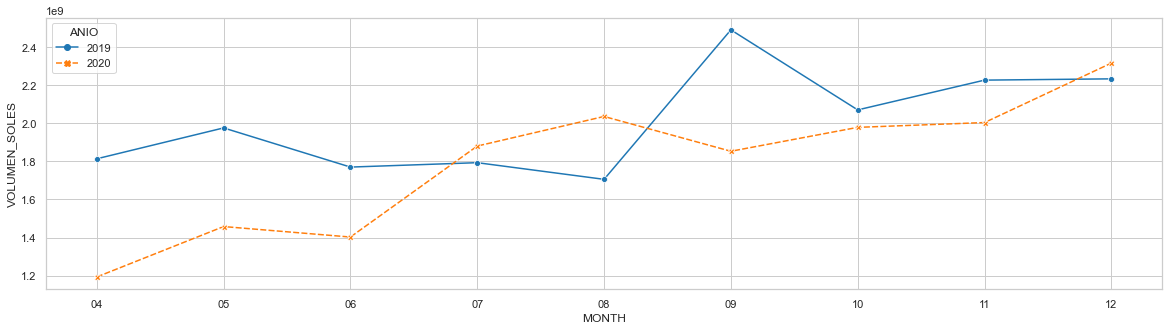

In [214]:
fig, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.lineplot(
    data=group_periodo_cash_in[
        (group_periodo_cash_in['MONTH'].isin(months[3:])) & (group_periodo_cash_in['ANIO'].astype(int) >= 2019)
    ],
    x="MONTH", y="VOLUMEN_SOLES", ax=axes1, 
    hue='ANIO', markers=True,  style="ANIO", palette=sns.color_palette("tab10", 2)
)

In [215]:
cash_in_cliente['VOLUMEN_SOLES'].dtype

dtype('float64')

In [216]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
1,2019,201905,0013127096,CASH IN,,DEPOSITOS,2,14080.00,20190528,05
2,2019,201905,0013151585,CASH IN,,DEPOSITOS,3,105500.00,20190515,05
4,2019,201905,0013160139,CASH IN,,DEPOSITOS,4,6404.21,20190528,05
8,2019,201905,0013219759,CASH IN,,DEPOSITOS,1,26534.79,20190530,05
11,2019,201905,0013240835,CASH IN,,TRANSFERENCIAS,2,120000.00,20190529,05


In [217]:
cash_in_cliente['MAX_FECHA_INFORMACION'] = pd.to_datetime(
    cash_in_cliente['MAX_FECHA_INFORMACION'], errors='coerce', format='%Y%m%d'
)
cash_in_cliente['MAX_FECHA_INFORMACION'].dtype

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('<M8[ns]')

In [218]:
#cash_in_cliente['VOLUMEN_SOLES'] = cash_in_cliente['VOLUMEN_SOLES'].copy().apply(lambda _: None if _ < 100 else _)
#cash_in_cliente[cash_in_cliente['COD_UNICO'] == '0016716540']['VOLUMEN_SOLES'].median()
periodo_cash_cliente = cash_in_cliente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'VOLUMEN_SOLES': ['sum'], 'CANT_TRX': ['sum'], 'MAX_FECHA_INFORMACION': ['max']
}).reset_index()

periodo_cash_cliente.columns = ['_'.join(list(_)[:-1]) for _ in periodo_cash_cliente.columns]
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
34794,0017311917,202011,359.2,1,2020-11-05
34795,0017311917,202012,65611.0,4,2020-12-21
34796,0017316313,202011,6100.0,1,2020-11-09
34797,0017415833,202011,61445.0,5,2020-11-24
34798,0017492799,202012,138150.0,2,2020-12-09


In [219]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [220]:
#tramo[0], tramo[-1], tramo[-2]

In [221]:
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [222]:
def RClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 1
    elif x <= d[p][0.3]:
        return 2
    elif x <= d[p][0.45]:
        return 3
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 5
    elif x <= d[p][0.9]: 
        return 6
    else:
        return 7
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 7
    elif x <= d[p][0.3]:
        return 6
    elif x <= d[p][0.45]:
        return 5
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 3
    elif x <= d[p][0.9]: 
        return 2
    else:
        return 1

In [223]:
base.shape

(11003, 554)

In [224]:
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2019'))
#].hist())
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2020'))
#].hist())

### Clientes descartados hasta ahora

In [225]:
set(transac_cliente['COD_UNICO'].unique()) - set(periodo_cash_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0012984101',
 '0013318420',
 '0015242107',
 '0015559992',
 '0015726975',
 '0015955076',
 '0016568364'}

In [226]:
new_dataFrame = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == '0123']
new_dataFrame

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION


### Re-indexamos por cliente para completar meses faltantes desde el 1er mes de análisis

In [227]:
rango_global =  [int(_.strftime('%Y%m')) for _ in list(pd.date_range(first_init_valid, ultimo_mes_cerrado, freq='MS'))]
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]


In [228]:
cols_new_dataFrame = list(new_dataFrame.columns)

for cliente in periodo_cash_cliente['COD_UNICO'].unique():
    data_cliente = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

#del data_cliente
periodo_cash_cliente = new_dataFrame.copy()
del new_dataFrame

periodo_cash_cliente.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
0,0000002469,201804,NaN,NaN,NaT
1,0000002469,201805,NaN,NaN,NaT
2,0000002469,201806,NaN,NaN,NaT
3,0000002469,201807,NaN,NaN,NaT
4,0000002469,201808,NaN,NaN,NaT


In [229]:
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
28,0017492799,202008,NaN,NaN,NaT
29,0017492799,202009,NaN,NaN,NaT
30,0017492799,202010,NaN,NaN,NaT
31,0017492799,202011,NaN,NaN,NaT
32,0017492799,202012,138150.0,2.0,2020-12-09


In [230]:
print(periodo_cash_cliente.columns)

Index(['COD_UNICO', 'PERIODO', 'VOLUMEN_SOLES', 'CANT_TRX',
       'MAX_FECHA_INFORMACION'],
      dtype='object')


### RRRRRRRRRRRRRRRRRRRRRRRRRFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMM

In [231]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ',historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1])

 histroia  [202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102]
 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009]


In [232]:
contador = 1

for tramo in tramos[::-1]:
    historia = tramo[1][-5:-2]
    mes_cerrado = tramo[0]
    print("Mes cerrado de referencia: ", mes_cerrado, ', historia: ', historia)

    rfm_u6m = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg({
        'MAX_FECHA_INFORMACION': lambda x: (datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days, # Recency
        'CANT_TRX': lambda x: x.sum(),      # Frequency
        'VOLUMEN_SOLES': lambda x: x.sum() #  Monetary Value
    }).reset_index().rename(columns={
        'MAX_FECHA_INFORMACION': 'RECENCY_historia',
        'CANT_TRX': 'FREQUENCY_historia',
        'VOLUMEN_SOLES': 'MONETARY_VALUE_historia'
    })
    rfm_u6m['PERIODO'] = str(mes_cerrado)
    
    quantiles = rfm_u6m.quantile(q=[0.25, 0.5, 0.75]).to_dict()
    print(quantiles)
    rfm_u6m['R_Quartile'] = rfm_u6m['RECENCY_historia'].apply(RClass, args=('RECENCY_historia', quantiles))
    rfm_u6m['F_Quartile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass, args=('FREQUENCY_historia', quantiles))
    rfm_u6m['M_Quartile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass, args=('MONETARY_VALUE_historia', quantiles))
    
    sextiles = rfm_u6m.quantile(q=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]).to_dict()
    print(sextiles)
    rfm_u6m['R_Septile'] = rfm_u6m['RECENCY_historia'].apply(RClass_propio, args=('RECENCY_historia', sextiles))
    rfm_u6m['F_Septile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass_propio, args=('FREQUENCY_historia', sextiles))
    rfm_u6m['M_Septile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass_propio, args=('MONETARY_VALUE_historia', sextiles))

    if contador == 1:
        rfm_cliente = rfm_u6m
    else:
        rfm_cliente = pd.concat(
            [rfm_cliente, rfm_u6m], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", rfm_cliente.shape)


rfm_cliente.head()

Mes cerrado de referencia:  202012 , historia:  [202010, 202011, 202012]
{'RECENCY_historia': {0.25: 1.0, 0.5: 2.0, 0.75: 11.0}, 'FREQUENCY_historia': {0.25: 5.0, 0.5: 18.5, 0.75: 66.0}, 'MONETARY_VALUE_historia': {0.25: 75263.5625, 0.5: 505521.5, 0.75: 2062796.4425}}
{'RECENCY_historia': {0.15: 1.0, 0.3: 1.0, 0.45: 2.0, 0.6: 3.0, 0.75: 11.0, 0.9: 30.0}, 'FREQUENCY_historia': {0.15: 2.0, 0.3: 7.0, 0.45: 15.0, 0.6: 28.0, 0.75: 66.0, 0.9: 225.10000000000014}, 'MONETARY_VALUE_historia': {0.15: 17549.689499999993, 0.3: 123991.65999999989, 0.45: 378021.65850000014, 0.6: 882013.2499999993, 0.75: 2062796.4425, 0.9: 6337819.525000002}, 'R_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'F_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'M_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 3.75, 0.9: 4.0}}
-- (1990, 11)
Mes cerrado de referencia:  202011 , historia:  [202009, 202010, 202011]
{'RECENCY_historia': {0.25: 1.0, 0.5: 4

,COD_UNICO,RECENCY_historia,FREQUENCY_historia,MONETARY_VALUE_historia,PERIODO,R_Quartile,F_Quartile,M_Quartile,R_Septile,F_Septile,M_Septile
0,0000002469,2.0,11.0,587888.78,202012,2,3,2,3,5,4
1,0000003392,3.0,81.0,15811963.38,202012,3,1,1,4,2,1
2,0000006114,10.0,34.0,3668046.61,202012,3,2,1,5,3,2
3,0000008318,4.0,14.0,325477.98,202012,3,3,3,5,5,5
4,0000038026,18.0,7.0,939258.49,202012,4,3,2,6,6,3


In [233]:
rfm_cliente.shape

(11940, 11)

In [234]:
base = base.merge(
    rfm_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(11003, 563)

In [235]:
def evaluate_rfm(r, f, m):
    if pd.isnull(r) and pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(r)) + str(int(f)) + str(int(m))

def evaluate_fm(f, m):
    if pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(f)) + str(int(m))

base['RFMClass_quartil'] = base[['R_Quartile', 'F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_quartil'] = base[['F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)
base['RFMClass_septil'] = base[['R_Septile', 'F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_septil'] = base[['F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)

In [236]:
for col in ['FM_category_quartil', 'RFMClass_quartil', 'FM_category_septil', 'RFMClass_septil']:
    base[col] = base[col].fillna('nulo')

In [237]:
base['FM_category_quartil'].value_counts(dropna=False).head(60)

_44     1861
_11     1471
_33      996
_22      984
_21      953
_12      815
_32      698
_23      636
_43      599
_34      453
nulo     411
_13      390
_31      330
_42      183
_24      124
_41       63
_14       36
Name: FM_category_quartil, dtype: int64

In [238]:
base['FM_category_septil'].value_counts(dropna=False).head(60)

_77     1038
_66      533
nulo     411
_76      402
_22      400
_55      390
_33      387
_32      372
_12      360
_11      358
_21      353
_44      339
_43      336
_23      336
_56      327
_54      319
_42      310
_65      295
_45      295
_34      288
_53      264
_31      264
_24      261
_67      247
_13      198
_35      188
_25      176
_75      171
_64      170
_52      159
_46      155
_14      128
_41      116
_36       92
_63       79
_57       75
_26       70
_74       69
_15       64
_62       51
_47       35
_51       35
_73       30
_72       20
_71       11
_37       10
_61        8
_16        4
_27        4
Name: FM_category_septil, dtype: int64

In [239]:
base.shape

(11003, 567)

In [240]:
base = base.merge(
     pd.get_dummies(
        base[['R_Septile', 'F_Septile', 'M_Septile', 'PERIODO', 'COD_UNICO']], columns=['R_Septile', 'F_Septile', 'M_Septile'],
        dummy_na=True, drop_first=False, prefix_sep='_cut_'
    ), how='left', on=['PERIODO', 'COD_UNICO']
)
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,F_Septile_cut_7.0,F_Septile_cut_nan,M_Septile_cut_1.0,M_Septile_cut_2.0,M_Septile_cut_3.0,M_Septile_cut_4.0,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1








































































































































































































































### TARGET YOY

In [241]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102] [202001, 202002]
 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [242]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[-1], tramo[-2])

    _2m_actual = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(new_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_pasado = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(last_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    
    data_tramo = pd.concat(
        [_2m_actual, _2m_pasado], axis=1
    )
    data_tramo.columns = ['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del _2m_actual
    del _2m_pasado
    
    if contador == 1:
        analisis_cliente = data_tramo
    else:
        analisis_cliente = pd.concat(
            [analisis_cliente, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", analisis_cliente.shape)

analisis_cliente.head()                        

Mes cerrado:  202012 , Meses target [202101, 202102] [202001, 202002]
-- (1990, 4)
Mes cerrado:  202011 , Meses target [202012, 202101] [201912, 202001]
-- (3980, 4)
Mes cerrado:  202010 , Meses target [202011, 202012] [201911, 201912]
-- (5970, 4)
Mes cerrado:  202009 , Meses target [202010, 202011] [201910, 201911]
-- (7960, 4)
Mes cerrado:  202008 , Meses target [202009, 202010] [201909, 201910]
-- (9950, 4)
Mes cerrado:  202007 , Meses target [202008, 202009] [201908, 201909]
-- (11940, 4)


,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.00,202012
1,0000003392,NaN,1491071.10,202012
2,0000006114,NaN,1383020.24,202012
3,0000008318,NaN,62441.13,202012
4,0000038026,NaN,225875.15,202012


In [243]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')

In [244]:
import gc
gc.collect()

44

In [245]:
analisis_cliente = analisis_cliente.sort_values(by=['COD_UNICO', 'PERIODO'], ascending=[True, False])
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.0,202012
0,0000002469,290267.28,0.0,202011
0,0000002469,586888.78,0.0,202010
0,0000002469,297621.50,0.0,202009
0,0000002469,359400.00,600000.0,202008


In [246]:
print(analisis_cliente.columns)

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')


In [247]:
analisis_cliente['PRE_TARGET_sum_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)

analisis_cliente['TRX_SUM_ACTAUL'] = analisis_cliente['TRX_SUM_ACTAUL'] / 2
analisis_cliente['TRX_SUM_PASADO'] = analisis_cliente['TRX_SUM_PASADO'] / 2
analisis_cliente['PRE_TARGET_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_sum_yoy,PRE_TARGET_yoy
0,0000002469,NaN,0.0,202012,0.000,0.000
0,0000002469,145133.64,0.0,202011,290267.280,145133.640
0,0000002469,293444.39,0.0,202010,586888.780,293444.390
0,0000002469,148810.75,0.0,202009,297621.500,148810.750
0,0000002469,179700.00,300000.0,202008,0.599,0.599


In [248]:
if (analisis_cliente['PRE_TARGET_sum_yoy'] == analisis_cliente['PRE_TARGET_yoy']).any():
    del analisis_cliente['PRE_TARGET_sum_yoy']

In [249]:
transac_cliente.shape

(184099, 10)

## Descartamos a quienes ya estaban con pcas transacciones in efecto de los ultimo ese

In [250]:
#now - relativedelta(months=11)

In [251]:
periodos_valida = [_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]
print(periodos_valida)

['202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012']


In [252]:
transac_valid = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
transac_valid.columns = ['PERIODO', 'COD_UNICO', 'CANT_TRX']
transac_valid.head(3)

,PERIODO,COD_UNICO,CANT_TRX
0,201904,0000002469,4
1,201904,0000003392,15
2,201904,0000006114,15


array([[<AxesSubplot:title={'center':'CANT_TRX'}>]], dtype=object)

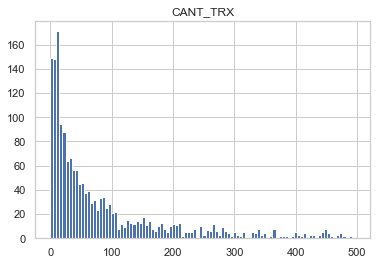

In [253]:
transac_valid = transac_valid[
    (transac_valid['PERIODO'].isin(periodos_valida))
].groupby(by=['COD_UNICO'])['CANT_TRX'].sum().reset_index()

transac_valid[transac_valid['CANT_TRX']< 500].hist(bins=100)

##### MENOS TRANSACCCIONES DEL 97% DE CLIENTES EN LOS 10 ULTIMOS MESES

In [254]:
minimas = transac_valid.CANT_TRX.quantile([0.05])[0.05]
print(minimas)

3.0


In [255]:
muy_pocas_trx = list(transac_valid[transac_valid['CANT_TRX'] <= minimas]['COD_UNICO'])
print(muy_pocas_trx)

['0000042432', '0000164442', '0000698035', '0001017383', '0002443489', '0003290442', '0004051991', '0004396685', '0004631552', '0005561857', '0005601901', '0008443663', '0008815054', '0009017582', '0009270081', '0009270497', '0009302131', '0009485552', '0009533643', '0009603473', '0009938270', '0010060934', '0010389823', '0010648747', '0010657882', '0010827069', '0010856041', '0010908680', '0011115460', '0011298258', '0011391154', '0011684313', '0011724103', '0011790009', '0011793990', '0011858461', '0011859432', '0011859441', '0011859730', '0011867008', '0011868355', '0011868520', '0011868669', '0011869439', '0011874221', '0011874583', '0011880968', '0012002104', '0012081965', '0012512961', '0012524203', '0012695457', '0012797219', '0012838940', '0013024951', '0013118232', '0013223134', '0013251454', '0013360786', '0013454627', '0013596955', '0013619339', '0013638749', '0013670229', '0013799902', '0013882826', '0013891946', '0013956156', '0013968709', '0014070972', '0014103851', '0014

In [256]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO',
       'PRE_TARGET_yoy'],
      dtype='object')

In [257]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente[~analisis_cliente['COD_UNICO'].isin(muy_pocas_trx)]
print(analisis_cliente.shape)

(11940, 5)
(11232, 5)


### DEFINICIION DE TARGET YOY

<AxesSubplot:>

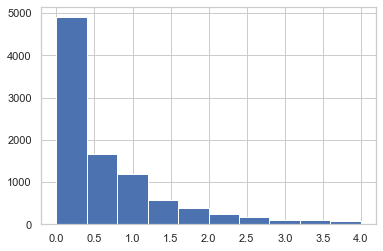

In [258]:
analisis_cliente[analisis_cliente['PRE_TARGET_yoy']< 4]['PRE_TARGET_yoy'].hist()

In [259]:
periodos_valida[-6]

'202007'

In [260]:
#periodos_valida

In [261]:
quantile_03 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6])) & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.35)
quantile_03

0.01430747417575522

In [262]:
quantile_04 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.45)
quantile_04

0.1555106634221075

In [263]:
quantile_05 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.55)
quantile_05

0.32613493908087926

In [264]:
quantile_06 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) >  int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.65)
quantile_06

0.5205939386740507

In [265]:
quantile_07 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.75)
quantile_07

0.7367170152429163

In [266]:
analisis_cliente['target_yoy_quartil_03'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_03).astype(int)
analisis_cliente['target_yoy_quartil_04'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_04).astype(int)
analisis_cliente['target_yoy_quartil_05'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_05).astype(int)
analisis_cliente['target_yoy_quartil_06'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_06).astype(int)
analisis_cliente['target_yoy_quartil_07'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_07).astype(int)
analisis_cliente.head(20)

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
0,0000002469,NaN,0.000,202012,0.000000,1,1,1,1,1
0,0000002469,145133.640,0.000,202011,145133.640000,0,0,0,0,0
0,0000002469,293444.390,0.000,202010,293444.390000,0,0,0,0,0
0,0000002469,148810.750,0.000,202009,148810.750000,0,0,0,0,0
0,0000002469,179700.000,300000.000,202008,0.599000,0,0,0,0,1
0,0000002469,3356516.670,300000.000,202007,11.188389,0,0,0,0,0
1,0000003392,NaN,745535.550,202012,0.000000,1,1,1,1,1
1,0000003392,1970520.355,1036741.075,202011,1.900687,0,0,0,0,0
1,0000003392,4716004.180,1303503.205,202010,3.617946,0,0,0,0,0
1,0000003392,5935461.335,2247736.390,202009,2.640639,0,0,0,0,0


In [267]:
analisis_cliente = base.merge(
    analisis_cliente[
        ['PERIODO', 'COD_UNICO', 'PRE_TARGET_yoy', 'target_yoy_quartil_03','target_yoy_quartil_04','target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)


analisis_cliente.tail(3)

(11003, 596)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
11000,202009,0016154232,20600805305,0,OPERADORA CENTRAL DE ESTACIONAMIENTOS DE,0,0,0,0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
11001,202010,0007607963,20127745910,1,MAXIMA INTERNACIONAL,1,1,0,0,0,...,0,0,0,0,1.819591,0.0,0.0,0.0,0.0,0.0
11002,202012,0011872738,20510077190,0,POSTES ESCARSA,0,1,1,0,0,...,1,0,0,0,0.000000,1.0,1.0,1.0,1.0,1.0


In [268]:
for column in [col for col in analisis_cliente.columns if ('trx' in col.lower() or 'cash' in col.lower()) and 'target' not in col.lower()]:
    analisis_cliente[col] = analisis_cliente[col].fillna(0)

In [269]:
[_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]

['202003',
 '202004',
 '202005',
 '202006',
 '202007',
 '202008',
 '202009',
 '202010',
 '202011',
 '202012']

In [270]:
import time
datetime.strptime( str(tramo[1][0]), '%Y%m')

datetime.datetime(2019, 8, 1, 0, 0)

In [271]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    anio_pasado = [int(_.strftime('%Y%m')) for _ in pd.date_range( datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=6) ,  datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=1), freq='MS')]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[1], tramo[2], tramo[3])
    print(anio_pasado)
    print(anio_pasado[-3:])
    print(anio_pasado[-6:])
    
    #break
    ultimos_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[3])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    ultimos_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-3:])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-6:])].groupby(by=['COD_UNICO']).agg(dicc_kpi) 
    
    data_tramo = pd.concat(
        [ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses], axis=1
    )
    data_tramo.columns = ['TRX_SUM_U3M', 'TRX_SUM_U6M', 'TRX_PAS_U3M', 'TRX_PAS_U6M']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses
    #del _2m_pasado
    
    if contador == 1:
        yoy_cash_in = data_tramo
    else:
        yoy_cash_in = pd.concat(
            [yoy_cash_in, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", yoy_cash_in.shape)

yoy_cash_in.head()                        

Mes cerrado:  202012 , Meses target [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012] [202010, 202011, 202012]
[201907, 201908, 201909, 201910, 201911, 201912]
[201910, 201911, 201912]
[201907, 201908, 201909, 201910, 201911, 201912]
-- (1990, 6)
Mes cerrado:  202011 , Meses target [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011] [202009, 202010, 202011]
[201906, 201907, 201908, 201909, 201910, 201911]
[201909, 201910, 201911]
[201906, 201907, 201908, 201909, 201910, 201911]
-- (3980, 6)
Mes cerrado:  202010 , Meses target [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010] [202008, 202009, 202010]
[201905, 201906, 201907, 201908, 201909, 201910]
[201908, 2

,COD_UNICO,TRX_SUM_U3M,TRX_SUM_U6M,TRX_PAS_U3M,TRX_PAS_U6M,PERIODO
0,0000002469,587888.78,10758563.86,0.00,879281.10,202012
1,0000003392,15811963.38,21366178.08,6250900.50,15199273.86,202012
2,0000006114,3668046.61,9872564.77,11035327.09,25416487.43,202012
3,0000008318,325477.98,763357.49,49525.51,153348.25,202012
4,0000038026,939258.49,1088121.07,3005776.49,5314763.18,202012


In [272]:
yoy_cash_in['YOY_input_cash_in_U3M'] = yoy_cash_in['TRX_SUM_U3M'] / yoy_cash_in['TRX_PAS_U3M']
yoy_cash_in['YOY_input_cash_in_U6M'] = yoy_cash_in['TRX_SUM_U6M'] / yoy_cash_in['TRX_PAS_U6M']

In [273]:
analisis_cliente = analisis_cliente.merge(
    yoy_cash_in[
        ['PERIODO', 'COD_UNICO', 'YOY_input_cash_in_U3M', 'YOY_input_cash_in_U6M']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

analisis_cliente.tail(3)

(11003, 598)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07,YOY_input_cash_in_U3M,YOY_input_cash_in_U6M
11000,202009,0016154232,20600805305,0,OPERADORA CENTRAL DE ESTACIONAMIENTOS DE,0,0,0,0,0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf
11001,202010,0007607963,20127745910,1,MAXIMA INTERNACIONAL,1,1,0,0,0,...,0,0,1.819591,0.0,0.0,0.0,0.0,0.0,0.352821,0.299678
11002,202012,0011872738,20510077190,0,POSTES ESCARSA,0,1,1,0,0,...,0,0,0.000000,1.0,1.0,1.0,1.0,1.0,6.190731,1.221433


In [274]:
gc.collect()

66

In [275]:
#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    up[up['PERIODO'].isin(['202008', '202007'])].to_sql(
#        name='TRANSAC_ALERTA_BE',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [276]:
del base
#del up

## A PEDIDO FOCO EN CANTIDADES DE TRANSACCIONES

In [277]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201905,0013121592,CASH OUT,NO_TABLERO,OTROS,4,73.60,20190531,05
1,2019,201905,0013127096,CASH IN,,DEPOSITOS,2,14080.00,20190528,05
2,2019,201905,0013151585,CASH IN,,DEPOSITOS,3,105500.00,20190515,05
3,2019,201905,0013156237,CASH OUT,NO_TABLERO,OTROS,7,74.95,20190531,05
4,2019,201905,0013160139,CASH IN,,DEPOSITOS,4,6404.21,20190528,05


In [278]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1990, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3980, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5970, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7960, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9950, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(11940, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5]",202007
1,0000003392,"[11, 14, 17, 7, 10, 5, 7, 7, 7, 12, 16, 18]",202007
2,0000006114,"[30, 19, 12, 12, 16, 15, 12, 11, 12, 10, 8, 19]",202007
3,0000008318,"[8, 9, 5, 7, 4, 10, 7, 2, 7, 1, 1, 3]",202007
4,0000038026,"[5, 2, 6, 3, 3, 0, 1, 1, 1, 1, 0, 2]",202007


<AxesSubplot:>

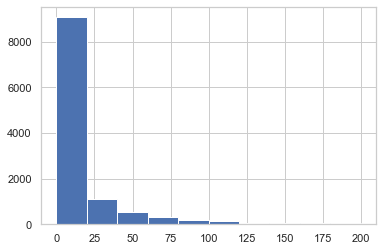

In [279]:
acum['PROM_CANT_TRX_U12M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum[acum['PROM_CANT_TRX_U12M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

<AxesSubplot:>

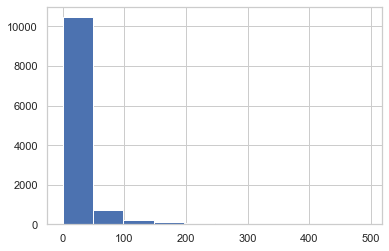

In [280]:
acum['PROM_CANT_TRX_U6M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))
acum[acum['PROM_CANT_TRX_U6M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

In [281]:
acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'] =  acum['PROM_CANT_TRX_U6M_CASHIN'] - acum['PROM_CANT_TRX_U12M_CASHIN']
def div_flash(a, b):
    if not(b):
        return a
    
    return a/b


acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'] = acum[['PROM_CANT_TRX_U6M_CASHIN', 'PROM_CANT_TRX_U12M_CASHIN']].apply(lambda _: div_flash(_[0], _[1]), axis=1)
acum['TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.99)
acum['TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.97)
acum['TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.95)
acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.9)
acum['TIENE_DISMINUCION_15PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.85)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.8)
acum['TIENE_DISMINUCION_25PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.75)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.7)
acum['TIENE_DISMINUCION_35PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.65)
acum['TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.6)
acum['TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.55)

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ < 0).astype(int)

In [282]:


acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [283]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHIN,PROM_CANT_TRX_U6M_CASHIN,DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN,ratio_PROM_CANT_TRX_U6M_U12M_CASHIN,TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,...,TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT
0,0000002469,202007,0.583333,1.000000,0.416667,1.714286,False,False,False,False,...,False,False,1,0,1,1,1,0,0,0
1,0000003392,202007,10.916667,11.166667,0.250000,1.022901,False,False,False,False,...,False,False,1,0,1,0,0,0,0,0
2,0000006114,202007,14.666667,12.000000,-2.666667,0.818182,True,True,True,True,...,False,False,0,1,1,1,1,0,0,0
3,0000008318,202007,5.333333,3.500000,-1.833333,0.656250,True,True,True,True,...,False,False,0,1,1,1,1,0,0,0
4,0000038026,202007,2.083333,1.000000,-1.083333,0.480000,True,True,True,True,...,True,True,0,1,1,1,1,0,0,0


In [284]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 621)

## LO MISMO PARA EL CASH OUT

In [285]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1997, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3994, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5991, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7988, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9985, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(11982, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[7, 22, 8, 6, 6, 6, 6, 6, 6, 4, 9, 6]",202007
1,0000003392,"[52, 54, 51, 41, 49, 48, 51, 44, 29, 44, 38, 37]",202007
2,0000006114,"[43, 48, 49, 30, 41, 59, 26, 25, 33, 17, 24, 74]",202007
3,0000008318,"[49, 38, 30, 66, 54, 47, 45, 49, 32, 27, 33, 37]",202007
4,0000037374,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",202007


In [286]:
acum['PROM_CANT_TRX_U12M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum['PROM_CANT_TRX_U6M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))

acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'] =  acum['PROM_CANT_TRX_U6M_CASHOUT'] - acum['PROM_CANT_TRX_U12M_CASHOUT']

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [287]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHOUT,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,0000002469,202007,7.666667,6.166667,-1.500000,0,1,0,0,0,1,1,1
1,0000003392,202007,44.833333,40.500000,-4.333333,0,1,0,0,0,0,0,0
2,0000006114,202007,39.083333,33.166667,-5.916667,0,1,1,1,1,0,0,0
3,0000008318,202007,42.250000,37.166667,-5.083333,0,1,1,0,0,0,0,0
4,0000037374,202007,2.000000,2.000000,0.000000,0,0,0,0,0,0,0,0


In [288]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 632)

### BASE CLIENTES UNIVERSO MESA ALERTAS

In [289]:
query_base = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
base = pd.read_sql(
   query_base , connection_market
)
base.head(2)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,GARANTIZAR,202007,0016343477,CORPORACION OTINGSA,0,0,0,0,0,0,...,S,NORMAL,NORMAL,LA LIBERTAD,2019-08-29,2019-09-11,CONSTRUCCIÓN,2,20482843299,20482843299
1,None,202007,0011271101,TRANSCORD,0,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2009-07-31,2018-02-12,TRANSPORTE,2,20513208597,20513208597


In [290]:
base.shape, base['CODUNICOCLI'].unique().shape

((12787, 39), (2071,))

In [291]:
base.shape

(12787, 39)

### Ultimo feve actual es el target de la cosecha_anterior (LUEGO SE DEBE BAJAR 2 MESES PAAR CONSIDERAR VENTANA OCULTA)

In [292]:
#base['PERIODO'] = (datetime.strptime(ultimo_mes_cerrado, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#base['COD_UNICO']  = base['CODUNICOCLI']

In [293]:
#base[['PERIODO', 'COD_UNICO', 'FEVE']].head(3)

In [294]:
#analisis_cliente = analisis_cliente.merge(
#    base[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [295]:
gc.collect()

132

### CONOCEME

In [296]:
#query_conoceme = """
#    SELECT * FROM WEBBE_INFINITY_CONOCEME  WITH (NOLOCK) 
#    ORDER BY FECHA_ACTUALIZACION DESC
#"""
#conoceme = pd.read_sql(
#   query_conoceme , connection_b20
#)

query_conoceme = """
     SELECT * FROM STG.T_WEBBE_INFINITY_CONOCEME WITH (NOLOCK) 
    ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_market
)

print("ANTES con duplicados: ", conoceme.shape[0])
conoceme = conoceme.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros unicos por codigo único: ", conoceme.shape[0])

conoceme.head(2)

ANTES con duplicados:  1070
Regsistros unicos por codigo único:  1061


,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP,FECHA_CARGA
0,0012560898,Transporte,Transporte de Carga,No Aplica,Transporte de carga por carretera de productos...,Dispone de unidades debidamente implementadas ...,Portafolio de clientes altamente calificados. ...,None,None,B36183,...,NaN,2020-12-31 17:37:40,Local,0,None,NaN,NaN,2011.0,2011.0,2021-01-12 13:00:00
1,0015283043,Servicios,Servicios De Ingeniería,Servicios,International inspecting Agency (Interinspect)...,"- Servicio especializado, pocas empresas e ing...",El principal riesgo es la concentración de ven...,None,None,B38518,...,NaN,2020-12-31 10:43:38,Local,0,None,NaN,NaN,2020.0,2008.0,2021-01-12 13:00:00


In [297]:
conoceme['CAMBIO_ACCIONISTAS_ANNIO'].value_counts(dropna=False)

NaN       1058
2020.0       2
2019.0       1
Name: CAMBIO_ACCIONISTAS_ANNIO, dtype: int64

In [298]:
conoceme['CAMBIO_GERENCIA_GENERAL_ANNIO'].value_counts(dropna=False)

NaN       1057
2020.0       3
2019.0       1
Name: CAMBIO_GERENCIA_GENERAL_ANNIO, dtype: int64

In [299]:
#conoceme['FECHA_ACTUALIZACION'].astype(str)

In [300]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP', 'FECHA_CARGA'],
      dtype='object')

<AxesSubplot:>

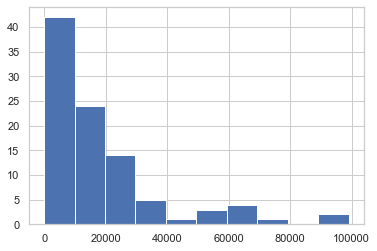

In [301]:
conoceme[conoceme['PROYECCION_VENTAS'] < 100000]['PROYECCION_VENTAS'].hist()

<AxesSubplot:>

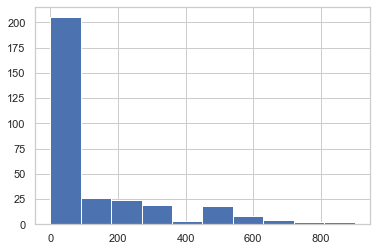

In [302]:
conoceme[conoceme['PROYECCION_INVERSION'] < 1000]['PROYECCION_INVERSION'].hist()

In [303]:
conoceme.isnull().sum()

COD_UNICO                           0
ACTIVIDAD                          10
SUBSECTOR                          20
BACKLOG                            37
MODELO_NEGOCIO                      6
VENTAJA_COMPETITIVA                23
FORTALEZAS_RIESGOS                 46
INTEGRACION_VERTICAL             1061
GESTION_COMPRAS                   987
REGISTRO                            0
GERENTE_GENERAL                    25
GERENTE_FINANCIERO_TIPO           168
GERENTE_FINANCIERO_NOMBRE         233
TIPO_CONTABILIDAD                   0
MONTO_LINEA_PROVEEDORES           451
ACTIVO_LIBRE_GRAVAMEN             451
PROYECCION_INVERSION              694
PROYECCION_VENTAS                 962
FECHA_ACTUALIZACION                 0
PROCEDENCIA_MPRIMA                252
LINEA_SUCESION_FLAG                 1
LINEA_SUCESION                    451
CAMBIO_GERENCIA_GENERAL_ANNIO    1057
CAMBIO_ACCIONISTAS_ANNIO         1058
INICIO_IBK                         71
INICIO_OP                          74
FECHA_CARGA 

In [304]:
analisis_cliente.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M_y,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M_y,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,8.166667,2.750000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,7.500000,0.666667,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,19.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,202007,0014750165,20513017147,1,PETROPACK,0,0,0,0,0,...,26.500000,-10.166667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,202008,0009426215,10079772157,0,PAREJA PAZ ENRIQUE GUILLERMO,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
len(conoceme['SUBSECTOR'].unique())

65

In [306]:
print(conoceme['SUBSECTOR'].unique())

['Transporte de Carga' 'Servicios De Ingeniería' 'Artículos diversos'
 'Clínicas' 'Acondicionamiento de Edificios' 'Hidrocarburos'
 'Textil y calzado' 'Servicios diversos' 'Limpieza' 'Minería'
 'Productos Eléctricos' 'Equipos computo' 'Construcción de Edificios'
 'Agrícola (Granos y Frutos)' 'Equipos' 'Turismo' 'Taller Automotriz'
 'Abarrotes' 'Metalmecánica' 'Fundición y Metales' 'Ganadero'
 'Restaurante y eventos sociales'
 'Agencia de Aduanas y servicios relacionados' 'Imprenta y papel'
 'Publicidad' 'Artículos de limpieza' 'Productos Marinos' None
 'Construcción de Carreteras' 'Hotelería' 'Medicamentos y equipos médicos'
 'Plástico y derivados' 'Catering' 'Tecnología y Telecomunicaciones'
 'Alquiler de equipos' 'Estación de Servicio' 'Obras civiles' 'Madera'
 'Saneamiento' 'Vehículos, repuestos y accesorios' 'Mantenimiento'
 'Empresa de Transmisión' 'Transporte interprovincial' 'Químicos'
 'Agrícola (Siembra)' 'Gestión Empresarial' 'Bebidas alcohólicas'
 'Servicios financieros' 'Ag

In [307]:
texto_banca = 'Vehículos_Textil y calzado_Turismo_Restaurante y eventos sociales_Hotelería_Transporte interprovincial_Transporte Urbano_Construcción de Edificio_Acondicionamiento de Edificios'

In [308]:
analisis_cliente = analisis_cliente.merge(
    conoceme[['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'INICIO_IBK', 'INICIO_OP', 'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
             'PROYECCION_INVERSION', 'PROYECCION_VENTAS']],
    how='left', on=['COD_UNICO']
)

analisis_cliente.shape

(11003, 641)

In [309]:
analisis_cliente['subsector_obervado_banca'] = analisis_cliente['SUBSECTOR'].apply(lambda _: str(_).upper() in texto_banca.upper()).astype(int)

In [310]:
del conoceme

In [311]:
#vpc['ES_ACTIVO'].value_counts(dropna=False)

In [312]:
#vpc['PERIODO'].max()

In [313]:
'FEC_INGRESO' in analisis_cliente.columns

True

In [314]:
analisis_cliente['FEC_INGRESO'] = pd.to_datetime(
    analisis_cliente['FEC_INGRESO'], errors='coerce', format='%Y-%m-%d'
)
analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] = pd.to_datetime(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'], errors='coerce', format='%Y-%m-%d'
)

def apply_diff_date(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

analisis_cliente['DIFF_TIME_INICIO_IBK_FIRST_PRODUCT'] = apply_diff_date(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] - analisis_cliente['FEC_INGRESO']
)

In [315]:
if 'FEC_PRIMER_PRODUCTO_APERTURADO' in analisis_cliente.columns:
    del analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO']
    
analisis_cliente['CLASIF_SBS'] = analisis_cliente['CLASIF_SBS'].fillna('MULO')
analisis_cliente['CLASIF_IBK'] = analisis_cliente['CLASIF_IBK'].fillna('MULO')
analisis_cliente['DEPARTAMENTO'] = analisis_cliente['DEPARTAMENTO'].fillna('MULO')

analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL', axis=1)
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].fillna('NULO')
analisis_cliente['LUGAR'] = analisis_cliente['DEPARTAMENTO'].apply(lambda _: 'PROVINCIA' if _.upper() not in ['LIMA', 'CALLAO'] else _)

In [316]:
#vpc['COD_UNICO'] = vpc['CODUNICOCLI']
#vpc.shape, vpc.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [317]:
#vpc['COD_UNICO'].unique().shape

In [318]:
#def apply_upper(val):
#    if pd.isnull(val):
#       return None
    
#    return val.upper()
#vpc['FEVE'] = vpc['FEVE'].apply(lambda _: apply_upper(_))
#vpc['IS_NORMAL_IBK_SBS'] = vpc['IS_NORMAL_IBK_SBS'].astype(int)
#vpc['DEPARTAMENTO'] = vpc['DEPARTAMENTO'].apply(lambda _: apply_upper(_))
#vpc.head()

In [319]:
#vpc['FEVE_DURO'] = vpc['FEVE'].copy()
#del vpc['FEVE']

In [320]:
analisis_cliente.shape

(11003, 644)

#### TARGET FEVE

In [321]:
query_vpc = """
    SELECT * FROM ODS.HD_VMVP_VPC_CLIENTE_ALERTAS_CARTERA_BE WITH (NOLOCK)

"""
vpc = pd.read_sql(
   query_vpc , connection_market
)
vpc.head()

,PERIODO,CODUNICOCLI,FEVE,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC
0,202001,0012568521,EX-FEVE,S,NORMAL,NORMAL,LIMA,2011-10-24,2013-04-29,TEXTIL,20537192012
1,202007,0009878722,EX-FEVE,S,NORMAL,NORMAL,LIMA,2006-08-25,1950-01-01,COMERCIO,20512122311
2,202003,0014850025,None,S,NORMAL,NORMAL,LIMA,2016-09-26,2016-09-27,TRANSPORTE,20522011445
3,202007,0009938270,None,S,NORMAL,NORMAL,LIMA,2006-10-31,2020-02-19,SERVICIOS,20504458521
4,202010,0016199187,GARANTIZAR,S,P.POTENCIAL,NORMAL,LA LIBERTAD,2019-06-11,2019-07-25,COMERCIO,20477476784


In [322]:
vpc['PERIODO'].max(), vpc['PERIODO'].min(), vpc.shape

('202012', '202001', (24319, 11))

In [323]:
vpc['COD_UNICO'] = vpc['CODUNICOCLI'].copy()

vpc = vpc.rename(columns={'FEVE': 'FEVE_VPC'}).merge(
    analisis_cliente[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
).sort_values(by=['PERIODO'])
vpc.tail(50)

,PERIODO,CODUNICOCLI,FEVE_VPC,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC,COD_UNICO,FEVE
6223,202012,0010550666,None,S,NORMAL,NORMAL,LIMA,2008-05-02,1950-01-01,COMERCIO,20503141389,0010550666,None
9414,202012,0010495957,None,S,NORMAL,NORMAL,LIMA,2008-03-27,2008-03-27,TRANSPORTE,20518321324,0010495957,None
6230,202012,0005434956,None,S,NORMAL,NORMAL,LIMA,1996-06-18,1950-01-01,COMERCIO,20307291968,0005434956,None
22495,202012,0012153286,EX-FEVE,S,NORMAL,NORMAL,LIMA,2011-01-20,2012-01-30,CONSTRUCCIÓN,20521937531,0012153286,EX-FEVE
6231,202012,0009245055,EX-FEVE,S,NORMAL,NORMAL,PIURA,2004-03-12,1950-01-01,AUTOMOTRIZ VEHÍCULOS,20483998270,0009245055,EX-FEVE
6232,202012,0011790040,EX-FEVE,S,NORMAL,NORMAL,LIMA,2010-06-23,2019-06-10,SERVICIOS,20106753751,0011790040,EX-FEVE
6233,202012,0010329091,REDUCIR,S,DUDOSO,DEFICIENTE,LIMA,2007-11-28,2007-11-28,TELECOMUNICACIONES,20507338748,0010329091,REDUCIR
22500,202012,0010427885,None,S,NORMAL,NORMAL,LIMA,2008-02-12,2009-01-15,SERVICIOS,20503039347,0010427885,None
9408,202012,0000164475,EX-FEVE,S,NORMAL,NORMAL,LIMA,1992-08-06,2010-06-17,SERVICIOS,20101128939,0000164475,EX-FEVE
11553,202012,0014197631,REDUCIR,S,NORMAL,NORMAL,LIMA,2015-05-27,2017-05-24,CONSTRUCCIÓN,20538578682,0014197631,REDUCIR


In [324]:
vpc['FEVE'] = vpc['FEVE'].combine_first(vpc['FEVE_VPC']).apply(lambda _: None if pd.isnull(_) else _.upper())

In [325]:
#analisis_cliente = analisis_cliente.merge(
#    vpc[['PERIODO', 'COD_UNICO', 'ES_ACTIVO', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT', 'SEI_MCDO', 'LUGAR', 'DEPARTAMENTO', 'FEC_INGRESO']],
#    how='left', on=['PERIODO','COD_UNICO']
#)
analisis_cliente.shape

(11003, 644)

In [326]:
analisis_cliente[analisis_cliente['PERIODO'].astype(int) >= 202007]['FEC_INGRESO'].head()

0   2019-08-29
1   2009-07-31
2   2018-02-09
3   2016-07-14
4   2005-01-22
Name: FEC_INGRESO, dtype: datetime64[ns]

In [327]:
#def get_antiguedad_ibk(fec, period):
#    #print(type(fec), type(period))
#    if pd.isnull(fec) or not fec:
#        return None
    
#    period_date = datetime.strptime(str(period), '%Y%m') + relativedelta(months=1)
#    return (period_date - fec).days
    
#analisis_cliente['ANTIGUEDAD_IBK'] = analisis_cliente[['FEC_INGRESO', 'PERIODO']].apply(
#    lambda _: get_antiguedad_ibk(_[0], _[1]), 
#    axis=1
#)

#display(analisis_cliente[analisis_cliente['PERIODO'].isin(['202007', '202008'])][['FEC_INGRESO', 'PERIODO', 'ANTIGUEDAD_IBK']].head(10))
#del analisis_cliente['FEC_INGRESO']

In [328]:
tramo[1][3:]

[201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009]

In [329]:
#vpc['PERIODO'].isin(tramo[1][3:]).shape

In [330]:
base.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [331]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (
        (vpc['PERIODO'] == str(202010)) | (vpc['PERIODO'] == str(202011))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0005834015', '0009980656', '0011880968', '0010589389', '0010489415', '0009120589', '0014197631', '0004610952', '0011871622', '0009646792', '0001728989', '0013629456', '0011859317', '0007977143', '0015149012', '0011687685', '0010290395', '0010087482', '0009068595', '0011868104', '0011003105', '0015467161', '0003934692', '0010654025', '0010560205', '0008345852', '0010019822', '0013532403', '0012153200', '0008948373', '0015438067', '0012539088', '0006065262', '0011020678', '0014094604', '0011756469', '0014625327', '0011868324', '0008843374', '0010424490', '0009533643', '0000698035', '0013293126', '0015022206', '0011869439', '0013681086', '0010637696', '0015253866', '0010243269', '0010329091', '0011874206', '0014181775', '0009313748', '0009621308', '0011812988', '0015975432', '0010051223', '0010127885', '0009037826', '0013009041', '0008722787', '0015531767', '0011793990', '0009033251', '0010029372', '0008395164', '0013248860', '0011026743', '0013891946', '0013268476', '0013939829', '0015

In [332]:
mes_analisis = str(202009)

descarte = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (vpc['PERIODO'] == mes_analisis) 

]['COD_UNICO'])
print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

111
{'0008843374', '0010489415', '0014197631', '0009678586', '0011595792', '0004610952', '0001728989', '0010335543', '0016376605', '0011563661', '0010856041', '0011714485', '0015167346', '0008708300', '0015145181', '0010654025', '0010019822', '0010821635', '0009033251', '0012767492', '0011020678', '0009114283'}
22


In [333]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (
        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0009169769', '0001016922', '0009712760', '0000457945', '0010489415', '0012638018', '0011438630', '0014197631', '0012579135', '0009254177', '0011292100', '0008236553', '0011246337', '0014807854', '0015009067', '0008339984', '0009642220', '0011861283', '0011866269', '0012565730', '0015477367', '0013076137', '0002443489', '0009024421', '0008355245', '0011799485', '0014492221', '0011870477', '0013434951', '0009270600', '0010111230', '0008701079', '0013007870', '0016496806', '0013230742', '0013738916', '0010038868', '0000318667', '0008442926', '0001902923', '0014047111', '0014632616', '0011874558', '0011365936', '0015162754', '0013203613', '0012110778', '0011874983', '0011228447', '0016156345', '0011725379', '0009764370', '0010853304', '0013222655', '0009228556', '0010698731', '0010730988', '0011860399', '0014861280', '0009330565', '0015307711', '0010793768', '0011403545', '0014546316', '0011438822', '0001489426', '0013818065', '0013486687', '0010514407', '0015922385', '0009282081', '0000

In [334]:
descarte = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (vpc['PERIODO'] == str(202009))

]['COD_UNICO'])

print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

195
{'0009966673', '0011870477', '0011985980', '0008844065', '0009642220', '0010969184', '0011866269', '0011585553', '0011260377', '0001959808', '0009980586', '0002443489', '0015307711', '0010987972', '0008443816'}
15


# >> REDUCIR SALIR

In [335]:
contador = 1
for tramo in tramos:
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    print(tramo[0], delante, just_antes)
    break

202007 [202008, 202009] 202007


In [336]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202012    1792
202011    1773
Name: PERIODO, dtype: int64

In [337]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_feve_reducir_salir'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_feve_reducir_salir'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2065, 4) (31, 4)
202008 [202009, 202010] 202008
(4130, 4) (70, 4)
202009 [202010, 202011] 202009
(6195, 4) (90, 4)
202010 [202011, 202012] 202010
(8260, 4) (101, 4)
202011 [202012, 202101] 202011
(10325, 4) (111, 4)
202012 [202101, 202102] 202012
(12390, 4) (111, 4)


,COD_UNICO,0,target_feve_reducir_salir,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [338]:
feve['PERIODO'].value_counts()

202011    2065
202009    2065
202010    2065
202012    2065
202007    2065
202008    2065
Name: PERIODO, dtype: int64

In [339]:
#feve[feve['PERIODO'].astype(int) >= 202007]['target_feve_reducir_salir'].value_counts(dropna=False)

In [340]:
analisis_cliente.shape

(11003, 644)

In [341]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(11003, 645)


PERIODO,202007,202008,202009,202010,202011,202012,All
target_feve_reducir_salir,,,,,,,
-1.0,90,98,108,119,117,123,655
0.0,1802,1745,1704,1672,1647,1669,10239
1.0,31,39,20,10,9,0,109
All,1923,1882,1832,1801,1773,1792,11003


In [342]:
del feve

In [343]:
del transac_cliente

In [344]:
gc.collect()

66

### TARGET FEVE 3 NMES DE BUENO HACI ATARS

In [345]:
#assert False

In [346]:

#for tramo in tramos:
#    delante = tramo[-1]
#    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2][-3:])
    
#    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
#    display(pd.crosstab(
#        reducir_salir['FEVE'], reducir_salir['PERIODO']
#    ))
#    print(len(set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])))
#    print(len(set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])))
   # print(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2])].shape)


In [347]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])

    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    

    
    print(feve.shape, feve[feve['target_feve_reducir_salir_3Mbueno'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2065, 4) (31, 4)
202008 [202009, 202010] 202008
(4130, 4) (70, 4)
202009 [202010, 202011] 202009
(6195, 4) (90, 4)
202010 [202011, 202012] 202010
(8260, 4) (101, 4)
202011 [202012, 202101] 202011
(10325, 4) (111, 4)
202012 [202101, 202102] 202012
(12390, 4) (111, 4)


,COD_UNICO,0,target_feve_reducir_salir_3Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [348]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir_3Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(11003, 646)


PERIODO,202007,202008,202009,202010,202011,202012,All
target_feve_reducir_salir_3Mbueno,,,,,,,
-1.0,86,94,104,119,117,121,641
0.0,1806,1749,1708,1672,1647,1671,10253
1.0,31,39,20,10,9,0,109
All,1923,1882,1832,1801,1773,1792,11003


In [349]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,202012,All
target_feve_reducir_salir,,,,,,,
-1.0,90,98,108,119,117,123,655
0.0,1802,1745,1704,1672,1647,1669,10239
1.0,31,39,20,10,9,0,109
All,1923,1882,1832,1801,1773,1792,11003


In [350]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(tramo[2][-1:])]['COD_UNICO'])
    
    print(len(feve_duro), len(no_blancos))

202007 [202008, 202009] 202007
118 87
202008 [202009, 202010] 202008
132 98
202009 [202010, 202011] 202009
130 111
202010 [202011, 202012] 202010
135 129
202011 [202012, 202101] 202011
131 125
202012 [202101, 202102] 202012
0 131


In [351]:
contador = 1

for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_feve_reducir_salir_1Mbueno'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2065, 4) (31, 4)
202008 [202009, 202010] 202008
(4130, 4) (70, 4)
202009 [202010, 202011] 202009
(6195, 4) (92, 4)
202010 [202011, 202012] 202010
(8260, 4) (103, 4)
202011 [202012, 202101] 202011
(10325, 4) (113, 4)
202012 [202101, 202102] 202012
(12390, 4) (113, 4)


,COD_UNICO,0,target_feve_reducir_salir_1Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [352]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir_1Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(11003, 647)


PERIODO,202007,202008,202009,202010,202011,202012,All
target_feve_reducir_salir_1Mbueno,,,,,,,
-1.0,86,94,102,117,114,116,629
0.0,1806,1749,1708,1674,1650,1676,10263
1.0,31,39,22,10,9,0,111
All,1923,1882,1832,1801,1773,1792,11003


## >>> RESCATE SEGUIR COVID

In [353]:
max_period_vpc = analisis_cliente['PERIODO'].max()
max_period_vpc

'202012'

In [354]:
clientes = clientes[['COD_UNICO', 'FEVE']]
clientes['PERIODO'] = max_period_vpc
clientes['FEVE_'] = clientes['FEVE'].str.upper()
clientes.head()

,COD_UNICO,FEVE,PERIODO,FEVE_
0,0016343477,GARANTIZAR,202012,GARANTIZAR
1,0011271101,None,202012,None
2,0015508354,None,202012,None
3,0014750165,None,202012,None
4,0009426215,EX-FEVE,202012,EX-FEVE


In [355]:
clientes['FEVE_'].value_counts()

EX-FEVE         3306
GARANTIZAR      1241
SEGUIR           792
SEGUIR COVID     760
REDUCIR          492
SALIR            139
RECUP.             4
Name: FEVE_, dtype: int64

In [356]:
#analisis_cliente = analisis_cliente.merge(
#    clientes, how='left', on=['COD_UNICO', 'PERIODO']
#)

In [357]:
#vpc['FEVE_'] = vpc['FEVE_'].combine_first(vpc['FEVE_x'])
#vpc.head()

In [358]:
#feve_duro = list(vpc[
#    (vpc['FEVE_x'].isin(['SEGUIR'])) &(vpc['FEVE_'].isin(['SEGUIR COVID'])) & (
#        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
#    )
#]['COD_UNICO'])
#print(feve_duro, len(feve_duro))

In [359]:
#descarte = list(vpc[
#    (vpc['FEVE_'].isin(['REDUCIR', 'SALIR', 'SEGUIR'])) & (vpc['PERIODO'] == str(202008)) 

#]['COD_UNICO'])
#print(len(descarte))
#print(set(feve_duro) - set(descarte), len(set(feve_duro) - set(descarte)))

In [360]:
#vpc[vpc['COD_UNICO'] == '0011463767'].sort_values(by=['PERIODO'])

# >> SEGUIR COVID

In [361]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid'] == 1].shape)
seguir.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (163, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (311, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (328, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (341, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (349, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (349, 4)


,COD_UNICO,0,target_seguir_covid,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [362]:
seguir['target_seguir_covid'].value_counts()

0.0    10333
1.0      349
Name: target_seguir_covid, dtype: int64

In [363]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 648)

In [364]:
'target_seguir_covid' in analisis_cliente.columns

True

In [365]:
analisis_cliente[
    (analisis_cliente['target_feve_reducir_salir'] == 1) | (analisis_cliente['target_seguir_covid'] == 1)
].shape

(453, 648)

In [366]:
pd.crosstab(
    analisis_cliente['target_seguir_covid'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,202012,All
target_seguir_covid,,,,,,,
0.0,1628,1567,1506,1462,1438,1454,9055
1.0,163,148,16,13,8,0,348
All,1791,1715,1522,1475,1446,1454,9403


In [367]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['target_seguir_covid'], margins=True
)

target_seguir_covid,0.0,1.0,All
target_feve_reducir_salir,,,
0.0,8958,344,9302
1.0,97,4,101
All,9055,348,9403


In [368]:
analisis_cliente['target_seguircovid_reducir_salir'] = analisis_cliente[['target_feve_reducir_salir', 'target_seguir_covid']].apply(
    lambda _: (_[0] == 1 or _[1] == 1) , axis=1
).astype(int)

In [369]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,202012,All
target_feve_reducir_salir,,,,,,,
0.0,1802,1745,1704,1672,1647,1669,10239
1.0,31,39,20,10,9,0,109
All,1833,1784,1724,1682,1656,1669,10348


In [370]:
pd.crosstab(
    analisis_cliente['target_seguircovid_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,202012,All
target_seguircovid_reducir_salir,,,,,,,
0,1729,1699,1796,1778,1756,1792,10550
1,194,183,36,23,17,0,453
All,1923,1882,1832,1801,1773,1792,11003


#### TARGET SEGUIR COVID

In [371]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid_3Mbueno'] == 1].shape)
seguir.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (163, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (311, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (328, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (341, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (349, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (349, 4)


,COD_UNICO,0,target_seguir_covid_3Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [372]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 650)

In [373]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid_1Mbueno'] == 1].shape)
seguir.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (163, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (311, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (329, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (343, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (351, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (351, 4)


,COD_UNICO,0,target_seguir_covid_1Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [374]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 651)

In [382]:

    analisis_cliente['target_seguircovid_reducir_salir_3Mbueno'] = analisis_cliente[['target_feve_reducir_salir_3Mbueno', 'target_seguir_covid_3Mbueno']].apply(
       lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
    )


In [383]:

    analisis_cliente['target_seguircovid_reducir_salir_1Mbueno'] = analisis_cliente[['target_feve_reducir_salir_1Mbueno', 'target_seguir_covid_1Mbueno']].apply(
         lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
    )


In [384]:
'target_seguircovid_reducir_salir_1Mbueno' in analisis_cliente.columns

True

## >> TARGET CONTRASTE PREOCUPA

In [385]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro:
            return 1
        else:
            return 0
    
    quedan['cuasi_target_preocupa'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['cuasi_target_preocupa'] == 1].shape)
seguir.head()

202007 [202008, 202009] 202007
(2065, 4) (322, 4)
202008 [202009, 202010] 202008
(4130, 4) (658, 4)
202009 [202010, 202011] 202009
(6195, 4) (988, 4)
202010 [202011, 202012] 202010
(8260, 4) (1322, 4)
202011 [202012, 202101] 202011
(10325, 4) (1517, 4)
202012 [202101, 202102] 202012
(12390, 4) (1517, 4)


,COD_UNICO,0,cuasi_target_preocupa,PERIODO
0,0000002469,6,0,202007
1,0000003392,6,0,202007
2,0000006114,6,0,202007
3,0000008318,6,0,202007
4,0000037374,2,0,202007


In [386]:
seguir['cuasi_target_preocupa'].value_counts()

0    10873
1     1517
Name: cuasi_target_preocupa, dtype: int64

In [387]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cuasi_target_preocupa']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 654)

# >> NO NOMRLA SBS O IBK

In [388]:
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(
    lambda _: None if pd.isnull(_[0] ) else( 1 if _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL' else 0), axis=1
)

In [389]:
#nalisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].astype(int)

In [390]:
delante = [202009, 202010]
just_antes = 202008
no_normales = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
        (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])
print(len(no_normales))
descarte = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])
print(len(descarte))

print(set(no_normales) - set(descarte)) 

234
107
{'0013119587', '0013222358', '0016129832', '0015028117', '0014055971', '0011768131', '0016199187', '0011874141', '0014898678', '0012638018', '0015729885', '0011608752', '0016452109', '0014121784', '0013293126', '0013446995', '0009430500', '0013310457', '0016661983', '0011563661', '0010845883', '0015167346', '0011873524', '0016294193', '0009125935', '0016355793', '0008718102', '0015142223', '0011869001', '0013251454', '0015795764', '0013814763', '0015242107', '0011874206', '0009313748', '0007567530', '0011026743', '0010667842', '0010622858', '0010173069', '0013203613', '0010847030', '0011859551'}


In [391]:
#vpc[vpc['COD_UNICO'] == '0008718102'].sort_values(by=['PERIODO'])

In [392]:
#vpc.head()

In [393]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]

    no_normales = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
            (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    descarte = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) | (
            analisis_cliente['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1

    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs'] == 1].shape)
normalidad.head()

202007 [202008, 202009] 202007
(2065, 4) (54, 4)
202008 [202009, 202010] 202008
(4130, 4) (97, 4)
202009 [202010, 202011] 202009
(6195, 4) (118, 4)
202010 [202011, 202012] 202010
(8260, 4) (143, 4)
202011 [202012, 202101] 202011
(10325, 4) (159, 4)
202012 [202101, 202102] 202012
(12390, 4) (159, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [394]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 655)

In [395]:
normalidad[normalidad['PERIODO'].astype(int) >= 202007]['target_no_normales_ibk_sbs'].value_counts()

0.0    11322
1.0      159
Name: target_no_normales_ibk_sbs, dtype: int64

In [396]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_2.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [397]:
#analisis_cliente.head()

In [398]:
#analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].apply(lambda _: None if pd.isnull(_) else int(_))
#analisis_cliente['IS_NORMAL_IBK_SBS'].value_counts()

<AxesSubplot:>

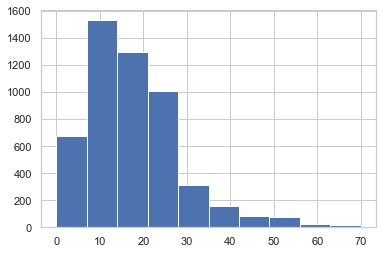

In [399]:
analisis_cliente['ANTIGUEDAD_cracion_ficha'] = 2020 - analisis_cliente['INICIO_OP']
analisis_cliente['ANTIGUEDAD_cracion_ficha'].hist()

In [400]:
#analisis_cliente['target_div_u3_u5'] = analisis_cliente[['TRX_PROM_u3m', 'TRX_PROM_u5m']].apply(
#    lambda _: get_div_means_perios(_[0], _[1]), axis=1
#)

In [401]:
#analisis_cliente['target_ratio_u3m_yoy'] = analisis_cliente['TRX_ratio_u3m_yoy'].copy()
#analisis_cliente['target_feve'] = analisis_cliente['FEVE_DURO'].copy()

In [402]:
#targets = analisis_cliente[['COD_UNICO', 'PERIODO', 'target_div_u3_u5', 'target_ratio_u3m_yoy', 'target_feve']]

#del analisis_cliente['target_div_u3_u5']
#del analisis_cliente['target_ratio_u3m_yoy']
#del analisis_cliente['target_feve']

#targets['PERIODO'] = targets['PERIODO'] .apply(
#    lambda _: (datetime.strptime(_, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#)
#targets['PERIODO'].max()

In [403]:
#analisis_cliente = analisis_cliente.merge(
#    targets, how='left', on=['PERIODO', 'COD_UNICO']
#)

In [404]:
#analisis_cliente['FEVE'] = analisis_cliente['FEVE'].combine_first(analisis_cliente['target_feve'])

In [405]:
#analisis_cliente['target_feve'] = analisis_cliente['FEVE'].copy()
#del analisis_cliente['FEVE']

#analisis_cliente.head(3)

In [406]:
#analisis_cliente.to_excel('analisis_cliente_targets.xlsx', index=False)

In [407]:
#analisis_cliente['target_feve_reducir_salir'].unique()

array([ 0., nan,  1.])

In [408]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['REDUCIR', 'SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_preocupa'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_preocupa'].value_counts(dropna=False)

In [409]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_salir_reducir'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_salir_reducir'].value_counts(dropna=False)

In [410]:
"""
def graph_numeric(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])
    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient='h')
    
    legend_list = []
    for opt in data[col_out].unique():
        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)
        legend_list.append(opt)
    plt.legend(legend_list)

def graph_categoryc(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])
    plt.setp(cp.get_xticklabels(), rotation=90)
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt='.2%'
    )
    bp = sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[2]
    )
    plt.setp(bp.get_xticklabels(), rotation=90)
"""

'\ndef graph_numeric(data, col_init, col_out, **kwargs):\n    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))\n\n    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])\n    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient=\'h\')\n    \n    legend_list = []\n    for opt in data[col_out].unique():\n        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)\n        legend_list.append(opt)\n    plt.legend(legend_list)\n\ndef graph_categoryc(data, col_init, col_out, **kwargs):\n    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))\n    \n    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])\n    plt.setp(cp.get_xticklabels(), rotation=90)\n    \n    cross = pd.crosstab(data[col_out], data[col_init])\n    sum_total = sum([cross[col].sum() for col in cross.columns])\n    sns.heatmap(\n        cross/sum_total, \n        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt=\'.2%\'\n    )\n    bp = sns.barp

In [411]:
[col for col in analisis_cliente.columns if 'target' in col]

['target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_feve_reducir_salir',
 'target_feve_reducir_salir_3Mbueno',
 'target_feve_reducir_salir_1Mbueno',
 'target_seguir_covid',
 'target_seguircovid_reducir_salir',
 'target_seguir_covid_3Mbueno',
 'target_seguir_covid_1Mbueno',
 'target_seguircovid_reducir_salir_3Mbueno',
 'target_seguircovid_reducir_salir_1Mbueno',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs']

In [412]:
print(analisis_cliente.columns)

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'target_feve_reducir_salir_1Mbueno', 'target_seguir_covid',
       'target_seguircovid_reducir_salir', 'target_seguir_covid_3Mbueno',
       'target_seguir_covid_1Mbueno',
       'target_seguircovid_reducir_salir_3Mbueno',
       'target_seguircovid_reducir_salir_1Mbueno', 'cuasi_target_preocupa',
       'target_no_normales_ibk_sbs', 'ANTIGUEDAD_cracion_ficha'],
      dtype='object', length=656)


In [413]:
#graph_numeric(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
#    ], 'NRO_VECES_REACTIVA_SF', 'target_feve_reducir_salir'
#)

In [414]:
#graph_categoryc(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
#    ], 'FM_category_quartil', 'target_feve_reducir_salir'
#)

In [415]:
gc.collect()

365

In [416]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((11003, 656), (11003,))

### SOW 

In [417]:
qsow = """
    SELECT * FROM ODS.HD_VMVP_SOW_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
sow = pd.read_sql(
   qsow , connection_market
)
sow.head(3)

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0012579135,201912,14823835.27,1104491.60,10946455.27,3877380.00,1657000.00,3987608.92,6570235.88,0.0,0.074507,0.111779,0.268999,0.443221,0.000000,0.824000,0.738436
1,0009028120,202001,673382.64,214405.65,673382.64,0.00,370499.11,88477.88,0.00,0.0,0.318400,0.550205,0.131393,0.000000,0.000000,0.681599,1.000000
2,0009362978,202004,3883925.59,0.00,3441050.24,442875.35,2070043.10,459560.59,0.00,1354321.9,0.000000,0.532977,0.118323,0.000000,0.348699,1.000000,0.885972


In [418]:
sow['PERIODO'].max()

'202011'

In [419]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, sow['PERIODO'].max()

((39722, 17), (39722,), '202011')

### OJO , cuando tomo una cosecha uso el periodo SOW del mes anterior entonces para cruzarlo debo aumnetar un periodo

In [420]:
sow['PERIODO'] = sow['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
sow['PERIODO'].max()

'202012'

In [421]:
analisis_cliente = analisis_cliente.merge(
        sow[['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_BBVA', 'SOW_BCP', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 663)

<AxesSubplot:>

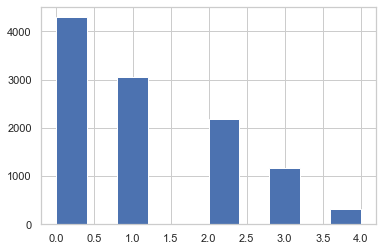

In [422]:
analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] < _[1]) + int(_[0] < _[2]) + int(_[0] < _[3]) + int(_[0] < _[4]), axis=1
)
display(analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].hist())

analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] > _[1]) + int(_[0] > _[2]) + int(_[0] > _[3]) + int(_[0] > _[4]), axis=1
)

In [423]:
analisis_cliente['TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 2).astype(int)
analisis_cliente['TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 3).astype(int)
analisis_cliente['TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 1).astype(int)

<AxesSubplot:>

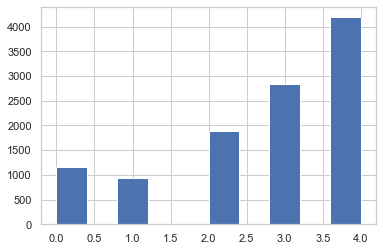

In [424]:
display(analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'].hist())

In [425]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((11003, 668), (11003,))

In [426]:
[_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]

['SOW_IBK',
 'SOW_BBVA',
 'SOW_BCP',
 'SOW_BIF',
 'SOW_SCOTIA',
 'SOW_OTROSBCOS',
 'NRO_BANCOS_CON_MAYOR_SOW',
 'NRO_BANCOS_CON_MENOR_SOW',
 'TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW']

In [427]:
for col in [_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]:
    print(col)
    analisis_cliente[col + '_ULT_RCC'] = analisis_cliente[col].copy()
    del  analisis_cliente[col]
#analisis_cliente['SOW_IBK_utl_rcc'] = analisis_cliente['SOW_IBK'].copy()
#del analisis_cliente['SOW_IBK']

SOW_IBK
SOW_BBVA
SOW_BCP
SOW_BIF
SOW_SCOTIA
SOW_OTROSBCOS
NRO_BANCOS_CON_MAYOR_SOW
NRO_BANCOS_CON_MENOR_SOW
TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW


In [428]:
sow['PERIODO'].max(), sow['PERIODO'].min(),analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

('202012', '201905', (11003, 668), (11003,))

## VARIACION SOW

In [429]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202007, 202008, 202009, 202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102] [202001, 202002]
 histroia  [202006, 202007, 202008, 202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [430]:
dicc_kpi = {
    'SOW_IBK': ['max', 'min'],
    'SOW_OTROSBCOS': ['max', 'min'],
    'PERCENT_COL_DIRECTAS_SF': ['max', 'min'] 
}

columns_base = ['SOW_IBK_MAX_', 'SOW_IBK_MIN_', 
               'SOW_OTROSBCOS_MAX_', 'SOW_OTROSBCOS_MIN_',
                'PERCENT_COL_DIRECTAS_SF_MAX_', 'PERCENT_COL_DIRECTAS_SF_MIN_'
               ]
contador = 1
cols_order = []

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[2]
    
    _2m_anio_actual = sow[sow['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actual.columns = [_ + 'historia' for _ in columns_base]
    
    #data_tramo = pd.concat(
    #    [_12m_anio_actual, _6m_anio_actual, _3m_anio_actual], axis=1
    #).reset_index()
    data_tramo = _2m_anio_actual.reset_index()
    
    try:
        data_tramo['COD_UNICO'] = data_tramo['index']
        del data_tramo['index']
    except:
        pass
    
    data_tramo['PERIODO'] = str(tramo[0])
    #print(data_tramo.columbns)
    del _2m_anio_actual
    
    #print(list(data_tramo.columns))
    if contador == 1:
        sow_cliente = data_tramo
        cols_order = list(sow_cliente.columns)
    else:
        sow_cliente = pd.concat(
            [sow_cliente, data_tramo], axis=0
        )[cols_order]
    
    contador += 1
    #print(data_tramo.head())
    print("--", sow_cliente.shape)


202012 [202101, 202102] [202001, 202002]
-- (2062, 8)
202011 [202012, 202101] [201912, 202001]
-- (4120, 8)
202010 [202011, 202012] [201911, 201912]
-- (6175, 8)
202009 [202010, 202011] [201910, 201911]
-- (8224, 8)
202008 [202009, 202010] [201909, 201910]
-- (10272, 8)
202007 [202008, 202009] [201908, 201909]
-- (12317, 8)


In [431]:
sow_cliente.head()

,COD_UNICO,SOW_IBK_MAX_historia,SOW_IBK_MIN_historia,SOW_OTROSBCOS_MAX_historia,SOW_OTROSBCOS_MIN_historia,PERCENT_COL_DIRECTAS_SF_MAX_historia,PERCENT_COL_DIRECTAS_SF_MIN_historia,PERIODO
0,0000002469,0.184282,0.000000,0.810648,0.472807,0.925608,0.865684,202012
1,0000003392,0.088678,0.076237,0.895014,0.878753,0.997360,0.996759,202012
2,0000006114,0.850609,0.836208,0.000000,0.000000,0.783271,0.780072,202012
3,0000008318,0.565049,0.119272,0.880727,0.434950,0.540509,0.066666,202012
4,0000037374,0.000000,0.000000,1.000000,1.000000,1.000000,0.963029,202012


In [432]:
sow_cliente.shape, sow_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((12317, 8), (12317,), (11003, 668), (11003,))

In [433]:
sow_cliente.shape

(12317, 8)

### STROP SPW

In [434]:
analisis_cliente = analisis_cliente.merge(
    sow_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 674)

### DIAS DE ATRASO

In [435]:
query = """
    SELECT * FROM ODS.HD_VMVP_DIAS_ATRASO_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
atrsaso = pd.read_sql(
   query , connection_market
)
atrsaso.head(20)

,PERIODO,COD_UNICO,ESTADO,MAX_DIAS_ATRASO,DEUDA
0,202001,0009282081,VIGENTE,1.0,345669.0
1,202012,0012758760,VIGENTE,0.0,746271.0
2,201911,0009966673,VIGENTE,5.0,245051.0
3,202003,0009030093,VIGENTE,11.0,44917199.0
4,202004,0014279282,VIGENTE,21.0,3591886.0
5,202001,0015159697,VIGENTE,15.0,2360714.0
6,201910,0013496493,VIGENTE,26.0,289388.0
7,201910,0011858450,VENCIDO,35.0,48885.0
8,202010,0016672044,VIGENTE,8.0,848686.0
9,201905,0013682900,VIGENTE,7.0,916620.0


In [436]:
pivoteo = pd.pivot_table(
    atrsaso, values='MAX_DIAS_ATRASO', index=['COD_UNICO', 'PERIODO'], columns=['ESTADO'], aggfunc=len, fill_value=0
)
for col in pivoteo.columns:
    pivoteo['TIENE_DEUDA_'+ col + '_IBK'] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
    del pivoteo[col]
    
pivoteo['TIENE_VIEGNTE_VENCIDO_IBK'] = pivoteo[['TIENE_DEUDA_VENCIDO_IBK', 'TIENE_DEUDA_VIGENTE_IBK']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1)

pivoteo = pivoteo.reset_index().reset_index(drop=True)
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]
print(pivoteo['PERIODO'].max())
pivoteo.head()

202101


,COD_UNICO,PERIODO,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_VENCIDO_IBK,TIENE_DEUDA_VIGENTE_IBK,TIENE_VIEGNTE_VENCIDO_IBK
0,0000002469,202010,0,0,1,0
1,0000002469,202011,0,0,1,0
2,0000002469,202012,0,0,1,0
3,0000003392,201909,0,0,1,0
4,0000003392,202004,0,0,1,0


In [437]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 678)

In [438]:
#atrsaso = atrsaso.groupby(by=['PERIODO', 'COD_UNICO'])['MAX_DIAS_ATRASO'].max().reset_index()
#atrsaso.head()

In [439]:
#atrsaso['TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES'] = atrsaso['MAX_DIAS_ATRASO'].apply(lambda _: 1 if _ >= 1 else 0)

#analisis_cliente = analisis_cliente.merge(
#    atrsaso[['PERIODO', 'COD_UNICO', 'TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [440]:
atraso_ = pd.pivot_table(
    atrsaso, 
    values='MAX_DIAS_ATRASO', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index() 
atraso_.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO']
atraso_.head()

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO
0,201902,0000002469,0
1,201902,0000003392,0
2,201902,0000006114,0
3,201902,0000008318,0
4,201902,0000039982,0


In [441]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    break

202007 [202008, 202009] 202007 [202002, 202003, 202004, 202005, 202006, 202007]


### >>> DIAS DE ATRASO

In [442]:
delante = [202009, 202010]
just_antes = 202008

no_normales = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (
        (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

331
205
124


In [443]:
no_blancos = atraso_[
        (atraso_['MAX_DIAS_ATRASO'] > 8) | (
            atraso_['PERIODO'].isin([202003, 202004, 202005, 202006, 202007, 202008])
        )
    ]

no_blancos[no_blancos['MAX_DIAS_ATRASO'] > 8].shape, no_blancos.shape

((3550, 3), (3550, 3))

### >> MAAS DE 8 DIAS

In [444]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1

    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (74, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (124, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (155, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (169, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (184, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (192, 4)


,COD_UNICO,0,target_8_dias_atraso,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,NaN,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [445]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 679)

In [446]:
analisis_cliente['target_8_dias_atraso'].value_counts()

0.0    7596
1.0     190
Name: target_8_dias_atraso, dtype: int64

In [447]:
for tramo in tramos:
    print(tramo[0], tramo[2], tramo[1][-3])

202007 [202002, 202003, 202004, 202005, 202006, 202007] 202007
202008 [202003, 202004, 202005, 202006, 202007, 202008] 202008
202009 [202004, 202005, 202006, 202007, 202008, 202009] 202009
202010 [202005, 202006, 202007, 202008, 202009, 202010] 202010
202011 [202006, 202007, 202008, 202009, 202010, 202011] 202011
202012 [202007, 202008, 202009, 202010, 202011, 202012] 202012


## >> SOLO 3 MESES DE BUENO - ATRASOSS 8 DIAS

In [448]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        dd = quedan
    else:
        dd = pd.concat(
            [dd, quedan], axis=0
        )
    
    contador += 1
    
    
    print(dd.shape, dd[dd['target_8_dias_atraso_3Mbueno'] == 1].shape)
dd.head()

202007 [202008, 202009] 202007
(2065, 4) (104, 4)
202008 [202009, 202010] 202008
(4130, 4) (181, 4)
202009 [202010, 202011] 202009
(6195, 4) (232, 4)
202010 [202011, 202012] 202010
(8260, 4) (270, 4)
202011 [202012, 202101] 202011
(10325, 4) (299, 4)
202012 [202101, 202102] 202012
(12390, 4) (311, 4)


,COD_UNICO,0,target_8_dias_atraso_3Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,NaN,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [449]:
analisis_cliente = analisis_cliente.merge(
    dd[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_3Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

(11003, 680)


PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso_3Mbueno,,,,,,
-1.0,453,399,361,295,240,192
0.0,1366,1406,1421,1468,1505,1588
1.0,104,77,50,38,28,12


In [450]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_3Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso_3Mbueno,,,,,,
-1.0,453,399,361,295,240,192
0.0,1366,1406,1421,1468,1505,1588
1.0,104,77,50,38,28,12


In [451]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso,,,,,,
-1.0,637,646,596,527,429,382
0.0,1212,1186,1206,1260,1330,1402
1.0,74,50,30,14,14,8


### SOLO 1 MES DE BUENO - 8 DIAS DE ATRASO IBK

In [452]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_8_dias_atraso_1Mbueno'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2065, 4) (160, 4)
202008 [202009, 202010] 202008
(4130, 4) (284, 4)
202009 [202010, 202011] 202009
(6195, 4) (368, 4)
202010 [202011, 202012] 202010
(8260, 4) (446, 4)
202011 [202012, 202101] 202011
(10325, 4) (495, 4)
202012 [202101, 202102] 202012
(12390, 4) (510, 4)


,COD_UNICO,0,target_8_dias_atraso_1Mbueno,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [453]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_1Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

(11003, 681)


PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso_1Mbueno,,,,,,
-1.0,230,199,179,134,113,101
0.0,1533,1559,1570,1589,1612,1676
1.0,160,124,83,78,48,15


In [454]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_3Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso_3Mbueno,,,,,,
-1.0,453,399,361,295,240,192
0.0,1366,1406,1421,1468,1505,1588
1.0,104,77,50,38,28,12


In [455]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202007,202008,202009,202010,202011,202012
target_8_dias_atraso,,,,,,
-1.0,637,646,596,527,429,382
0.0,1212,1186,1206,1260,1330,1402
1.0,74,50,30,14,14,8


### >>> MAS DE 15 DIAS 

In [456]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 15]
    
    atrasdo_15 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_15 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_15_dias_atraso'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2065, 4) (64, 4)
202008 [202009, 202010] 202008
(4130, 4) (120, 4)
202009 [202010, 202011] 202009
(6195, 4) (153, 4)
202010 [202011, 202012] 202010
(8260, 4) (171, 4)
202011 [202012, 202101] 202011
(10325, 4) (186, 4)
202012 [202101, 202102] 202012
(12390, 4) (189, 4)


,COD_UNICO,0,target_15_dias_atraso,PERIODO
0,0000002469,6,0.0,202007
1,0000003392,6,NaN,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [457]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 682)

In [458]:
analisis_cliente['target_15_dias_atraso'].value_counts()

0.0    8694
1.0     187
Name: target_15_dias_atraso, dtype: int64

In [459]:
del quedan

In [460]:
del feve

## DEUDA SIN REACTIVA

In [461]:
query_deuda = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_SIN_REACTIVA_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
deuda = pd.read_sql(
   query_deuda , connection_market
)
deuda.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0015675237,201908,VIGENTE,COL. DIRECTAS,DESCUENTOS,437356.03,437356.03,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0015687867,201908,VIGENTE,COL. DIRECTAS,LEASING,794705.33,0.00,0.00,0.00,317432.84,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0015697014,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,4880193.91,679000.00,1994443.91,1358000.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,0015723570,201908,VIGENTE,COL. DIRECTAS,LEASING,3590957.90,0.00,0.00,1650152.86,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0015811987,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,43775.45,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
5,0015845976,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,1660782.47,133880.00,400000.00,827249.40,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
6,0015955076,201908,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,46450.44,0.00,46450.44,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
7,0016060645,201908,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,3262.03,0.00,3262.03,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
8,0016073282,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,2571006.56,328700.00,1071903.95,165761.00,633650.00,...,NaN,2.0,NaN,NaN,2,0,0,2,0,0
9,0016073282,201908,VIGENTE,COL. DIRECTAS,SOBREGIROS / AVANCES,160.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,1,0,0,0,0,0


In [462]:
print(list(deuda.columns))

['COD_UNICO', 'PERIODO', 'SITUACION', 'TIPO_PRODUCTO', 'PRODUCTO', 'MTOSALDO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA', 'PROM_DIAS_ATRASO_SF', 'PROM_DIAS_ATRASO_IBK', 'PROM_DIAS_ATRASO_BBVA', 'PROM_DIAS_ATRASO_BCP', 'PROM_DIAS_ATRASO_BIF', 'PROM_DIAS_ATRASO_SCOTIA', 'MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


#### PIVOTEO POR SITUACION ANTES DE FILTRAR

In [463]:
from datetime import datetime
deuda['PERIODO'].max(), deuda['PERIODO'].min()

('202011', '201904')

In [464]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_DEUDA_' + col + '_COLDIRECT_SIN_REATCIVA_SF'] = pivoteo[col].copy()
    pivoteo[col] = pivoteo[col] / pivoteo['total']
    
del pivoteo['total']
pivoteo.columns = [('DEBT_' + col).replace(' ', '_') + '_PERCENT_ULT_RCC' if '_SIN_REATCIVA' not in col else col for col in pivoteo.columns]
pivoteo.columns = [_.replace('/', '').upper() for _ in pivoteo.columns]
pivoteo.head(2)

DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201904                             0.0   
           201905                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201904                                 0.0   
           201905                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201904                            0.0   
           201905                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201904                            1.0   
           201905                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201904                                            0.0   
           201905                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201904                                                0.0   
           201905                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201904                                           0.0   
           201905                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201904                                    10479017.7   
           201905                                    10920156.7   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  
COD_UNICO  PERIODO                                             
0000002469 201904                                  10479017.7  
           201905                                  10920156.7

In [465]:
for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _]:
    print(col)
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo.head()

DEBT_JUDICIAL_PERCENT_ULT_RCC
DEBT_REFINANCIADO_PERCENT_ULT_RCC
DEBT_VENCIDO_PERCENT_ULT_RCC
DEBT_VIGENTE_PERCENT_ULT_RCC


DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201904                             0.0   
           201905                             0.0   
           201906                             0.0   
           201907                             0.0   
           201908                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201904                                 0.0   
           201905                                 0.0   
           201906                                 0.0   
           201907                                 0.0   
           201908                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201904                            0.0   
           201905                            0.0   
           201906                            0.0   
           201907                            0.0   
           201908                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201904                            1.0   
           201905                            1.0   
           201906                            1.0   
           201907                            1.0   
           201908                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201904                                            0.0   
           201905                                            0.0   
           201906                                            0.0   
           201907                                            0.0   
           201908                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201904                                                0.0   
           201905                                                0.0   
           201906                                                0.0   
           201907                                                0.0   
           201908                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201904                                           0.0   
           201905                                           0.0   
           201906                                           0.0   
           201907                                           0.0   
           201908                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201904                                   10479017.70   
           201905                                   10920156.70   
           201906                                   10711195.78   
           201907                                   11023629.02   
           201908                                   10807167.64   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                              
0000002469 201904                                 10479017.70   
           201905                                 10920156.70   
           201906                                 10711195.78   
           201907                                 11023629.02   
           201908                                 10807167.64   

                    TIENE_DEUDA_JUDICIAL_RCC  TIENE_DEUDA_REFINANCIADO_RCC  \
COD_UNICO  PERIODO                                            

In [466]:
pivoteo = pivoteo.reset_index()
# SE LE SUMA UN PEIODO
pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())

pivoteo['TIENE_VIEGNTE_VENCIDO_RCC'] = pivoteo[['TIENE_DEUDA_VENCIDO_RCC', 'TIENE_DEUDA_VIGENTE_RCC']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1
)
pivoteo.head(5)

202012


,COD_UNICO,PERIODO,DEBT_JUDICIAL_PERCENT_ULT_RCC,DEBT_REFINANCIADO_PERCENT_ULT_RCC,DEBT_VENCIDO_PERCENT_ULT_RCC,DEBT_VIGENTE_PERCENT_ULT_RCC,MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF,TIENE_DEUDA_JUDICIAL_RCC,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_VENCIDO_RCC,TIENE_DEUDA_VIGENTE_RCC,TIENE_VIEGNTE_VENCIDO_RCC
0,0000002469,201905,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10479017.70,10479017.70,0,0,0,1,0
1,0000002469,201906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10920156.70,10920156.70,0,0,0,1,0
2,0000002469,201907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10711195.78,10711195.78,0,0,0,1,0
3,0000002469,201908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11023629.02,11023629.02,0,0,0,1,0
4,0000002469,201909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10807167.64,10807167.64,0,0,0,1,0


In [467]:
pivoteo['DEB_SOLO_VIGENTES_SF_ULT_RCC'] = pivoteo['DEBT_VIGENTE_PERCENT_ULT_RCC'].apply(lambda _: _ == 1).astype(int)

In [468]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 682)


(11003, 697)

In [469]:
deuda.shape,  deuda[deuda['MTOSALDO_IBK'] == 0].shape

((115797, 23), (68296, 23))

In [470]:
import gc
gc.collect()

7030

In [471]:
del pivoteo

In [472]:
vigente = deuda[deuda['SITUACION'].isin(['VIGENTE', 'VENCIDO'])]
#vencido = deuda[deuda['SITUACION'] == 'VENCIDO']
#refinanciado = deuda[deuda['SITUACION'] == 'REFINANCIADO']
#judicial = deuda[deuda['SITUACION'] == 'JUDICIAL']

vigente.shape#, vencido.shape, refinanciado.shape, judicial.shape

(115001, 23)

In [473]:
vigente.head()

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0015675237,201908,VIGENTE,COL. DIRECTAS,DESCUENTOS,437356.03,437356.03,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0015687867,201908,VIGENTE,COL. DIRECTAS,LEASING,794705.33,0.00,0.00,0.00,317432.84,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0015697014,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,4880193.91,679000.00,1994443.91,1358000.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,0015723570,201908,VIGENTE,COL. DIRECTAS,LEASING,3590957.90,0.00,0.00,1650152.86,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0015811987,201908,VIGENTE,COL. DIRECTAS,PRESTAMOS,43775.45,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [474]:
#target_deuda_8_dias_rcc
#MAX_DIAS_ATRASO_SF

In [475]:
delante = [202010, 202011]
just_antes = 202009

no_normales = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (
        (vigente['PERIODO'] == str(delante[0])) | (vigente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (vigente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

604
292
203


In [476]:
atraso_ = vigente.copy()

atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (82, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (158, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (220, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (294, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (335, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (335, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso,PERIODO
0,0000002469,6,NaN,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [477]:
print(list(atraso_['SITUACION'].unique()))

['VIGENTE', 'VENCIDO']


In [478]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 698)

In [479]:
analisis_cliente['target_rcc_8_dias_atraso'].value_counts()

0.0    6544
1.0     310
Name: target_rcc_8_dias_atraso, dtype: int64

In [480]:
pd.crosstab(
    analisis_cliente['target_rcc_8_dias_atraso'], analisis_cliente['target_8_dias_atraso']
)

target_8_dias_atraso,0.0,1.0
target_rcc_8_dias_atraso,,
0.0,5460,83
1.0,157,28


In [484]:
analisis_cliente['target_SF_8_dias_atraso_o_mas'] = analisis_cliente[['target_8_dias_atraso', 'target_rcc_8_dias_atraso']].apply(
     lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0),axis= 1
)
analisis_cliente['target_SF_8_dias_atraso_o_mas'].value_counts()

0.0    5460
1.0     268
Name: target_SF_8_dias_atraso_o_mas, dtype: int64

In [485]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202012    1792
202011    1773
Name: PERIODO, dtype: int64

In [486]:
vigente.shape, vigente.groupby(by=['COD_UNICO','PERIODO']).size().shape

((115001, 23), (38587,))

##### SOLO 3 MESES DE BUENO -- 8 DIAS DE ATRASO RCC

In [487]:
atraso_ = vigente.copy()

atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    

    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_3Mbueno'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (164, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (298, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (421, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (534, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (597, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (597, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_3Mbueno,PERIODO
0,0000002469,6,1.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [488]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 700)

## SOLO 1 MES DE BUENO - 8 IDASI DE ATASO RCC

In [489]:
atraso_ = vigente.copy()

atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_1Mbueno'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2065, 4) (262, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4130, 4) (451, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6195, 4) (637, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8260, 4) (839, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10325, 4) (933, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(12390, 4) (933, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_1Mbueno,PERIODO
0,0000002469,6,1.0,202007
1,0000003392,6,0.0,202007
2,0000006114,6,0.0,202007
3,0000008318,6,0.0,202007
4,0000037374,2,0.0,202007


In [490]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 701)

In [492]:
try:
    analisis_cliente['target_SF_8_dias_atraso_o_mas_3Mbueno'] = analisis_cliente[['target_8_dias_atraso_3Mbueno', 'target_rcc_8_dias_atraso_3Mbueno']].apply(
        lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
    )
except:
    pass
#analisis_cliente['target_SF_8_dias_atraso_o_mas_3Mbueno'].value_counts()

In [493]:
try:
    analisis_cliente['target_SF_8_dias_atraso_o_mas_1Mbueno'] = analisis_cliente[['target_8_dias_atraso_1Mbueno', 'target_rcc_8_dias_atraso_1Mbueno']].apply(
        lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
    )
    #analisis_cliente['target_SF_8_dias_atraso_o_mas_1Mbueno'].value_counts()
except: 
    pass

## RECURRENCIA DE ATRASSOS

In [494]:
acum = generate_listado_u3m(
    atraso_, 'listados_atrasos_max_mes', values='MAX_DIAS_ATRASO_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(2039, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(4078, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(6117, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(8156, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(10195, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12234, 3)


,COD_UNICO,listados_atrasos_max_mes,PERIODO
0,0000002469,"[6, 8, 7, 5, 8, 7, 7, 8, 6, 0, 0, 4]",202007
1,0000003392,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
4,0000037374,"[8, 9, 4, 6, 7, 7, 4, 4, 1, 0, 0, 0]",202007


In [495]:
acum.tail(50)

,COD_UNICO,listados_atrasos_max_mes,PERIODO
1989,0016401263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1990,0016402624,"[0, 0, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0]",202012
1991,0016412662,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1992,0016414889,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1993,0016452109,"[0, 0, 0, 15, 0, 1, 1, 2, 21, 15, 0, 0]",202012
1994,0016464257,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 13]",202012
1995,0016468520,"[0, 32, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1996,0016493987,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1997,0016496806,"[0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0]",202012
1998,0016497789,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202012


<AxesSubplot:>

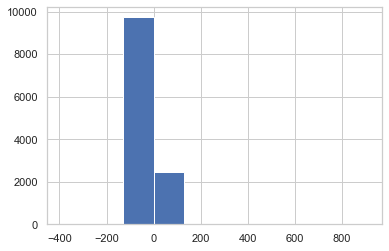

In [496]:
acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-12:]))
acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-6:]))
acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'] = acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] - acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] 

acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].hist()

<AxesSubplot:>

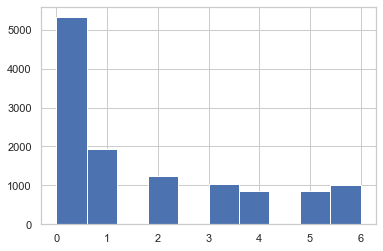

In [497]:
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes > 0])
)                                                                       
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'].hist()                                                                                                                                                                                          

<AxesSubplot:>

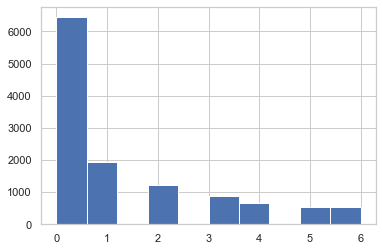

In [498]:
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes >= 4])
)                                                                       
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'].hist() 

In [499]:
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'] = acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].apply(lambda _: _> 0).astype(int)
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'].value_counts()

0    8334
1    3900
Name: TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF, dtype: int64

In [500]:
del acum['listados_atrasos_max_mes']
acum.head()

,COD_UNICO,PERIODO,ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF,DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF,TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF
0,0000002469,202007,5.500000,4.166667,-1.333333,4,4,0
1,0000003392,202007,0.000000,0.000000,0.000000,0,0,0
2,0000006114,202007,0.000000,0.000000,0.000000,0,0,0
3,0000008318,202007,0.000000,0.000000,0.000000,0,0,0
4,0000037374,202007,4.166667,1.500000,-2.666667,3,2,0


In [501]:
acum['PERIODO'] = acum['PERIODO'].astype(str)

analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 709)

In [502]:
del acum
del atraso_

### PIVOTEO DE PRODUCTOS SOBRE VIGENTES Y VENCIDOS

In [503]:
pivoteo = pd.pivot_table(
    vigente, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('DEBT_' + '_'.join(col)).replace(' ', '_') + '_PERCENT_ULT_RCC' for col in pivoteo.columns]


for col in pivoteo.columns:
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo = pivoteo.reset_index()

pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo.head()

202012


,COD_UNICO,PERIODO,DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC,DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC,DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC,DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC,DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC,DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC,...,TIENE_DEUDA_LEASING_VENCIDO_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VENCIDO_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VENCIDO_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VENCIDO_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VENCIDO_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC
0,0000002469,201905,0.0,0.076343,0.0,0.614141,0.0,0.124118,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0000002469,201906,0.0,0.073259,0.0,0.609396,0.0,0.135836,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
2,0000002469,201907,0.0,0.046680,0.0,0.614491,0.0,0.158140,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
3,0000002469,201908,0.0,0.057150,0.0,0.574798,0.0,0.191801,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,0000002469,201909,0.0,0.058295,0.0,0.542120,0.0,0.215095,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [504]:
pivoteo['NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_OTROS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VIGENTE_PERCENT_ULT_RCC',
       'TIENE_DEUDA_COMEX_VENCIDO_RCC', 'TIENE_DEUDA_COMEX_VIGENTE_RCC',
       'TIENE_DEUDA_DESCUENTOS_VENCIDO_RCC',
       'TIENE_DEUDA_DESCUENTOS_VIGENTE_RCC',
       

In [505]:
pivoteo['TIENE_SOBREGIRO_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_LEASING_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)


In [506]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 709)


(11003, 759)

In [507]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)
pivoteo['PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC'] = pivoteo['VENCIDO'] / pivoteo['total']
pivoteo.head()

SITUACION           JUDICIAL  REFINANCIADO  VENCIDO      VIGENTE        total  \
COD_UNICO  PERIODO                                                              
0000002469 201904        0.0           0.0      0.0  10479017.70  10479017.70   
           201905        0.0           0.0      0.0  10920156.70  10920156.70   
           201906        0.0           0.0      0.0  10711195.78  10711195.78   
           201907        0.0           0.0      0.0  11023629.02  11023629.02   
           201908        0.0           0.0      0.0  10807167.64  10807167.64   

SITUACION           PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC  
COD_UNICO  PERIODO                                            
0000002469 201904                                        0.0  
           201905                                        0.0  
           201906                                        0.0  
           201907                                        0.0  
           201908                                        0.0

In [508]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo.reset_index()[['PERIODO', 'COD_UNICO', 'PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 759)


(11003, 760)

## PRODUCTO NO IBK DEUDA RCC

In [509]:
query_deuda_NO_IBK = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_NO_IBK_ALERTA_CARTERA_BE WITH (NOLOCK) 
    WHERE SITUACION IN ('VIGENTE', 'VENCIDO')
"""
deuda_no_ibk = pd.read_sql(
   query_deuda_NO_IBK , connection_market
)
deuda_no_ibk.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO
0,0000002469,201904,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,405.11
1,0000006114,201904,VIGENTE,COL. DIRECTAS,PRESTAMOS,23519.45
2,0000008318,201904,VIGENTE,COL. DIRECTAS,LEASING,204649.90
3,0000059238,201904,VIGENTE,COL. DIRECTAS,DESCUENTOS,64169.11
4,0000067215,201904,VIGENTE,COL. DIRECTAS,LEASING,3814606.66
5,0000222257,201904,VIGENTE,COL. DIRECTAS,LEASING,1105473.48
6,0000303370,201904,VIGENTE,COL. DIRECTAS,LEASING,309192.04
7,0000379289,201904,VIGENTE,COL. DIRECTAS,PRESTAMOS,11862190.21
8,0000593244,201904,VIGENTE,COL. DIRECTAS,FACTORING,855837.83
9,0000673756,201904,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,11695.23


In [510]:
pivoteo = pd.pivot_table(
    deuda_no_ibk, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [('TIENE_EN_OTRAENTIDAD_DEBT_' + '_'.join(col)).replace(' ', '_') + '_SF_ULT_RCC' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0 )
    
pivoteo = pivoteo.reset_index()
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)

pivoteo['TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo.tail()
pivoteo['TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)

pivoteo.head()

202012


,COD_UNICO,PERIODO,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC,...,TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC
0,0000002469,201905,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
1,0000002469,201906,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
2,0000002469,201907,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
3,0000002469,201908,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
4,0000002469,201909,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0


In [511]:
print(list(pivoteo.columns))

['COD_UNICO', 'PERIODO', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'NRO_PROD_OTRA_ENTIDAD_DE

In [512]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 760)


(11003, 785)

In [513]:
vigente['PRODUCTO'].value_counts()

PRESTAMOS               33368
LEASING                 25830
TARJETAS DE CREDITO     18624
DESCUENTOS              13993
COMEX                   12038
SOBREGIROS / AVANCES     8222
FACTORING                2587
OTROS                     339
Name: PRODUCTO, dtype: int64

In [514]:
bancos = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO': 'sum',
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    'MAX_DIAS_ATRASO_SF': 'max',
    'MAX_DIAS_ATRASO_IBK': 'max', 'MAX_DIAS_ATRASO_BBVA': 'max', 'MAX_DIAS_ATRASO_BCP': 'max',
    'MAX_DIAS_ATRASO_BIF': 'max', 'MAX_DIAS_ATRASO_SCOTIA': 'max'
    
}).reset_index()

cols_bank = [_ for _ in bancos.columns if 'MTOSALDO_' in _]
print(cols_bank)
cols_dias = [_ for _ in bancos.columns if 'DIAS' in _]
print(cols_dias)

['MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
['MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [515]:
def percent_deuda_other_banks(listado):
    sf = listado[0]
    other_banks_prin = listado[1] + listado[2] + listado[3] + listado[4] 
    if sf == 0:
        return 0
    
    return other_banks_prin / sf

bancos['DEBT_PERCENT_OTHER_BANKS_PRIN'] = bancos[
    ['MTOSALDO','MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
].apply(
    lambda _: percent_deuda_other_banks(list(_)), axis=1
)

bancos['NRO_BANCOS_PRIN_DEUDA'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos['NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)
for col in cols_bank:
    bancos['PERCETN_' + col] =  bancos[col] /  bancos['MTOSALDO']
    del bancos[col]
    
bancos['PERIODO'] = bancos['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA
0,0000002469,201905,10479017.7,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0
1,0000002469,201906,10920156.7,5,5,0,5,0,0,0.962497,2,1,0.037503,0.0,0.962497,0.0,0.0


In [516]:
print(cols_dias[1:])

['MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [517]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO
38585,0017415833,202012,96.90,46,0,0,46,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1
38586,0017492799,202012,1194441.33,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0


In [518]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 4]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4
38585,0017415833,202012,96.90,46,0,0,46,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1,1
38586,0017492799,202012,1194441.33,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0,0


In [519]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0] and _[0] > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero
0,0000002469,201905,10479017.7,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0
1,0000002469,201906,10920156.7,5,5,0,5,0,0,0.962497,2,1,0.037503,0.0,0.962497,0.0,0.0,2,2,0


In [520]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK
0,0000002469,201905,10479017.7,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0
1,0000002469,201906,10920156.7,5,5,0,5,0,0,0.962497,...,1,0.037503,0.0,0.962497,0.0,0.0,2,2,0,0


In [521]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO', 'MAX_DIAS_ATRASO_SF',
       'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP',
       'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA',
       'DEBT_PERCENT_OTHER_BANKS_PRIN', 'NRO_BANCOS_PRIN_DEUDA',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK', 'PERCETN_MTOSALDO_IBK',
       'PERCETN_MTOSALDO_BBVA', 'PERCETN_MTOSALDO_BCP', 'PERCETN_MTOSALDO_BIF',
       'PERCETN_MTOSALDO_SCOTIA', 'NRO_BANCOS_PRIN_CON_DIAS_ATRASO',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'],
      dtype='object')

In [522]:
bancos.columns = [col.replace('MTOSALDO', 'DEBT_IN_') + 'SF_ULT_RCC' if col not in ['COD_UNICO', 'PERIODO'] else col for col in bancos.columns]

print(bancos['PERIODO'].max())

bancos.head()

202012


,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0
1,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.0,0.962497,0.0,0.0,2,2,0,0
2,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.0,0.951748,0.0,0.0,2,2,1,1
3,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.0,0.962399,0.0,0.0,2,2,0,0
4,0000002469,201909,10807167.64,8,0,0,8,0,0,0.983840,...,1,0.016160,0.0,0.983840,0.0,0.0,1,1,0,1


In [523]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 785)


(11003, 804)

#### HISTORIA DEUDA

In [524]:
cols_bank

['MTOSALDO_IBK',
 'MTOSALDO_BBVA',
 'MTOSALDO_BCP',
 'MTOSALDO_BIF',
 'MTOSALDO_SCOTIA']

In [525]:
gc.collect()

44

In [526]:
bancos2 = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    
}).reset_index()
bancos2.head(3)

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA
0,0000002469,201904,584657.25,0.0,9894360.45,0.0,0.0
1,0000002469,201905,409535.43,0.0,10510621.27,0.0,0.0
2,0000002469,201906,516835.65,0.0,10194360.13,0.0,0.0


In [527]:
new_dataFrame = bancos2[bancos2['COD_UNICO'] == '00000000000000']
new_dataFrame

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA


In [528]:
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]


In [529]:
cols_new_dataFrame = list(new_dataFrame.columns)
print('cols_new_dataFrame :', cols_new_dataFrame)

for cliente in analisis_cliente['COD_UNICO'].unique():
    
    data_cliente = bancos2[bancos2['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int[5:]).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
data_cliente = new_dataFrame.copy()
del new_dataFrame

data_cliente['PERIODO'].value_counts()

cols_new_dataFrame : ['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']


C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


202002    2065
202011    2065
201912    2065
202007    2065
201908    2065
202010    2065
201911    2065
202009    2065
202004    2065
202012    2065
201910    2065
202008    2065
202001    2065
201909    2065
202006    2065
202003    2065
202005    2065
Name: PERIODO, dtype: int64

In [530]:
bancos2 = data_cliente.copy().fillna(0)
bancos2.isnull().sum()

COD_UNICO          0
PERIODO            0
MTOSALDO_IBK       0
MTOSALDO_BBVA      0
MTOSALDO_BCP       0
MTOSALDO_BIF       0
MTOSALDO_SCOTIA    0
dtype: int64

In [531]:
bancos2.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP',
       'MTOSALDO_BIF', 'MTOSALDO_SCOTIA'],
      dtype='object')

In [532]:
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}
dd

{'MTOSALDO_IBK': list,
 'MTOSALDO_BBVA': list,
 'MTOSALDO_BCP': list,
 'MTOSALDO_BIF': list,
 'MTOSALDO_SCOTIA': list}

In [533]:
contador = 1
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = [int(_) for _ in tramo[2]]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = bancos2[bancos2['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]

    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202002, 202003, 202004, 202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2065, 7)
202008 [202003, 202004, 202005, 202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4130, 7)
202009 [202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6195, 7)
202010 [202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8260, 7)
202011 [202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(10325, 7)
202012 [202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12390,

,COD_UNICO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[8394760.790000001, 9663566.35, 12016179.07000...","[0.0, 0.0, 0.0, 0.0, 169.82, 366.08]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
1,0000003392,"[4227814.71, 3831652.1, 3775153.02, 4245541.97...","[10482600.99, 11953812.28, 11739625.85, 110585...","[7809214.07, 7609208.16, 6552133.82, 16505408....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
2,0000006114,"[282095.01, 212525.93000000002, 207726.91, 910...","[1470.08, 923.6, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
3,0000008318,"[121815.76, 113846.44, 108074.22, 103233.23, 9...","[44379.14, 42632.08, 40892.11, 39142.03, 33319...","[133531.26, 115384.87000000001, 102608.73, 988...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3255628.01, 3248157.02, 3212047.27, 3245044.1...","[3333488.58, 1526873.77, 1483965.56, 4297241.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3507471.12, 3498691.3, 3456255.66, 1480912.41...",202007


#### QUEDA AL AIRE ALNO VER UN COMPORTAMEITNO EN COMUN

### MIRANDO 3 MESES

In [534]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['TIENE_DEBT_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['DEBT_CAIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)).astype(int)
    
    acum_3['DEBT_SUBIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] >= _[1]).astype(int)   
    acum_3['DEBT_MENOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['DEBT_MAYOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_ESTE_MES'] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U2M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    
    acum_3['DEBT_CAIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['DEBT_CAIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['DEBT_CAIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.9
    ).astype(int)
    
    acum_3['DEBT_SUBIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.2
    ).astype(int)
    acum_3['DEBT_SUBIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.3
    ).astype(int)
    acum_3['DEBT_SUBIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.1
    ).astype(int)
    
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if 'SF' in col]]
acum_3.tail()

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,DEBT_MAYOR_MTOSALDO_SCOTIA_DE_U3M_SF,DEBT_NO_MTOSALDO_SCOTIA_SF_ESTE_MES,DEBT_NO_MTOSALDO_SCOTIA_SF_U2M,DEBT_NO_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017239443,202012,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0017311917,202012,1,0,0,1,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
0017316313,202012,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017415833,202012,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017492799,202012,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0


In [535]:
acum_3['NRO_BANCOS_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3.tail(10)

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017114445,202012,1,0,1,1,1,1,0,0,0,0,...,9,3,2,1,0,0,0,1,1,1
0017120137,202012,1,0,1,1,1,1,0,0,0,0,...,9,1,0,1,0,0,0,0,0,0
0017122537,202012,1,0,1,1,1,1,1,0,0,0,...,9,1,0,1,0,0,0,0,0,0
0017176171,202012,1,0,0,1,1,1,0,0,0,0,...,9,1,2,0,1,0,0,0,0,0
0017232155,202012,1,0,0,1,0,1,0,0,0,0,...,9,2,0,2,0,0,0,1,1,1
0017239443,202012,1,0,0,1,0,1,0,0,0,0,...,9,2,2,2,0,0,0,1,1,1
0017311917,202012,1,0,0,1,0,1,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0
0017316313,202012,0,0,0,1,0,1,1,1,0,0,...,9,2,0,0,0,0,0,0,0,0
0017415833,202012,0,0,0,1,0,1,1,1,0,0,...,9,0,0,0,0,0,0,0,0,0


In [536]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,9,0,2,0,0,0,0,0,0,0
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,8,0,1,0,0,0,0,0,0,0


In [537]:
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,9,0,2,0,0,0,0,0,0,0
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,8,0,1,0,0,0,0,0,0,0


#### ANALISIS DE VARIACION DE DEUDA

In [538]:
vigente_deuda = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
vigente_deuda

,PERIODO,COD_UNICO,MTOSALDO
0,201904,0000002469,10479017.70
1,201904,0000003392,9896927.22
2,201904,0000006114,508461.61
3,201904,0000008318,332700.10
4,201904,0000037374,13496488.96
...,...,...,...
38582,202011,0017239443,4807672.56
38583,202011,0017311917,1309863.28
38584,202011,0017316313,2010006.08
38585,202011,0017415833,96.90


In [539]:
new_dataFrame = vigente_deuda[vigente_deuda['COD_UNICO'] == '00001230000000000000'] # artificio para solo obtener columna
new_dataFrame

,PERIODO,COD_UNICO,MTOSALDO


In [540]:
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]


In [541]:
cols_new_dataFrame = list(new_dataFrame.columns)
cols_new_dataFrame

['PERIODO', 'COD_UNICO', 'MTOSALDO']

In [542]:
for cliente in vigente_deuda['COD_UNICO'].unique():
    
    data_cliente = vigente_deuda[vigente_deuda['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
vigente_deuda = new_dataFrame.copy()
del new_dataFrame

vigente_deuda.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PERIODO,COD_UNICO,MTOSALDO
0,201804,0000002469,NaN
1,201805,0000002469,NaN
2,201806,0000002469,NaN
3,201807,0000002469,NaN
4,201808,0000002469,NaN


In [543]:
vigente_deuda.shape[0] / 31

2170.548387096774

In [544]:
analisis_cliente.shape

(11003, 888)

In [545]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_3.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

## PARADA POR WOE

In [546]:
analisis_cliente.head(1)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,9,0,2,0,0,0,0,0,0,0


In [551]:

#iv_review_yoy = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_yoy_quartil_05"
#).reset_index(drop=True).reset_index()

#iv_review_yoy.head(20)

### DEUDITA

In [552]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ],
          ' Mes cerrado', tramo[0] , 'Meses target', tramo[-1], tramo[-2])

 histroia  [202007, 202008, 202009, 202010, 202011, 202012] ['201912', '201911', '201910', '201909', '201908', '201907']  Mes cerrado 202012 Meses target [202101, 202102] [202001, 202002]
 histroia  [202006, 202007, 202008, 202009, 202010, 202011] ['201911', '201910', '201909', '201908', '201907', '201906']  Mes cerrado 202011 Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] ['201910', '201909', '201908', '201907', '201906', '201905']  Mes cerrado 202010 Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] ['201909', '201908', '201907', '201906', '201905', '201904']  Mes cerrado 202009 Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] ['201908', '201907', '201906', '201905', '201904', '201903']  Mes cerrado 202008 Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] 

### VARIACION DE LA DEUDA CON LA PEQUEÑA HISTORIA QUE SE MANEJA

In [553]:
gc.collect()

132

In [554]:
vigente_deuda['PERIODO'].min(),vigente_deuda['PERIODO'].max()

('201804', '202012')

In [555]:
dicc_kpi = {
    'MTOSALDO': [list, 'sum']
}
columns_base = ['listado',  'suma_']
contador = 1

for tramo in tramos[::-1]:

    historia =  [str(_) for _ in tramo[1][-8:-2]]
    historia_contraste = [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ]
    print(tramo[0], historia, historia_contraste)
    
    _2m_anio_actaul = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actaul.columns = [_ + 'historia' for _ in columns_base]
    
    _2m_anio_pasado = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia_contraste)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_pasado.columns = [_ + 'contraste' for _ in columns_base]
    
    data_tramo_deuda = pd.concat(
        [_2m_anio_actaul, _2m_anio_pasado], axis=1
    ).reset_index()
    data_tramo_deuda['PERIODO'] = str(tramo[0])
    
    if contador == 1:
        deuda_cliente = data_tramo_deuda
    else:
        deuda_cliente = pd.concat(
            [deuda_cliente, data_tramo_deuda], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", deuda_cliente.shape, _2m_anio_actaul.shape, _2m_anio_pasado.shape)
    del _2m_anio_actaul
    del _2m_anio_pasado


202012 ['202007', '202008', '202009', '202010', '202011', '202012'] ['201912', '201911', '201910', '201909', '201908', '201907']
-- (2039, 6) (2039, 2) (2039, 2)
202011 ['202006', '202007', '202008', '202009', '202010', '202011'] ['201911', '201910', '201909', '201908', '201907', '201906']
-- (4078, 6) (2039, 2) (2039, 2)
202010 ['202005', '202006', '202007', '202008', '202009', '202010'] ['201910', '201909', '201908', '201907', '201906', '201905']
-- (6117, 6) (2039, 2) (2039, 2)
202009 ['202004', '202005', '202006', '202007', '202008', '202009'] ['201909', '201908', '201907', '201906', '201905', '201904']
-- (8156, 6) (2039, 2) (2039, 2)
202008 ['202003', '202004', '202005', '202006', '202007', '202008'] ['201908', '201907', '201906', '201905', '201904', '201903']
-- (10195, 6) (2039, 2) (2039, 2)
202007 ['202002', '202003', '202004', '202005', '202006', '202007'] ['201907', '201906', '201905', '201904', '201903', '201902']
-- (12234, 6) (2039, 2) (2039, 2)


In [556]:
print(list(deuda_cliente.columns))
deuda_cliente.head()

['COD_UNICO', 'listadohistoria', 'suma_historia', 'listadocontraste', 'suma_contraste', 'PERIODO']


,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO
0,0000002469,"[18615529.13, 25364162.97, 26264587.869999997,...",1.237340e+08,"[11023629.02, 10807167.639999999, 11311344.65,...",67836200.19,202012
1,0000003392,"[26328329.49, 26740376.060000002, 27182891.54,...",1.269799e+08,"[13673482.55, 12733764.570000002, 13946918.14,...",76208131.47,202012
2,0000006114,"[845273.31, 846472.92, 775035.42, 774944.05, 7...",4.017175e+06,"[423195.73, 420138.01999999996, 343791.25, 338...",2146778.02,202012
3,0000008318,"[8753525.97, 9001559.17, 8689103.81, 8444336.6...",4.330864e+07,"[296763.46, 285742.84, 276696.13, 261323.66999...",1602011.09,202012
4,0000037374,"[5289537.85, 9494160.05, 8525252.91, 7500000.0...",3.830895e+07,"[11613870.66, 12293943.24, 12336023.459999999,...",69842903.28,202012


In [ ]:
#historia

In [557]:
deuda_cliente['DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.8
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.7
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.9
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.5
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.4
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.5
).astype(int)
deuda_cliente.head()

,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,"[18615529.13, 25364162.97, 26264587.869999997,...",1.237340e+08,"[11023629.02, 10807167.639999999, 11311344.65,...",67836200.19,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,"[26328329.49, 26740376.060000002, 27182891.54,...",1.269799e+08,"[13673482.55, 12733764.570000002, 13946918.14,...",76208131.47,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,"[845273.31, 846472.92, 775035.42, 774944.05, 7...",4.017175e+06,"[423195.73, 420138.01999999996, 343791.25, 338...",2146778.02,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000008318,"[8753525.97, 9001559.17, 8689103.81, 8444336.6...",4.330864e+07,"[296763.46, 285742.84, 276696.13, 261323.66999...",1602011.09,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000037374,"[5289537.85, 9494160.05, 8525252.91, 7500000.0...",3.830895e+07,"[11613870.66, 12293943.24, 12336023.459999999,...",69842903.28,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [558]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'].value_counts()

0    10823
1     1411
Name: DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT, dtype: int64

In [559]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'].value_counts()

0    8339
1    3895
Name: DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M, dtype: int64

In [560]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'].value_counts()

0    6488
1    5746
Name: DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS, dtype: int64

In [561]:
def diff_vals(listado):
    tamanio = len(listado)
    if tamanio <= 1:
        return listado
    
    return [listado[i] - listado[i-1] for i in range(1, tamanio)]

diff_vals([1, 2, 7])

[1, 5]

In [562]:
for col in ['listadocontraste', 'listadohistoria']:
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [0 if pd.isnull(val) else val for val in _])
    deuda_cliente[col] = deuda_cliente[col].apply(diff_vals)
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [val for val in _ if val < 0])
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: 0 if len(_) == 0 else sum(_) / 5)

In [563]:
deuda_cliente = deuda_cliente.rename(columns={
    'listadocontraste': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS',
    'listadohistoria': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT'
})
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,-5502056.524,1.237340e+08,-93652.758,67836200.19,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,-5436578.308,1.269799e+08,-1146665.834,76208131.47,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,-169395.576,4.017175e+06,-32019.830,2146778.02,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000008318,-1800311.834,4.330864e+07,-12876.744,1602011.09,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000037374,-1898832.010,3.830895e+07,-459438.288,69842903.28,202012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [564]:
deuda_cliente['DEBT_PORM_u6m_anio_pas'] = deuda_cliente['suma_contraste'].apply(lambda _: _ / 6)
deuda_cliente['DEBT_PORM_u6m_anio_act'] = deuda_cliente['suma_historia'].apply(lambda _: _ / 6)

deuda_cliente['DEBT_rati_u6m_yoy'] = deuda_cliente[['DEBT_PORM_u6m_anio_act', 'DEBT_PORM_u6m_anio_pas']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
deuda_cliente['DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy'] = deuda_cliente[['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT', 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [565]:
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_pas,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,1.237340e+08,-93652.758,67836200.19,202012,0,0,0,0,...,0,0,0,0,0,0,1.130603e+07,2.062233e+07,1.824011,58.749541
1,0000003392,-5436578.308,1.269799e+08,-1146665.834,76208131.47,202012,0,0,0,0,...,0,0,0,0,0,0,1.270136e+07,2.116332e+07,1.666226,4.741205
2,0000006114,-169395.576,4.017175e+06,-32019.830,2146778.02,202012,0,0,0,0,...,0,0,0,0,0,0,3.577963e+05,6.695291e+05,1.871258,5.290333
3,0000008318,-1800311.834,4.330864e+07,-12876.744,1602011.09,202012,0,0,0,0,...,0,0,0,0,0,0,2.670018e+05,7.218106e+06,27.033917,139.811107
4,0000037374,-1898832.010,3.830895e+07,-459438.288,69842903.28,202012,0,0,0,0,...,0,0,0,0,0,0,1.164048e+07,6.384825e+06,0.548502,4.132942


In [566]:
del deuda_cliente['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']
del deuda_cliente['suma_historia']
del deuda_cliente['suma_contraste']
del deuda_cliente['DEBT_PORM_u6m_anio_pas']
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_20PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_30PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_40PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,202012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.062233e+07,1.824011,58.749541
1,0000003392,-5436578.308,202012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.116332e+07,1.666226,4.741205
2,0000006114,-169395.576,202012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.695291e+05,1.871258,5.290333
3,0000008318,-1800311.834,202012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.218106e+06,27.033917,139.811107
4,0000037374,-1898832.010,202012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.384825e+06,0.548502,4.132942


In [567]:
deuda_cliente.shape

(12234, 23)

In [568]:
deuda_cliente['PERIODO'].max()

'202012'

In [569]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    deuda_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 888)


(11003, 909)

#### rescate de nuevas variables de BANCOS

In [570]:
bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, bancos['PERIODO'].max()

((38587, 21), (38587,), '202012')

In [571]:
bancos.head(30)

,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.000000,0.944207,0.000000,0.0,2,2,0,0
1,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.000000,0.962497,0.000000,0.0,2,2,0,0
2,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.000000,0.951748,0.000000,0.0,2,2,1,1
3,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.000000,0.962399,0.000000,0.0,2,2,0,0
4,0000002469,201909,10807167.64,8,0,0,8,0,0,0.983840,...,1,0.016160,0.000000,0.983840,0.000000,0.0,1,1,0,1
5,0000002469,201910,11311344.65,7,0,0,7,0,0,0.946956,...,1,0.000000,0.000000,0.946956,0.000000,0.0,1,1,0,1
6,0000002469,201911,11219326.09,5,0,0,5,0,0,0.946521,...,1,0.000000,0.000000,0.946521,0.000000,0.0,1,1,0,1
7,0000002469,201912,11059542.24,8,0,0,8,0,0,0.945748,...,1,0.000000,0.000000,0.945748,0.000000,0.0,1,1,0,1
8,0000002469,202001,12415190.55,7,0,0,7,0,0,0.668628,...,1,0.000000,0.000000,0.668628,0.000000,0.0,1,1,0,1
9,0000002469,202002,12273992.71,7,0,0,7,0,0,0.729994,...,1,0.000000,0.000000,0.729994,0.000000,0.0,1,1,0,1


In [572]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2], tramo[1])

202012 [202001, 202002] [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
202011 [201912, 202001] [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
202010 [201911, 201912] [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202009 [201910, 201911] [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202008 [201909, 201910] [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202007 [201908, 201909] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]


In [573]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_IN_SF_ULT_RCC',
       'MAX_DIAS_ATRASO_SFSF_ULT_RCC', 'MAX_DIAS_ATRASO_IBKSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BBVASF_ULT_RCC', 'MAX_DIAS_ATRASO_BCPSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BIFSF_ULT_RCC', 'MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC',
       'DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC',
       'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC',
       'PERCETN_DEBT_IN__IBKSF_ULT_RCC', 'PERCETN_DEBT_IN__BBVASF_ULT_RCC',
       'PERCETN_DEBT_IN__BCPSF_ULT_RCC', 'PERCETN_DEBT_IN__BIFSF_ULT_RCC',
       'PERCETN_DEBT_IN__SCOTIASF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC'],
      dtype='object')

In [574]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[1][:-2])

202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [575]:
dicc_kpi = {
    'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC': ['min', 'max']
}
columns_base = ['minimo_nro_bancos_', 'maximo_nro_bancos_']
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = bancos[bancos['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + 'u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        nro_bancos = u6m
    else:
        nro_bancos = pd.concat(
            [nro_bancos, u6m], axis=0
        )
    
    print(nro_bancos.shape)
    contador += 1

202012 [202001, 202002]
(2031, 4)
202011 [201912, 202001]
(4060, 4)
202010 [201911, 201912]
(6086, 4)
202009 [201910, 201911]
(8112, 4)
202008 [201909, 201910]
(10132, 4)
202007 [201908, 201909]
(12151, 4)


In [576]:
nro_bancos.columns

Index(['COD_UNICO', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m',
       'PERIODO'],
      dtype='object')

In [577]:
nro_bancos.tail()

,COD_UNICO,minimo_nro_bancos_u12m,maximo_nro_bancos_u12m,PERIODO
2014,0017023529,1,1,202007
2015,0017097578,1,1,202007
2016,0017114445,1,1,202007
2017,0017120137,1,1,202007
2018,0017176171,1,1,202007


In [578]:
nro_bancos['minimo_nro_bancos_u12m'].isnull().sum()

0

In [579]:
nro_bancos['maximo_nro_bancos_u12m'].isnull().sum()

0

In [580]:
bancos = bancos[['PERIODO', 'COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC']].merge(
    nro_bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
bancos.head(30)

,PERIODO,COD_UNICO,NRO_BANCOS_PRIN_DEUDASF_ULT_RCC,minimo_nro_bancos_u12m,maximo_nro_bancos_u12m
0,201905,0000002469,2,NaN,NaN
1,201906,0000002469,2,NaN,NaN
2,201907,0000002469,2,NaN,NaN
3,201908,0000002469,2,NaN,NaN
4,201909,0000002469,2,NaN,NaN
5,201910,0000002469,1,NaN,NaN
6,201911,0000002469,1,NaN,NaN
7,201912,0000002469,1,NaN,NaN
8,202001,0000002469,1,NaN,NaN
9,202002,0000002469,1,NaN,NaN


In [581]:
bancos[
        (bancos['COD_UNICO'] == '0000006114') & (bancos['PERIODO'].astype(str) == '201912')
]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]

2

In [582]:
def debt_variation(actual, minimo, maximo):
    if minimo == maximo:
        return 0
    
    elif actual == minimo and actual != maximo:
        return actual - maximo
    
    elif actual == maximo and actual != minimo:
        return actual - minimo
    else:
        actual - minimo
        
def other_variation(actual, minimo):
    return actual - minimo
        
def diferencia_bancos_diciembre_2019(cod_unico, actual, periodo):
    if int(periodo) < 202007:
        return None # solo hacemos esfuerzo en las cosechas a usar
    try:
        bacnos_201912 = bancos[
            (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '201912')
        ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
    except:
        try:
            bacnos_201912 = bancos[
                (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '202002')
            ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
        except:
            return None

    return actual - bacnos_201912

In [583]:
bancos['minimo_nro_bancos_u12m'] = bancos['minimo_nro_bancos_u12m'].fillna(0)
bancos['maximo_nro_bancos_u12m'] = bancos['maximo_nro_bancos_u12m'].fillna(0)

bancos['VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CIERRE_2019'] = bancos[
    ['COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'PERIODO']].apply(lambda _: diferencia_bancos_diciembre_2019(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CON_MINIMO_U12M'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m']].apply(lambda _: other_variation(_[0], _[1]), axis=1)

bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, nro_bancos.shape

((38587, 8), (38587,), (12151, 4))

<AxesSubplot:>

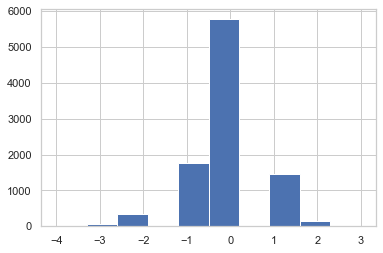

In [584]:
bancos[bancos['PERIODO'].astype(int) > 202007]['VARIAICION_NRO_BANCOS_CIERRE_2019'].hist()

In [585]:
analisis_cliente = analisis_cliente.merge(
    bancos[['COD_UNICO', 'PERIODO', 'VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m',
            'VARIAICION_NRO_BANCOS_CIERRE_2019', 'VARIAICION_NRO_BANCOS_CON_MINIMO_U12M']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 912)

In [586]:
#analisis_cliente[analisis_cliente['PERIODO'] == '202009'].to_excel('seleccion_de_variables.xlsx', index=False)

In [587]:
del deuda_cliente

In [588]:
gc.collect()

66

In [589]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_2.xlsx', index=False)

#### GARANTIAS

In [590]:
query_ga = """
    SELECT * FROM ODS.HD_VMVP_GARANTIAS_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
garantia = pd.read_sql(
  query_ga , connection_market
)
garantia.head(10)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,GAR_PREN_NO_PREFER,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,PERCENT_GAR_AUTO,PERCENT_GAR_HIPO,PERCENT_GAR_PREN_WAR,PERCENT_GAR_NO_PREFER
0,201907,0013655446,16617315.70,1778824.20,0.00,992700.00,3703211.50,10142580.00,0.0,0.00,...,16467915.70,0.222852,0.000000,0.107046,0.610362,0.059738,0.000000,0.000000,0.008990,0.991009
1,202002,0011401535,92213411.59,30880079.56,7725760.00,26596864.16,16660802.19,9164051.53,0.0,16248955.88,...,19709236.24,0.180676,0.083781,0.334876,0.099378,0.288427,0.000000,0.176210,0.499365,0.213735
2,202004,0014463713,90097835.56,21863822.68,20507183.27,0.00,31511866.96,16214962.65,0.0,40172697.55,...,48947680.39,0.349751,0.227610,0.242667,0.179970,0.000000,0.000000,0.445878,0.005223,0.543272
3,201905,0001531250,34279835.47,7844154.68,10723351.50,0.00,6720678.99,8991645.93,0.0,15959976.77,...,18319858.70,0.196053,0.312818,0.228827,0.262301,0.000000,0.000000,0.465579,0.000000,0.534420
4,201911,0002443489,9871666.32,14500.00,0.00,0.00,9322837.62,0.00,14500.0,0.00,...,9602028.32,0.944403,0.000000,0.001468,0.000000,0.000000,0.001468,0.000000,0.025845,0.972685
5,201910,0011756469,2908137.79,1780929.98,0.00,200820.00,118335.00,808052.81,0.0,1621660.96,...,1197554.41,0.040690,0.000000,0.612395,0.277859,0.069054,0.000000,0.557628,0.030577,0.411794
6,201911,0011038158,5113353.88,0.00,0.00,0.00,5113353.88,0.00,0.0,1956826.10,...,3156527.78,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382689,0.000000,0.617310
7,202003,0013465035,2548470.20,171850.00,0.00,0.00,2121034.57,255578.75,0.0,0.00,...,2002853.60,0.832277,0.000000,0.067432,0.100287,0.000000,0.000000,0.000000,0.000000,0.785904
8,202009,0009527724,14292410.89,0.00,0.00,0.00,14292410.89,0.00,0.0,0.00,...,14292410.89,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,201904,0003142478,14083883.70,4578129.76,0.00,2399025.00,4232610.99,2874117.95,0.0,11507388.89,...,2399025.00,0.300528,0.000000,0.325061,0.204071,0.170338,0.000000,0.817060,0.012600,0.170338


### Sumamos un año ya que dbe tomar ultimo rcc desfasado

In [591]:
garantia['PERIODO'] = garantia['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [592]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((38305, 21), (38305,))

<AxesSubplot:>

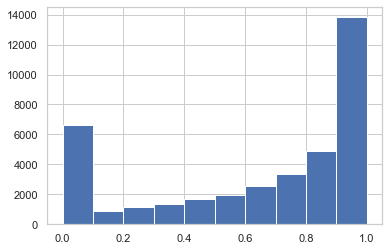

In [593]:
garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia[
    ['PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']].sum(axis=1)

garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].hist()

In [594]:
def get_cat_percent_gar(val):
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre 10% y 20%'
    elif val < 0.3:
        return 'entre 20% y 30%'
    elif val < 0.4:
        return 'entre 30% y 40%'
    elif val < 0.5:
        return 'entre 40% y 50%'
    elif val < 0.5:
        return 'entre 50% y 60%'
    elif val < 0.5:
        return 'entre 60% y 70%'
    elif val < 0.5:
        return 'entre 70% y 80%'
    elif val < 0.5:
        return 'entre 80% y 90%'
    elif val < 0.5:
        return 'entre 90% y 100%'
    else:
        return None
    
garantia['cat_PERCENT_GAR_IBK'] = garantia['PERCENT_GAR_IBK'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_AUTO'] = garantia['PERCENT_GAR_AUTO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_HIPO'] = garantia['PERCENT_GAR_HIPO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_PREN_WAR'] = garantia['PERCENT_GAR_PREN_WAR'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_NO_PREFER'] = garantia['PERCENT_GAR_NO_PREFER'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO']
garantia['cat_PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO_HIPO'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO'] + garantia['PERCENT_GAR_PREN_WAR']
garantia['cat_PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO_HIPO_PREN'].apply(get_cat_percent_gar)

In [595]:
cols_percent = [col for col in garantia.columns if 'PERCENT' in col]
print(cols_percent)

['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN']


In [596]:
GAR_BANCOS = ['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']

In [597]:
garantia[GAR_BANCOS + ['COD_UNICO']].head()

,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,COD_UNICO
0,0.222852,0.000000,0.107046,0.610362,0.059738,0013655446
1,0.180676,0.083781,0.334876,0.099378,0.288427,0011401535
2,0.349751,0.227610,0.242667,0.179970,0.000000,0014463713
3,0.196053,0.312818,0.228827,0.262301,0.000000,0001531250
4,0.944403,0.000000,0.001468,0.000000,0.000000,0002443489


In [598]:
garantia['TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.95]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.9]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.85]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.8]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.75]) > 0, axis=1).astype(int)

garantia['TIENE_MENOS_1PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.01)
garantia['TIENE_MENOS_5PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.05)
garantia['TIENE_MENOS_10PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.10)
garantia['TIENE_MENOS_15PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25)
garantia['TIENE_MENOS_20PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.20)
garantia['TIENE_MENOS_25PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25)

garantia['TIENE_MAYOR_GARTOTAL_EN_IBK'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[0], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BCP'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[1], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BBVA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[2], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_SCOTIA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[3], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BIF'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[4], axis=1).astype(int)

garantia[GAR_BANCOS + ['TIENE_MAYOR_GARTOTAL_EN_BBVA']].head()

,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,TIENE_MAYOR_GARTOTAL_EN_BBVA
0,0.222852,0.000000,0.107046,0.610362,0.059738,0
1,0.180676,0.083781,0.334876,0.099378,0.288427,1
2,0.349751,0.227610,0.242667,0.179970,0.000000,0
3,0.196053,0.312818,0.228827,0.262301,0.000000,0
4,0.944403,0.000000,0.001468,0.000000,0.000000,0


In [599]:
print(cols_percent + [col for col in garantia.columns if 'TIENE' in col])

['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN', 'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MENOS_1PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_5PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_10PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_15PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_20PERCENT_GARTOTAL_IBK

In [600]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    garantia[cols_percent + [col for col in garantia.columns if 'TIENE' in col] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 912)


(11003, 948)

In [601]:
vigente.shape, vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().shape

((115001, 23), (38587,))

In [602]:
agrupado_viegente = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
agrupado_viegente['PERIODO'] = agrupado_viegente['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(agrupado_viegente['PERIODO'].max())
agrupado_viegente.shape

202012


(38587, 3)

In [603]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP', 'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER', 'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN', 'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK

In [604]:
agrupado_viegente = agrupado_viegente.merge(
    garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'PERCENT_GAR_NO_PREFER'] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER
0,201905,0000002469,10479017.70,0.0,23933642.25,0.00,0.000000
1,201905,0000003392,9896927.22,0.0,3197756.18,2114611.63,0.690877
2,201905,0000006114,508461.61,0.0,0.00,0.00,0.000816
3,201905,0000008318,332700.10,0.0,7200321.39,78244.45,0.231389
4,201905,0000037374,13496488.96,0.0,2969055.44,0.00,0.889369


In [605]:
agrupado_viegente['NO_TIENE_GAR_AUTO_SF'] = agrupado_viegente['GAR_AUTO_TOT'].apply(lambda _: _== 0).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT']].apply(lambda _: _[0] == 0 and _[1] == 0, axis=1).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_PREN_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT']].apply(
    lambda _: _[0] == 0 and _[1] == 0 and _[2] == 0, axis=1).astype(int)

In [606]:
agrupado_viegente['GAR_AUTO_HIPO_PREN'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] 
agrupado_viegente['GAR_AUTO_HIPO'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']
agrupado_viegente['GAR_AUTO_HIPO_PREN_NOPREFER'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] + agrupado_viegente['PERCENT_GAR_NO_PREFER'] 

agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,NO_TIENE_GAR_AUTO_SF,NO_TIENE_GAR_AUTO_HIPO_SF,NO_TIENE_GAR_AUTO_HIPO_PREN_SF,GAR_AUTO_HIPO_PREN,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER
0,201905,0000002469,10479017.70,0.0,23933642.25,0.00,0.000000,1,0,0,23933642.25,23933642.25,2.393364e+07
1,201905,0000003392,9896927.22,0.0,3197756.18,2114611.63,0.690877,1,0,0,5312367.81,3197756.18,5.312369e+06
2,201905,0000006114,508461.61,0.0,0.00,0.00,0.000816,1,1,1,0.00,0.00,8.160000e-04
3,201905,0000008318,332700.10,0.0,7200321.39,78244.45,0.231389,1,0,0,7278565.84,7200321.39,7.278566e+06
4,201905,0000037374,13496488.96,0.0,2969055.44,0.00,0.889369,1,0,0,2969055.44,2969055.44,2.969056e+06


In [607]:
agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_TOT', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN_NOPREFER', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [608]:
def get_cat_cover(val):
    if pd.isnull(val):
        return None
    
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre10 y 20%%'
    elif val < 0.4:
        return 'entre10 y 20%%'
    elif val < 0.6:
        return 'entre10 y 20%%'
    elif val < 0.8:
        return 'entre10 y 20%%'
    elif val < 1:
        return 'entre10 y 20%%'
    elif val < 1.2:
        return 'sobre cubierto en 20%'
    elif val < 1.4:
        return 'sobre cubierto de 20% a 40%'
    elif val <= 1.6:
        return 'sobre cubierto de 40% a 60%'
    else:
        return 'sobre cubierto a mas del 60%'
    
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'].apply(get_cat_cover)

<AxesSubplot:>

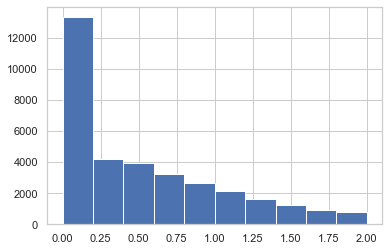

In [609]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].hist()

<AxesSubplot:>

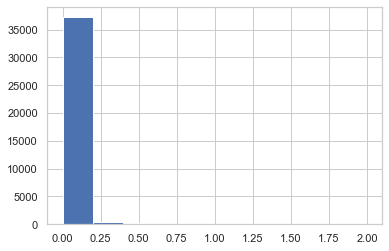

In [610]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] < 2]['COVER_GAR_AUTO_ULT_RCC'].hist()

<AxesSubplot:>

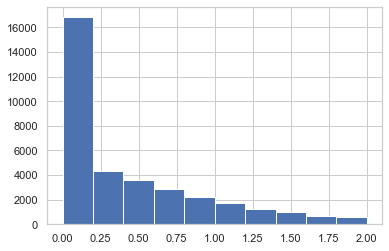

In [611]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_ULT_RCC'].hist()

In [612]:
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,NO_TIENE_GAR_AUTO_SF,NO_TIENE_GAR_AUTO_HIPO_SF,NO_TIENE_GAR_AUTO_HIPO_PREN_SF,...,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER,COVER_GAR_AUTO_ULT_RCC,COVER_GAR_AUTO_HIPO_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_ULT_RCC,cat_COVER_GAR_AUTO_ULT_RCC
0,201905,0000002469,10479017.70,0.0,23933642.25,0.00,0.000000,1,0,0,...,23933642.25,2.393364e+07,0.0,2.283959,2.283959,2.283959e+00,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
1,201905,0000003392,9896927.22,0.0,3197756.18,2114611.63,0.690877,1,0,0,...,3197756.18,5.312369e+06,0.0,0.323106,0.536769,5.367695e-01,entre10 y 20%%,entre10 y 20%%,entre10 y 20%%,menos del 10%
2,201905,0000006114,508461.61,0.0,0.00,0.00,0.000816,1,1,1,...,0.00,8.160000e-04,0.0,0.000000,0.000000,1.604841e-09,menos del 10%,menos del 10%,menos del 10%,menos del 10%
3,201905,0000008318,332700.10,0.0,7200321.39,78244.45,0.231389,1,0,0,...,7200321.39,7.278566e+06,0.0,21.642078,21.877258,2.187726e+01,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
4,201905,0000037374,13496488.96,0.0,2969055.44,0.00,0.889369,1,0,0,...,2969055.44,2.969056e+06,0.0,0.219987,0.219987,2.199873e-01,entre10 y 20%%,entre10 y 20%%,entre10 y 20%%,menos del 10%


In [613]:
agrupado_viegente['PERIODO'].max()

'202012'

In [614]:
print(analisis_cliente.shape)  		
analisis_cliente = analisis_cliente.merge(
    agrupado_viegente[['PERIODO', 'COD_UNICO', 'COVER_GAR_AUTO_ULT_RCC', 'COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 
                       'COVER_GAR_AUTO_HIPO_ULT_RCC', 'cat_COVER_GAR_AUTO_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_ULT_RCC',
                       'cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC', 'NO_TIENE_GAR_AUTO_SF',
                       'NO_TIENE_GAR_AUTO_HIPO_SF', 'NO_TIENE_GAR_AUTO_HIPO_PREN_SF'
                      ]], 
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(11003, 948)


(11003, 958)

#### VARAACION DE GARANTIA

In [615]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((38305, 48), (38305,))

In [616]:
garantia.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,TIENE_MENOS_5PERCENT_GARTOTAL_IBK,TIENE_MENOS_10PERCENT_GARTOTAL_IBK,TIENE_MENOS_15PERCENT_GARTOTAL_IBK,TIENE_MENOS_20PERCENT_GARTOTAL_IBK,TIENE_MENOS_25PERCENT_GARTOTAL_IBK,TIENE_MAYOR_GARTOTAL_EN_IBK,TIENE_MAYOR_GARTOTAL_EN_BCP,TIENE_MAYOR_GARTOTAL_EN_BBVA,TIENE_MAYOR_GARTOTAL_EN_SCOTIA,TIENE_MAYOR_GARTOTAL_EN_BIF
35787,201905,0000002469,23933642.25,0.0,19531495.19,0.0,4402147.06,0.0,0.0,23933642.25,...,False,False,True,True,True,0,1,0,0,0
32463,201906,0000002469,24759470.84,0.0,19885647.42,0.0,4873823.42,0.0,0.0,24759470.84,...,False,False,True,True,True,0,1,0,0,0


In [617]:
print(garantia.columns)

Index(['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP',
       'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT',
       'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER',
       'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA',
       'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO',
       'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER',
       'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK',
       'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO',
       'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER',
       'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
       'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN',
       'cat_PERCENT_GAR_AUTO_HIPO_PREN',
       'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS

In [618]:
garantia =garantia[[col for col in garantia.columns if 'cat' not in col]]
garantia.dtypes

PERIODO                                                        object
COD_UNICO                                                      object
GAR_TOT                                                       float64
GAR_TOT_BBVA                                                  float64
GAR_TOT_BCP                                                   float64
GAR_TOT_BIF                                                   float64
GAR_TOT_IBK                                                   float64
GAR_TOT_SCOTIA                                                float64
GAR_AUTO_TOT                                                  float64
GAR_HIPO_TOT                                                  float64
GAR_PREN_WAR_TOT                                              float64
GAR_PREN_NO_PREFER                                            float64
PERCENT_GAR_IBK                                               float64
PERCENT_GAR_BCP                                               float64
PERCENT_GAR_BBVA    

In [619]:
dicc_kpi = {
    'PERCENT_GAR_IBK': ['min', 'max'],
    'PERCENT_GAR_OTROS_BANCOS_PRIN':['min', 'max'],
    'PERCENT_GAR_AUTO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO_PREN':['min', 'max'],
}
columns_base = [
    'minimo_percent_ibk', 'maximo_percent_ibk',
    'minimo_percent_others', 'maximo_percent_others',
    'minimo_percent_auto', 'maximo_percent_auto',
    'minimo_percent_auto_hipo', 'maximo_percent_auto_hipo',
    'minimo_percent_auto_hipo_pren', 'maximo_auto_hipo_percent_pren',
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = garantia[garantia['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_gar = u6m
    else:
        var_pecent_gar = pd.concat(
            [var_pecent_gar, u6m], axis=0
        )
    
    print(var_pecent_gar.shape)
    contador += 1

202012 [202001, 202002]
(1997, 12)
202011 [201912, 202001]
(3988, 12)
202010 [201911, 201912]
(5976, 12)
202009 [201910, 201911]
(7962, 12)
202008 [201909, 201910]
(9945, 12)
202007 [201908, 201909]
(11925, 12)


In [620]:
garantia = garantia[
    ['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
     'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO'
    ]].merge(
    var_pecent_gar, how='left', on=['PERIODO', 'COD_UNICO']
)
garantia.head(30)

,PERIODO,COD_UNICO,PERCENT_GAR_IBK,PERCENT_GAR_OTROS_BANCOS_PRIN,PERCENT_GAR_AUTO_HIPO,PERCENT_GAR_AUTO_HIPO_PREN,PERCENT_GAR_AUTO,minimo_percent_ibk_u12m,maximo_percent_ibk_u12m,minimo_percent_others_u12m,maximo_percent_others_u12m,minimo_percent_auto_u12m,maximo_percent_auto_u12m,minimo_percent_auto_hipo_u12m,maximo_percent_auto_hipo_u12m,minimo_percent_auto_hipo_pren_u12m,maximo_auto_hipo_percent_pren_u12m
0,201908,0013655446,0.222852,0.777146,0.000000,0.008990,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202003,0011401535,0.180676,0.806462,0.176210,0.675575,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202005,0014463713,0.349751,0.650247,0.445878,0.451101,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201906,0001531250,0.196053,0.803946,0.465579,0.465579,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201912,0002443489,0.944403,0.001468,0.001468,0.027313,0.001468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201911,0011756469,0.040690,0.959308,0.557628,0.588205,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,201912,0011038158,1.000000,0.000000,0.382689,0.382689,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,202004,0013465035,0.832277,0.167719,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,202010,0009527724,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,201905,0003142478,0.300528,0.699470,0.817060,0.829660,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [621]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m', 'minimo_percent_auto_u12m', 'maximo_percent_auto_u12m', 'minimo_percent_auto_hipo_u12m', 'maximo_percent_auto_hipo_u12m', 'minimo_percent_auto_hipo_pren_u12m', 'maximo_auto_hipo_percent_pren_u12m']


In [622]:
for col in [_ for _ in garantia.columns if 'u12m' in _]:
    garantia[col] =  garantia[col].fillna(0)


garantia['VARIACION_PERCENT_GAR_IBK_U12M'] = garantia[
    ['PERCENT_GAR_IBK', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
garantia['VARIACION_PERCENT_GAR_OTROS_BANCOS_PRIN_U12M'] = garantia[
    ['PERCENT_GAR_OTROS_BANCOS_PRIN', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((38305, 19), (38305,))

In [623]:
garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((38305, 19), (38305,), (11003, 958), (11003,))

In [624]:
print(analisis_cliente.shape)
del var_pecent_gar
analisis_cliente = analisis_cliente.merge(
    garantia[[col for col in garantia.columns if 'VARIACION' in col.upper() or 'u12m' in col.lower()] + ['PERIODO', 'COD_UNICO']],
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

(11003, 958)


((11003, 970), (11003,))

In [625]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

#### VARACION SOW

In [626]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39722, 17), (39722,))

In [627]:
sow.head()

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0012579135,202001,14823835.27,1104491.60,10946455.27,3877380.00,1657000.00,3987608.92,6570235.88,0.00,0.074507,0.111779,0.268999,0.443221,0.000000,0.824000,0.738436
1,0009028120,202002,673382.64,214405.65,673382.64,0.00,370499.11,88477.88,0.00,0.00,0.318400,0.550205,0.131393,0.000000,0.000000,0.681599,1.000000
2,0009362978,202005,3883925.59,0.00,3441050.24,442875.35,2070043.10,459560.59,0.00,1354321.90,0.000000,0.532977,0.118323,0.000000,0.348699,1.000000,0.885972
3,0012172494,202005,284940.38,284940.38,284940.38,0.00,0.00,0.00,0.00,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0011652451,202009,41400693.23,867434.72,34711468.55,6689224.68,8095590.69,13552324.75,4699289.86,11984741.08,0.020952,0.195542,0.327345,0.113507,0.289481,0.925876,0.838427


In [628]:
dicc_kpi = {
    'SOW_IBK': ['min', 'max'],
    'SOW_OTROSBCOS':['min', 'max'],
    'PERCENT_COL_DIRECTAS_SF':['min', 'max']
}
columns_base = [
    'minimo_percent_sow_ibk', 'maximo_percent_sow_ibk',
    'minimo_percent_sow_others', 'maximo_percent_sow_others',
    'minimo_percent_col_direct', 'maximo_percent_col_direct'
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = sow[sow['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_sow = u6m
    else:
        var_pecent_sow = pd.concat(
            [var_pecent_sow, u6m], axis=0
        )
    
    print(var_pecent_sow.shape)
    contador += 1

202012 [202001, 202002]
(2065, 8)
202011 [201912, 202001]
(4127, 8)
202010 [201911, 201912]
(6188, 8)
202009 [201910, 201911]
(8246, 8)
202008 [201909, 201910]
(10301, 8)
202007 [201908, 201909]
(12352, 8)


In [629]:
var_pecent_sow.head()

,COD_UNICO,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m,PERIODO
0,0000002469,0.000000,0.184282,0.472807,0.880775,0.830938,0.925608,202012
1,0000003392,0.076237,0.180776,0.784120,0.895014,0.996026,1.000000,202012
2,0000006114,0.636633,0.859024,0.000000,0.000000,0.465432,0.792603,202012
3,0000008318,0.079957,0.565049,0.434950,0.920042,0.019354,0.540509,202012
4,0000037374,0.000000,0.000000,1.000000,1.000000,0.963029,1.000000,202012


In [630]:
sow = sow[
    ['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF'
    ]].merge(
    var_pecent_sow, how='left', on=['PERIODO', 'COD_UNICO']
)
sow.head(30)

,PERIODO,COD_UNICO,SOW_IBK,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m
0,202001,0012579135,0.074507,0.824000,0.738436,NaN,NaN,NaN,NaN,NaN,NaN
1,202002,0009028120,0.318400,0.681599,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,202005,0009362978,0.000000,1.000000,0.885972,NaN,NaN,NaN,NaN,NaN,NaN
3,202005,0012172494,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,202009,0011652451,0.020952,0.925876,0.838427,0.020952,0.095677,0.895260,0.956579,0.816160,0.916799
5,202008,0001303627,0.465982,0.534017,1.000000,0.451714,0.465982,0.534017,0.548285,1.000000,1.000000
6,202009,0011003105,0.259456,0.740543,0.971819,0.259456,0.407204,0.592795,0.740543,0.970514,0.975616
7,202010,0011858467,0.943178,0.056821,0.943178,0.000000,0.943305,0.056694,1.000000,0.000000,0.943305
8,202012,0013707579,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
9,202011,0013812756,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [631]:
print(list(sow.columns))

['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']


In [632]:
for col in [_ for _ in sow.columns if 'u12m' in _]:
    sow[col] =  sow[col].fillna(0)


sow['VARIACION_SOW_IBK_U12M'] = sow[
    ['SOW_IBK', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_SOW_OTROS_BANCOS_PRIN_U12M'] = sow[
    ['SOW_OTROSBCOS', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_PERCENT_COL_DRECTAS_U12M'] = sow[
    ['PERCENT_COL_DIRECTAS_SF', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39722, 14), (39722,))

In [633]:
analisis_cliente = analisis_cliente.merge(
    sow[[col for col in sow.columns if 'VARIACION' in col.upper() or 'u12m' in col] + ['COD_UNICO', 'PERIODO']], 
    how='left', on=['COD_UNICO', 'PERIODO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((11003, 979), (11003,))

### COVID

In [634]:
query_covid = """
    SELECT * FROM STG.T_WEBVPC_COVID19 WITH (NOLOCK)
    ORDER BY FECHA_CREACION DESC
"""
covid = pd.read_sql(
   query_covid , connection_market
)
covid.head(2)

,ID,ID_VISITA,COD_UNICO,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,FECHA_CREACION,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP
0,948,1187,0015283043,2020-12-31,1,1,2,2,NaN,La empresa trabaja mediante proyectos con Petr...,...,2020-12-31,None,NaT,NaN,None,NaT,None,None,B6674,None
1,949,1188,0012560898,2020-12-30,1,1,2,2,NaN,Se aplicó al progrema Reactiva y en el mes de ...,...,2020-12-31,None,NaT,NaN,None,NaT,None,None,B30533,None


In [635]:
#%%time

#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    covid.to_sql(
#        name='HD_FICHA_COVD_ALERTA_CARTERA_BE_V3',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [636]:
covid.shape, covid['COD_UNICO'].unique().shape

((905, 71), (874,))

In [637]:
aa = covid.groupby(by=['COD_UNICO']).size()
aa[aa > 1]

COD_UNICO
0006199905    6
0007580624    2
0008722787    2
0008923944    4
0009816033    4
0010540853    2
0010833603    5
0010847030    2
0011715944    2
0011869439    2
0011872923    2
0011874942    2
0013238792    3
0013240835    3
0013280799    2
0015522181    2
0015769787    2
0016390037    2
dtype: int64

In [638]:
covid[covid['COD_UNICO'] == '0006199905']

,ID,ID_VISITA,COD_UNICO,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,FECHA_CREACION,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP
317,615,847,0006199905,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-09-09,B30533,2020-09-09,NaN,None,2020-09-09,None,None,B30533,None
367,549,781,0006199905,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-08-31,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None
372,551,783,0006199905,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-08-31,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None
384,550,782,0006199905,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-08-31,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None
489,425,657,0006199905,2020-08-22,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-08-26,B30533,2020-08-26,NaN,None,2020-08-26,None,None,B30533,None
587,356,588,0006199905,2020-08-21,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,2020-08-24,B30533,2020-08-25,NaN,None,2020-08-25,None,None,B30533,None


In [639]:
print("ANTES con duplicados: ", covid.shape[0])
covid = covid.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros únicos por codigo único: ", covid.shape[0])

ANTES con duplicados:  905
Regsistros únicos por codigo único:  874


In [640]:
#covid['PREGUNTA_5_1'].value_counts(dropna=False)
covid.columns

Index(['ID', 'ID_VISITA', 'COD_UNICO', 'FECHA_REGISTRO', 'PREGUNTA_1',
       'PREGUNTA_2_1', 'PREGUNTA_2_2', 'PREGUNTA_2_3_1', 'PREGUNTA_2_3_2',
       'PREGUNTA_3', 'PREGUNTA_4', 'PREGUNTA_5_1', 'PREGUNTA_5_2',
       'PREGUNTA_6_1', 'PREGUNTA_6_2', 'PREGUNTA_7', 'PREGUNTA_7_1',
       'PREGUNTA_7_2_1', 'PREGUNTA_7_2_2', 'PREGUNTA_7_3', 'PREGUNTA_7_4',
       'PREGUNTA_8_1', 'PREGUNTA_8_1_1_1', 'PREGUNTA_8_1_1_2',
       'PREGUNTA_8_1_2', 'PREGUNTA_8_2', 'PREGUNTA_8_3', 'PREGUNTA_8_3_2',
       'PREGUNTA_8_3_1', 'PREGUNTA_9_1', 'PREGUNTA_9_2', 'PREGUNTA_10_1',
       'PREGUNTA_10_2', 'PREGUNTA_11', 'PREGUNTA_11_1_1', 'PREGUNTA_11_1_2',
       'PREGUNTA_11_2_1', 'PREGUNTA_11_2_2', 'PREGUNTA_11_3_1',
       'PREGUNTA_11_3_2', 'PREGUNTA_11_4_1', 'PREGUNTA_11_4_2',
       'PREGUNTA_11_5_1', 'PREGUNTA_11_5_2', 'PREGUNTA_11_6_1',
       'PREGUNTA_11_6_2', 'PREGUNTA_12', 'PREGUNTA_12_1', 'PREGUNTA_12_2',
       'PREGUNTA_12_2_1', 'PREGUNTA_12_2_2_1', 'PREGUNTA_12_2_2_2',
       'PREGUNTA_13

<AxesSubplot:>

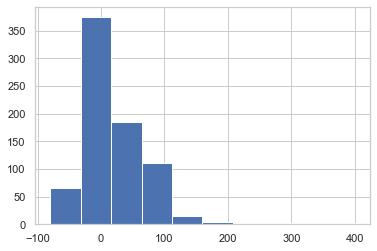

In [641]:
covid['PREGUNTA_5_1'].hist()

['ID', 'ID_VISITA', 'COD_UNICO', 'FECHA_REGISTRO', 'COVID_P_1', 'COVID_P_2_1', 'COVID_P_2_2', 'COVID_P_2_3_1', 'COVID_P_2_3_2', 'COVID_P_3', 'COVID_P_4', 'COVID_P_5_1', 'COVID_P_5_2', 'COVID_P_6_1', 'COVID_P_6_2', 'COVID_P_7', 'COVID_P_7_1', 'COVID_P_7_2_1', 'COVID_P_7_2_2', 'COVID_P_7_3', 'COVID_P_7_4', 'COVID_P_8_1', 'COVID_P_8_1_1_1', 'COVID_P_8_1_1_2', 'COVID_P_8_1_2', 'COVID_P_8_2', 'COVID_P_8_3', 'COVID_P_8_3_2', 'COVID_P_8_3_1', 'COVID_P_9_1', 'COVID_P_9_2', 'COVID_P_10_1', 'COVID_P_10_2', 'COVID_P_11', 'COVID_P_11_1_1', 'COVID_P_11_1_2', 'COVID_P_11_2_1', 'COVID_P_11_2_2', 'COVID_P_11_3_1', 'COVID_P_11_3_2', 'COVID_P_11_4_1', 'COVID_P_11_4_2', 'COVID_P_11_5_1', 'COVID_P_11_5_2', 'COVID_P_11_6_1', 'COVID_P_11_6_2', 'COVID_P_12', 'COVID_P_12_1', 'COVID_P_12_2', 'COVID_P_12_2_1', 'COVID_P_12_2_2_1', 'COVID_P_12_2_2_2', 'COVID_P_13', 'COVID_P_14_1', 'COVID_P_14_2', 'COVID_P_14_3', 'COVID_P_14_4', 'COVID_P_14_5', 'ESTADO_APROBACION', 'ESTADO_REGISTRO', 'USUARIO_CREACION', 'FECHA_CRE

<AxesSubplot:>

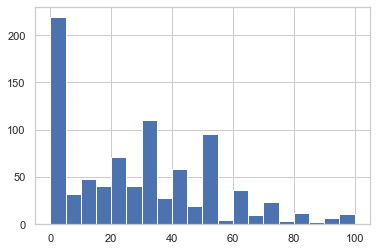

In [642]:
def parser_si_no(val):
    if pd.isnull(val):
        return None
    return 'SI' if str(val).strip() == '1' else 'NO'

covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'] = covid['PREGUNTA_5_1'].copy()

covid.columns = [col.replace('PREGUNTA', 'COVID_P') for col in covid.columns]
print(list(covid.columns))


covid['COVID_P_1'] = covid['COVID_P_1'].apply(parser_si_no)
covid['COVID_P_1'].value_counts(dropna=False)


covid['IMPACTO_COVID_FICHA'] = covid['COVID_P_13'].copy()
covid['COVID_P_1_TE_AFECTO_COVID'] = covid['COVID_P_1'].copy()
del covid['COVID_P_13']
del covid['COVID_P_1']


covid['COVID_ESTRATEGIA'] = covid['COVID_P_14_1'].copy()
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].fillna('Sin categoria')
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].apply(lambda _: _.strip().upper())
#covid['COVID_ESTRATEGIA'].value_counts(dropna=False) # ESTRATEGIA


covid['COVID_FEVE'] = covid['COVID_P_14_2'].copy()
covid['COVID_FEVE'] = covid['COVID_FEVE'].fillna('Sin categoria')
covid['COVID_FEVE'] = covid['COVID_FEVE'].apply(lambda _: _.strip().upper())
#covid['COVID_FEVE'].value_counts(dropna=False) # FEVE

covid['COVID_ACOGIO_SUSPENSION_PERFECTA'] = covid['COVID_P_2_2'].apply(lambda _: 'SI' if str(_).strip() in ('1', '1.0') else 'NO')
#covid['COVID_ACOGIO_SUSPENSION_PERFECTA'].value_counts(dropna=False)

covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_P_2_3_2'].copy()
covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].fillna(0.0)
#del covid['COVID_P_2_3_2']
#covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].hist(bins=20)

covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'] = covid['COVID_P_4'].fillna(0.0)
#del covid['COVID_P_4']
covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'].hist(bins=20)

<AxesSubplot:>

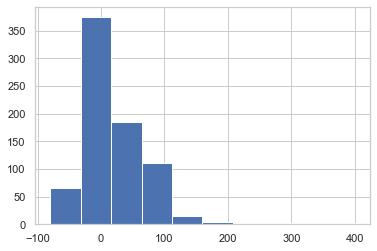

In [643]:
covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'].hist()

In [644]:
'COVID_P_12', 'COVID_P_12_1'

('COVID_P_12', 'COVID_P_12_1')

In [645]:
covid['COVID_P_12'].value_counts()

2    659
1    215
Name: COVID_P_12, dtype: int64

In [646]:
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'] = covid['COVID_P_12'].apply(lambda _: 1 if _ == 1 else 0)
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'].value_counts()                                                       

0    659
1    215
Name: COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES, dtype: int64

In [647]:
covid['COVID_P_12_1'] = covid['COVID_P_12_1'].fillna(0)
covid['COVID_12_DE_CUNATA_INVERSION_SE_TRATA'] = covid['COVID_P_12_1'].copy()

In [648]:
covid.head(3)

,ID,ID_VISITA,COD_UNICO,FECHA_REGISTRO,COVID_P_2_1,COVID_P_2_2,COVID_P_2_3_1,COVID_P_2_3_2,COVID_P_3,COVID_P_4,...,COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019,IMPACTO_COVID_FICHA,COVID_P_1_TE_AFECTO_COVID,COVID_ESTRATEGIA,COVID_FEVE,COVID_ACOGIO_SUSPENSION_PERFECTA,COVID_PORCENTAJE_REDUCCION_PERSONAL,COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL,COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES,COVID_12_DE_CUNATA_INVERSION_SE_TRATA
0,948,1187,0015283043,2020-12-31,1,2,2,NaN,La empresa trabaja mediante proyectos con Petr...,45.0,...,45.0,medio,SI,MANTENER,SIN CATEGORIA,NO,0.0,45.0,0,0.0
1,949,1188,0012560898,2020-12-30,1,2,2,NaN,Se aplicó al progrema Reactiva y en el mes de ...,0.0,...,5.0,bajo,SI,MANTENER,SIN FEVE,NO,0.0,0.0,0,0.0
2,942,1181,0017120137,2020-12-30,1,2,2,NaN,Se aplico únicamente a Reactiva a fin de honra...,0.0,...,286.0,sin impacto,NO,MANTENER,SIN FEVE,NO,0.0,0.0,1,180.0


In [649]:
covid.shape, covid['COD_UNICO'].unique().shape

((874, 79), (874,))

In [650]:
covid['PERIODO'] = '202009'
covid_202009 = covid.copy()

In [651]:
covid['PERIODO'] = '202008'
covid_202008 = covid.copy()

In [652]:
covid = pd.concat(
    [covid_202009, covid_202008], axis=0
)

In [653]:
covid['PERIODO'].value_counts()

202008    874
202009    874
Name: PERIODO, dtype: int64

In [654]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    covid[
    ['PERIODO', 'COD_UNICO','COVID_P_1_TE_AFECTO_COVID', 'COVID_ACOGIO_SUSPENSION_PERFECTA', 
     'COVID_PORCENTAJE_REDUCCION_PERSONAL','COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL', 'IMPACTO_COVID_FICHA',
     'COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019', 'COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES', 'COVID_12_DE_CUNATA_INVERSION_SE_TRATA']],
    how='left',
    on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(11003, 979)
(11003, 987)


### ADEX

In [655]:
query_adex = """
    SELECT * FROM ODS.HD_VMVP_ADEX_CARTERA_BE
"""
adex = pd.read_sql(
   query_adex , connection_market
)
adex.head(2)

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0011289053,201512.0,20517933318,VIVEROS GENESIS SAC,1.378,IMP,EUROPA,VARIOS,2020-02-18 14:25:00,VIVEROS GENESIS
1,0013727694,201512.0,20523442041,ANDES TECHNOLOGY SOCIEDAD ANONIMA CERRADA,1335.965,IMP,EUROPA,QUIMICO,2020-02-18 14:25:00,ANDES TECHNOLOGY


In [656]:
adex['PERIODO'].max()

202011.0

In [657]:
adex['PERIODO'] = adex['PERIODO'].astype(str).apply(lambda _: _.split('.')[0])
adex['PERIODO'] = adex['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=2)).strftime('%Y%m')
)
adex.head()

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0011289053,201602,20517933318,VIVEROS GENESIS SAC,1.378,IMP,EUROPA,VARIOS,2020-02-18 14:25:00,VIVEROS GENESIS
1,0013727694,201602,20523442041,ANDES TECHNOLOGY SOCIEDAD ANONIMA CERRADA,1335.965,IMP,EUROPA,QUIMICO,2020-02-18 14:25:00,ANDES TECHNOLOGY
2,0014156783,201602,20453946038,GREENLAND PERU S.A.C.,23712.000,EXP,AMERICA DEL SUR,AGROPECUARIO Y AGROINDUSTRIAS,2020-02-18 14:25:00,GREENLAND PERU
3,0014156783,201602,20453946038,GREENLAND PERU S.A.C.,1120047.000,EXP,AMERICA DEL NORTE,AGROPECUARIO Y AGROINDUSTRIAS,2020-02-18 14:25:00,GREENLAND PERU
4,0015231224,201602,20453964010,CORIAL INCORPORATED SUCURSAL EN EL PERU,63552.941,IMP,EUROPA,METAL - MECANICO,2020-02-18 14:25:00,CORIAL INCORPORATED SUCURSAL EN EL PERU


In [658]:
adex['TIPO'].value_counts(dropna=False)

IMP    194794
EXP     45730
Name: TIPO, dtype: int64

In [659]:
adex['SECTOR'].value_counts(dropna=False)

QUIMICO                          60508
METAL - MECANICO                 54368
VARIOS                           34824
AGROPECUARIO Y AGROINDUSTRIAS    23850
SIDERURGICO Y METALURGICO        22509
MINERIA NO METALICA              12394
TEXTIL                           11953
PRENDAS DE VESTIR                 6151
MADERAS                           3973
PESCA                             3870
PETROLEO Y GAS NATURAL            2651
AGRO TRADICIONAL                  1706
MINERIA TRADICIONAL               1279
PESCA TRADICIONAL                  488
Name: SECTOR, dtype: int64

In [660]:
adex['CONTINENTE'].value_counts(dropna=False)

ASIA                 76442
EUROPA               54465
AMERICA DEL NORTE    53393
AMERICA DEL SUR      44554
AMERICA CENTRAL       6462
OCEANIA               2748
AFRICA                2460
Name: CONTINENTE, dtype: int64

### PIVOTEO POR IMPORTACIONES

In [661]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['SECTOR', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AGRO_TRADICIONAL_EXP_PERCENT,ADEX_AGRO_TRADICIONAL_IMP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_EXP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_IMP_PERCENT,ADEX_MADERAS_EXP_PERCENT,ADEX_MADERAS_IMP_PERCENT,ADEX_METAL_-_MECANICO_EXP_PERCENT,ADEX_METAL_-_MECANICO_IMP_PERCENT,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,0,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.969500,...,0,0,0,0,0,0,0,1,0,0


In [662]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1043)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [663]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['CONTINENTE', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AFRICA_EXP_PERCENT,ADEX_AFRICA_IMP_PERCENT,ADEX_AMERICA_CENTRAL_EXP_PERCENT,ADEX_AMERICA_CENTRAL_IMP_PERCENT,ADEX_AMERICA_DEL_NORTE_EXP_PERCENT,ADEX_AMERICA_DEL_NORTE_IMP_PERCENT,ADEX_AMERICA_DEL_SUR_EXP_PERCENT,ADEX_AMERICA_DEL_SUR_IMP_PERCENT,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,1,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,1,0,0


In [664]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1071)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### PIVOTEO IMP EXP

In [665]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
)
#pivoteo_grupo = pivoteo.reset_index()
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]


for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.tail(3)

,COD_UNICO,PERIODO,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
55180,0017239443,202011,0.0,1.0,0,1
55181,0017239443,202012,0.0,1.0,0,1
55182,0017239443,202101,0.0,1.0,0,1


In [666]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1075)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [667]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO'], columns=['TIPO', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['TIPO', 'PERIODO', 'COD_UNICO', 'VALOR']


pivoteo_grupo = pd.pivot_table(
    pivoteo, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
).reset_index()
pivoteo_grupo.head()

TIPO,COD_UNICO,PERIODO,EXP,IMP
0,0000002469,201503,0.0,0.000
1,0000002469,201504,0.0,50604.826
2,0000002469,201505,0.0,432722.260
3,0000002469,201506,0.0,20405.910
4,0000002469,201507,0.0,0.000


In [668]:
pivoteo_grupo.columns

Index(['COD_UNICO', 'PERIODO', 'EXP', 'IMP'], dtype='object', name='TIPO')

In [669]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1340, 4)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2680, 4)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4020, 4)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5360, 4)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6700, 4)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8040, 4)


In [670]:
acum_3.head()

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[50220.55, 78514.07, 204309.56]","[0.0, 4708.235000000001, 19581.521]",202007
1,0000003392,"[1565642.99, 954979.0399999999, 446373.96]","[29740.722, 92888.8, 1421132.1030000001]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[43566.24, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[40724.051999999996, 113742.829, 376614.515]",202007


In [671]:
for col in ['EXP', 'IMP']:
    acum_3['ADEX_CAIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)
    ).astype(int)
    acum_3['ADEX_CAIDA_20PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['ADEX_CAIDA_30PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['ADEX_CAIDA_40PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.6
    ).astype(int)
    acum_3['ADEX_CAIDA_50PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.5
    ).astype(int)
    acum_3['ADEX_SUBIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] > _[1]).astype(int)
    acum_3['ADEX_MENOR_U3M_' +col] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['ADEX_MAYOR_U3M_' + col] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['ADEX_NO__ESTE_MES_' + col] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['ADEX_NO__U2M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['ADEX_NO__U3M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    del acum_3[col]

In [672]:
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1075)
(11003, 1097)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_CAIDA_20PERCENT_MES_ANT_IMP,ADEX_CAIDA_30PERCENT_MES_ANT_IMP,ADEX_CAIDA_40PERCENT_MES_ANT_IMP,ADEX_CAIDA_50PERCENT_MES_ANT_IMP,ADEX_SUBIDA_SEGUIDA_U3M_IMP,ADEX_MENOR_U3M_IMP,ADEX_MAYOR_U3M_IMP,ADEX_NO__ESTE_MES_IMP,ADEX_NO__U2M_IMP,ADEX_NO__U3M_IMP
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [673]:
analisis_cliente.shape

(11003, 1097)

In [674]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

## CEF

In [675]:
query_cef = """
    SELECT * FROM ODS.HD_VMVP_CEF_INDICADORES_ALERTAS_CARTERA_BE
"""
cef = pd.read_sql(
   query_cef , connection_market
)
cef.head(2)

,ORDEN_CEF,ANIO,COD_UNICO,RAZON_SOCIAL,ORDEN,ORDEN_ANUAL,FECHA_CEF,DESTIPESTADOFINANCIERO,DESESTADO,MONEDA,...,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR_VAR_DIAS,ROTACION_INVENTARIOS_VAR_DIAS,ROTACION_CTASXCOBRAR_VAR,ROTACION_CTASXPAGAR_VAR,ROTACION_INVENTARIOS_VAR,DTOTAL_S_EBITDA_VAR,DTOTAL_S_VENTAS_VAR,DTOTALCAJA_S_EBITDA_VAR,EBITDA_S_SERVDEUDA_VAR
0,1,2020,0000002469,INDUSTRIAS DEL PAPEL,1,4,2020-09-30,SITUACION,VALIDADO,1,...,11.399467,-6.177180,1.621677,0.124544,-0.139340,0.025256,6.161873,0.435836,0.848297,-0.445191
1,1,2020,0000003392,Corporacion de Ingenieria de Refrigeracion SRL,1,4,2020-09-30,SITUACION,PENDIENTE,1,...,22.881686,14.841342,39.778080,0.882740,0.996701,0.670012,2.824827,1.192275,0.978003,-0.526504


In [676]:
cef.shape, cef['COD_UNICO'].unique().shape

((1688, 65), (1688,))

In [677]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [678]:

#(datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days

<AxesSubplot:>

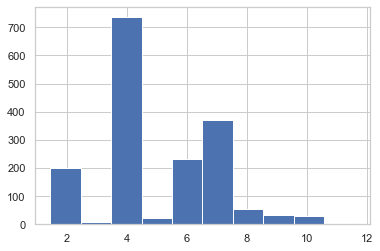

In [679]:
cef['FECHA_CEF'] = pd.to_datetime(
    cef['FECHA_CEF'], errors='coerce', format='%Y-%m-%d'
)
cef['DESFASE_CEF_MESES'] = apply_diff_mont(datetime.now() - cef['FECHA_CEF']) / 30
cef['DESFASE_CEF_MESES'].hist()

In [680]:
for col in list(cef.iloc[:2, 12:].columns):
    cef['CEF_' + col] = cef[col].copy()
    del cef[col]

In [681]:
cef = cef[['COD_UNICO'] + list(cef.iloc[:2, 12:].columns)]
cef.shape

(1688, 55)

In [682]:
cef.shape, cef.groupby(by=['COD_UNICO']).size().shape

((1688, 55), (1688,))

In [683]:
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((11003, 1097), (11003,))

In [684]:
analisis_cliente = analisis_cliente.merge(
    cef, how='left', on=['COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((11003, 1151), (11003,))

In [685]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_final.xlsx', index=False)

In [686]:
print(len(analisis_cliente.columns))

['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO', 'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA', 'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3', 'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL', 'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4', 'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO', 'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA', 'CLASIF_NO_NORMAL', 'NO_EST_ASOCIADO_A_GRUPO_ECONOMICO', 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON', 'NRO_FEVE_DURO_GRUPO_EECON', 'NRO_FEVE_SEGUIR_GRUPO_EECON', 'PERCENT_GRUPO_ECON_VPC_SEGUIR', 'PERCENT_GRUPO_ECON_VPC_FEVE_DURO', 'PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL', 'TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR', 'TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO', 'TIENE_1_O_MAS_GRUPO_ECON_VPC_NO_CL

In [687]:
analisis_cliente.shape

(11003, 1151)

In [688]:
gc.collect()

88

In [689]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_4.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

### LINEAS

In [690]:
gc.collect()

44

In [691]:
try:
    del up
except:
    pass


In [692]:
#[col for col in ]

In [693]:
cols_target = [col for col in analisis_cliente.columns if 'target' in col]
print(cols_target)

['target_yoy_quartil_03', 'target_yoy_quartil_04', 'target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07', 'target_feve_reducir_salir', 'target_feve_reducir_salir_3Mbueno', 'target_feve_reducir_salir_1Mbueno', 'target_seguir_covid', 'target_seguircovid_reducir_salir', 'target_seguir_covid_3Mbueno', 'target_seguir_covid_1Mbueno', 'target_seguircovid_reducir_salir_3Mbueno', 'target_seguircovid_reducir_salir_1Mbueno', 'cuasi_target_preocupa', 'target_no_normales_ibk_sbs', 'target_8_dias_atraso', 'target_8_dias_atraso_3Mbueno', 'target_8_dias_atraso_1Mbueno', 'target_15_dias_atraso', 'target_rcc_8_dias_atraso', 'target_SF_8_dias_atraso_o_mas', 'target_rcc_8_dias_atraso_3Mbueno', 'target_rcc_8_dias_atraso_1Mbueno', 'target_SF_8_dias_atraso_o_mas_3Mbueno', 'target_SF_8_dias_atraso_o_mas_1Mbueno']


### FICHA VSIITAME

In [694]:
sql_visitame = """
SELECT  * FROM(
SELECT ROW_NUMBER() OVER(PARTITION BY COD_UNICO ORDER BY FECHA_VISITA DESC) ORDEN, *
FROM STG.T_WEBBE_INFINITY_VISITA
) A
WHERE ORDEN = 1

"""
visitame = pd.read_sql(
   sql_visitame , connection_market
)
visitame.head(2)

,ORDEN,ID,COD_UNICO,FLG_CAMBIO_MIX_VENTAS,FLG_CAMBIO_PROCESO_INTEGRACION,FLG_CAMBIO_CONCENTRACION_VENTAS,FLG_CAMBIO_CONCENTRACION_PROVEEDORES,FLG_CAMBIO_OPERACIONES,FLG_CAMBIO_ZONA_CLIENTES,FLG_CAMBIO_GERENCIA_GENERAL,...,FLG_CAMBIO_BACKLOG,REVISION_FECHA,REVISION_USUARIO,FLG_CAMBIO_MODELO_NEGOCIO,CAMBIO_PRESTAMO_DESVIO,CAMBIO_INVERSION_ACTIVO_PATRIMONIO,FLG_PROCESO,FECHA_PROCESO,COMENTARIO_ROL_VALIDADOR,FECHA_CARGA
0,1,1069,0000006114,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2021-01-12 13:01:00
1,1,1158,0000038026,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2021-01-12 13:01:00


In [695]:
analisis_cliente = analisis_cliente.merge(
    visitame[[col for col in visitame.columns if 'FLG_' in col] + ['COD_UNICO']], how='left', on=['COD_UNICO']
)
analisis_cliente.shape

(11003, 1166)

In [696]:
[col for col in visitame.columns if 'FLG_' in col]

['FLG_CAMBIO_MIX_VENTAS',
 'FLG_CAMBIO_PROCESO_INTEGRACION',
 'FLG_CAMBIO_CONCENTRACION_VENTAS',
 'FLG_CAMBIO_CONCENTRACION_PROVEEDORES',
 'FLG_CAMBIO_OPERACIONES',
 'FLG_CAMBIO_ZONA_CLIENTES',
 'FLG_CAMBIO_GERENCIA_GENERAL',
 'FLG_CAMBIO_GESTION_FINANCIERA',
 'FLG_CAMBIO_ACCIONISTAS',
 'FLG_CAMBIO_LINEAS',
 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
 'FLG_CAMBIO_PRESTAMO_DESVIO',
 'FLG_CAMBIO_BACKLOG',
 'FLG_CAMBIO_MODELO_NEGOCIO',
 'FLG_PROCESO']

In [697]:
analisis_cliente.columns

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'FLG_CAMBIO_ZONA_CLIENTES', 'FLG_CAMBIO_GERENCIA_GENERAL',
       'FLG_CAMBIO_GESTION_FINANCIERA', 'FLG_CAMBIO_ACCIONISTAS',
       'FLG_CAMBIO_LINEAS', 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
       'FLG_CAMBIO_PRESTAMO_DESVIO', 'FLG_CAMBIO_BACKLOG',
       'FLG_CAMBIO_MODELO_NEGOCIO', 'FLG_PROCESO'],
      dtype='object', length=1166)

## FULL RCC

In [698]:
sql_full_rcc = """
SELECT  * FROM ODS.HD_VMVP_DETAIL_FULL_RCC_ALERTA_CARTERA_BE
"""
full_rcc = pd.read_sql(
   sql_full_rcc , connection_market
)
full_rcc.head()

,COD_UNICO,PERIODO,NBR_ABREVIADO,MTOSALDO
0,0009310997,201911,IBK,176173.93
1,0011623091,202008,IBK,152828.85
2,0015219637,202009,BBVA,573832.71
3,0008948373,202009,IBK,569764.80
4,0012085147,202004,FIN,1351603.38


In [699]:
pivoteo = pd.pivot_table(
    full_rcc, 
    values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().unstack(level=0)

pivoteo.head()

NBR_ABREVIADO       AGRO         BBVA         BCP         BIF        COM  \
PERIODO COD_UNICO                                                          
201909  0000006114   0.0      1245.26        0.00        0.00       0.00   
        0000038026   0.0  10696648.17  2935851.82        0.00       0.00   
        0000043778   0.0   6652520.61        0.00        0.00       0.00   
        0000054320   0.0   3736425.63  3992338.98  2383126.06  657345.28   
        0000054635   0.0         0.00        0.00        0.00       0.00   

NBR_ABREVIADO              FIN        GNB         IBK  MBCO        SANT  \
PERIODO COD_UNICO                                                         
201909  0000006114        0.00  123220.00  1101343.54   0.0        0.00   
        0000038026        0.00       0.00  1195088.49   0.0        0.00   
        0000043778        0.00       0.00   385766.86   0.0        0.00   
        0000054320  2957944.67  428216.69  2329868.16   0.0  8794813.48   
        0000054635    31146.46       0.00  2629087.49   0.0        0.00   

NBR_ABREVIADO            SCOTIA  
PERIODO COD_UNICO                
201909  0000006114         0.00  
        0000038026   5045601.56  
        0000043778   2089040.37  
        0000054320   5708229.36  
        0000054635  13790266.86

In [700]:
pivoteo['listado'] = pivoteo.apply(lambda _: list(_), axis=1)
pivoteo['suma'] = pivoteo.sum(axis=1)

for col in [_ for _ in pivoteo.columns if _ not in ['suma', 'listado']]:
    pivoteo['MTO_DEUDA_FULL_RCC_' + col] = pivoteo[col].copy()
    pivoteo['PERCENT_DEUDA_FUL_RCC' + col] = pivoteo[col] / pivoteo['suma']
    del pivoteo[col]
    
pivoteo = pivoteo.reset_index()
pivoteo.head()

NBR_ABREVIADO,PERIODO,COD_UNICO,listado,suma,MTO_DEUDA_FULL_RCC_AGRO,PERCENT_DEUDA_FUL_RCCAGRO,MTO_DEUDA_FULL_RCC_BBVA,PERCENT_DEUDA_FUL_RCCBBVA,MTO_DEUDA_FULL_RCC_BCP,PERCENT_DEUDA_FUL_RCCBCP,...,MTO_DEUDA_FULL_RCC_GNB,PERCENT_DEUDA_FUL_RCCGNB,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA
0,201909,0000006114,"[0.0, 1245.26, 0.0, 0.0, 0.0, 0.0, 123220.0, 1...",1225808.80,0.0,0.0,1245.26,0.001016,0.00,0.000000,...,123220.00,0.100521,1101343.54,0.898463,0.0,0.0,0.00,0.000000,0.00,0.000000
1,201909,0000038026,"[0.0, 10696648.17, 2935851.82, 0.0, 0.0, 0.0, ...",19873190.04,0.0,0.0,10696648.17,0.538245,2935851.82,0.147729,...,0.00,0.000000,1195088.49,0.060136,0.0,0.0,0.00,0.000000,5045601.56,0.253890
2,201909,0000043778,"[0.0, 6652520.61, 0.0, 0.0, 0.0, 0.0, 0.0, 385...",9127327.84,0.0,0.0,6652520.61,0.728857,0.00,0.000000,...,0.00,0.000000,385766.86,0.042265,0.0,0.0,0.00,0.000000,2089040.37,0.228878
3,201909,0000054320,"[0.0, 3736425.63, 3992338.98, 2383126.06, 6573...",30988308.31,0.0,0.0,3736425.63,0.120575,3992338.98,0.128834,...,428216.69,0.013819,2329868.16,0.075185,0.0,0.0,8794813.48,0.283811,5708229.36,0.184206
4,201909,0000054635,"[0.0, 0.0, 0.0, 0.0, 0.0, 31146.46, 0.0, 26290...",16450500.81,0.0,0.0,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,2629087.49,0.159818,0.0,0.0,0.00,0.000000,13790266.86,0.838289


<AxesSubplot:>

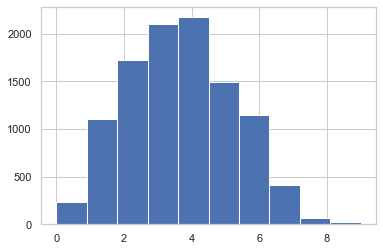

In [701]:
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'] = pivoteo['listado'].apply(lambda _: len([e for e in _ if e > 0]))
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'].hist()

In [702]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo['PERIODO'].max(), pivoteo['PERIODO'].min()

('202010', '201910')

In [703]:
del pivoteo['listado'] 

In [704]:
pivoteo['TMO_DEUDA_TOTAL_FULL_RCC_SF'] = pivoteo['suma']
del pivoteo['suma'] 

In [705]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1166)
(11003, 1190)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,14057119.32,0.594814,0.0,0.0,0.0,0.0,6310583.52,0.267027,4.0,23632785.75
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NUM ENTIDAES FULL RCC HISTORICO

In [706]:
acum = generate_listado_u3m(
    pivoteo, 'listados_num_entidades', values='NRO_ENTIDADES_FULL_RCC_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(807, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1614, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2421, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(3228, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(4035, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(4842, 3)


,COD_UNICO,listados_num_entidades,PERIODO
0,0000006114,"[3, 3, 3, 3, 3, 3, 3, 2, 2, 2]",202007
1,0000038026,"[4, 4, 4, 4, 4, 4, 4, 3, 3, 3]",202007
2,0000043778,"[3, 3, 3, 3, 3, 3, 3, 3, 4, 4]",202007
3,0000054320,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",202007
4,0000054635,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",202007


<AxesSubplot:>

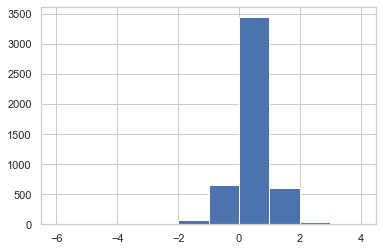

In [707]:
def varacion_num_bancos(lista):
    hace_6_meses = round((lista[-7] + lista[-6]) / 2, 0)
    return lista[-1] - hace_6_meses
    
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF']  = acum['listados_num_entidades'].apply(varacion_num_bancos)
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].hist()

In [708]:
acum['TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 1).astype(int)
acum['TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 1).astype(int)

acum['TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 2).astype(int)
acum['TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 2).astype(int)

acum['TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 3).astype(int)
acum['TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 3).astype(int)

In [709]:
del  acum['listados_num_entidades']

In [710]:
acum.head()

,COD_UNICO,PERIODO,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,0000006114,202007,-1.0,0,0,0,0,0,0
1,0000038026,202007,-1.0,0,0,0,0,0,0
2,0000043778,202007,1.0,1,1,0,0,0,0
3,0000054320,202007,0.0,0,0,0,0,0,0
4,0000054635,202007,0.0,0,0,0,0,0,0


In [711]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(11003, 1190)
(11003, 1197)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,202007,0016343477,20482843299,0,CORPORACION OTINGSA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202007,0011271101,20513208597,0,TRANSCORD,0,0,0,0,0,...,0.267027,4.0,23632785.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202007,0015508354,20555731150,0,TEOMA CORP,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [712]:
#    pivoteo = pd.pivot_table(
#        full_rcc, 
#        values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
#    ).unstack().unstack(level=0)#.reset_index()

#    pivoteo.head()

    #pivoteo.columns = columns + index + [col_name]

## OTROS BANCOS

In [713]:
print([col for col in analisis_cliente.columns if 'BBVA' in col.upper()])

['SOW_BBVA_ULT_RCC', 'MAX_DIAS_ATRASO_BBVASF_ULT_RCC', 'PERCETN_DEBT_IN__BBVASF_ULT_RCC', 'TIENE_DEBT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_SEGUIDA_MTOSALDO_BBVA_U3M_SF', 'DEBT_SUBIDA_SEGUIDA_MTOSALDO_BBVA_U3M_SF', 'DEBT_MENOR_MTOSALDO_BBVA_DE_U3M_SF', 'DEBT_MAYOR_MTOSALDO_BBVA_DE_U3M_SF', 'DEBT_NO_MTOSALDO_BBVA_SF_ESTE_MES', 'DEBT_NO_MTOSALDO_BBVA_SF_U2M', 'DEBT_NO_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M', 'PERCENT_GAR_BBVA', 'TIENE_MAYOR_GARTOTAL_EN_BBVA', 'MTO_DEUDA_FULL_RCC_BBVA', 'PERCENT_DEUDA_FUL_RCCBBVA']


In [714]:
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_MENOR_MTOSALDO_BBVA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_MENOR_MTOSALDO_BCP_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_MENOR_MTOSALDO_BIF_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_MENOR_MTOSALDO_SCOTIA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)

analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)


analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP',
    'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)

In [715]:

#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [716]:
analisis_cliente.shape

(11003, 1217)

In [717]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202012    1792
202011    1773
Name: PERIODO, dtype: int64

## PROTESTOS

In [718]:
prot = """
SELECT  * FROM ODS.HD_VMVP_PROTESTOS_ALERTAS_CARTERA_BE
"""
protesto = pd.read_sql(
   prot , connection_market
)

protesto['COD_UNICO'] = protesto['NUM_DOC']
protesto.head()

,PERIODO,NUM_DOC,MONTO_ADEUDADO,MIN_MONTO_ADEUDADO_ERIODO,COD_UNICO
0,202003,20112810791,47704.35,33355.70,20112810791
1,201903,20601076781,5037.00,5037.00,20601076781
2,201803,20507380515,80933.60,44947.72,20507380515
3,201808,20494419166,6747.22,6053.80,20494419166
4,202004,20513550830,4525.11,4525.11,20513550830


In [719]:
protesto.head()

,PERIODO,NUM_DOC,MONTO_ADEUDADO,MIN_MONTO_ADEUDADO_ERIODO,COD_UNICO
0,202003,20112810791,47704.35,33355.70,20112810791
1,201903,20601076781,5037.00,5037.00,20601076781
2,201803,20507380515,80933.60,44947.72,20507380515
3,201808,20494419166,6747.22,6053.80,20494419166
4,202004,20513550830,4525.11,4525.11,20513550830


In [720]:
protesto['COD_UNICO'] = protesto['NUM_DOC'].copy()   # artificio
acum = generate_listado_u3m(
    protesto, 'listado', values='MONTO_ADEUDADO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1456, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(2912, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(4368, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5824, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7280, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(8736, 3)


,COD_UNICO,listado,PERIODO
0,20100006538,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,20100013747,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
2,20100019940,"[3047.87, 3047.87, 3047.87, 22015.67, 22015.67...",202007
3,20100024277,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
4,20100032709,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


<AxesSubplot:>

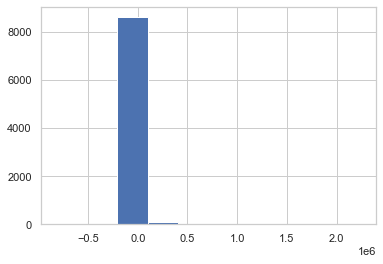

In [721]:
acum['TIENE_PROTESTO_REGISTRADO_MES_ACTUAL'] = acum['listado'].apply(lambda _: _[-1] > 0)
acum['TPROTESTO_REGISTRADO_MAYOR_A_10MIL_SOLES'] = acum['listado'].apply(lambda _: _[-1] >= 10000)
acum['TPROTESTO_REGISTRADO_MAYOR_A_5MIL_SOLES'] = acum['listado'].apply(lambda _: _[-1] >= 5000)
acum['TPROTESTO_REGISTRADO_MAYOR_A_MIL_SOLES'] = acum['listado'].apply(lambda _: _[-1] >= 1000)
acum['TPROTESTO_REGISTRADO_MAYOR_A_2.5MIL_SOLES'] = acum['listado'].apply(lambda _: _[-1] >= 2500)
acum['TPROTESTO_REGISTRADO_MAYOR_A_7.5MIL_SOLES'] = acum['listado'].apply(lambda _: _[-1] >= 7500)
acum['TENDENCIA_PROTESTOS_U7M'] = acum['listado'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_PROTESTOS_U7M'].hist()

In [722]:
acum['TIENE_TENDENCIA_CRECIENTE_U7M'] = acum['TENDENCIA_PROTESTOS_U7M'].apply(lambda _: _ > 0)

In [723]:
def searhc_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val <= 0:
            return meses
        meses += 1
    
    return meses

def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

acum['NRO_MESES_ANTERIORES_CON_PROTESTOS_CONSECUTIVOS'] = acum['listado'].apply(lambda _: searhc_zero(_))
acum['NRO_MESES_ANTERIORES_SIN_PROTESTOS'] = acum['listado'].apply(lambda _: searhc_no_zero(_))

In [724]:
[col for col in analisis_cliente if 'RUC' in col.upper()]

['RUC']

In [725]:
[col for col in analisis_cliente if 'DOC' in col.upper()]

[]

In [726]:
del acum['listado']

In [727]:
acum['RUC'] = acum['COD_UNICO']
del  acum['COD_UNICO']

In [728]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'RUC']
)
#del pivoteo
print(analisis_cliente.shape)

(11003, 1217)
(11003, 1227)


In [729]:
if 'listado' in analisis_cliente.columns:
    del analisis_cliente['listado']

In [730]:
#list(analisis_cliente.columns)[-30:]

In [731]:
#assert False

## RIESGO

In [732]:
riesgo_sql = """
    SELECT  * FROM ODS.HD_VMVP_SALDO_RIESGO_ALERTAS_CARTERA_BE
"""
riesgo = pd.read_sql(
   riesgo_sql , connection_market
)

riesgo.head()

,PERIODO,CODUNICOCLI,RIESGO
0,202011,0013156974,0.0
1,201807,0009544922,0.0
2,201605,0013985843,0.0
3,202012,0015685789,0.0
4,201812,0008939286,0.0


In [733]:
riesgo['COD_UNICO'] = riesgo['CODUNICOCLI']
acum = generate_listado_u3m(
    riesgo, 'listado', values='RIESGO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(169011, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(338022, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(507033, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(676044, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(845055, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(1014066, 3)


,COD_UNICO,listado,PERIODO
0,0000002469,"[21245091.474046875, 12307280.730906248, 0.0, ...",202007
1,0000002626,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
2,0000002667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
3,0000003152,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
4,0000003392,"[103329802.29565625, 104505564.76317187, 68829...",202007


In [734]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_RIESGO_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_RIESGO_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_RIESGO_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m =(lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_RIESGO_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_AUMENTO_RIESGO_U7M,TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U7M,...,TIENE_AUMENTO_RIESGO_70PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_U3M,TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U3M
0,0000002469,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000002626,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000002667,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000003152,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000003392,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [735]:
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M'].value_counts()

0    991625
1     22441
Name: TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M, dtype: int64

In [736]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(11003, 1227)
(11003, 1247)


In [ ]:
#assert False

### SALDOS DIARIOS - PRODUCTOS

In [737]:
saldo_producto = """
    SELECT  * FROM ODS.HD_VMVP_SALDOS_DIARIOS_PRODUTCOS_CARTERA_BE
"""
colocacion = pd.read_sql(
   saldo_producto , connection_market
)

colocacion.head()

,PERIODO,TIPOPRODUCTO,PLAZO_PRODUCTO,CODUNICOCLI,SALDO
0,201808,COL_DIRECTAS,MEDIANO PLAZO,0007567530,2.402795e+06
1,201711,COL_DIRECTAS,CORTO PLAZO,0000060400,2.004769e+07
2,201711,COL_DIRECTAS,CORTO PLAZO,0011865874,4.268762e+06
3,201712,COL_DIRECTAS,CORTO PLAZO,0010853304,1.296400e+07
4,201606,COL_DIRECTAS,MEDIANO PLAZO,0012758760,4.655826e+04


In [738]:
colocacion['TIPOPRODUCTO'].value_counts(dropna=False)

COL_DIRECTAS      92912
COL_INDIRECTAS    24128
Name: TIPOPRODUCTO, dtype: int64

In [739]:
colocacion['PLAZO_PRODUCTO'].value_counts(dropna=False)

CORTO PLAZO      50278
MEDIANO PLAZO    42634
NaN              23516
                   612
Name: PLAZO_PRODUCTO, dtype: int64

In [743]:
colocacion['COD_UNICO'] = colocacion['CODUNICOCLI']

acum = generate_listado_u3m(
    colocacion[colocacion['TIPOPRODUCTO'] == 'COL_DIRECTAS'], 'listado', values='SALDO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1929, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3858, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5787, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7716, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9645, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(11574, 3)


,COD_UNICO,listado,PERIODO
0,0000002469,"[5599074.59375, 2209968.203125, 0.0, 0.0, 0.0,...",202007
1,0000003392,"[103329802.29565625, 104505564.76317188, 68829...",202007
2,0000006114,"[8340626.415390626, 7652589.043765624, 7128833...",202007
3,0000008318,"[1757365.921875, 1680068.21875, 1511842.085937...",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


In [744]:
def get_percent_(lista, treshold):
    media_hace_7m = max([lista[-7], lista[-6]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_COL_DIRECTA_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = max([lista[-2], lista[-3]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_COL_DIRECTA_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_DIRECTA_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

acum['COL_DIRECTA_MES_ACTUAL'] =  acum['listado'].apply(lambda _: _[-1])
del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_AUMENTO_COL_DIRECTA_U7M,TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U7M,...,TIENE_AUMENTO_COL_DIRECTA_U3M,TIENE_AUMENTO_COL_DIRECTA_1_PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_3_PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_5PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_10PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_20PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_30PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_40PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_DIRECTA_50PERCENT_A_MAS_U3M,COL_DIRECTA_MES_ACTUAL
0,0000002469,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000e+00
1,0000003392,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.627984e+07
2,0000006114,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.187401e+06
3,0000008318,202007,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,2.125203e+06
4,0000037374,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000e+00


In [745]:
acum['PERIODO'].value_counts(dropna=False)

202012    1929
202007    1929
202009    1929
202008    1929
202011    1929
202010    1929
Name: PERIODO, dtype: int64

In [746]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(11003, 1247)
(11003, 1268)


In [747]:
acum = generate_listado_u3m(
    colocacion[colocacion['TIPOPRODUCTO'] == 'COL_INDIRECTAS'], 'listado', values='SALDO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(794, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1588, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2382, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(3176, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(3970, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(4764, 3)


,COD_UNICO,listado,PERIODO
0,0000002469,"[15646016.880296877, 10097312.527781252, 0.0, ...",202007
1,0000003392,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
2,0000006114,"[850780.0, 893319.0, 893319.0, 850780.0, 85078...",202007
3,0000008318,"[8632612.925492186, 18194793.738457028, 176194...",202007
4,0000038026,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


In [748]:
def get_percent_(lista, treshold):
    media_hace_7m = max([lista[-7], lista[-6]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_COL_INDIRECTA_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = max([lista[-2] , lista[-3]]) 
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_COL_INDIRECTA_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_COL_INDIRECTA_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_AUMENTO_COL_INDIRECTA_U7M,TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U7M,...,TIENE_AUMENTO_COL_INDIRECTA_70PERCENT_A_MAS_U7M,TIENE_AUMENTO_COL_INDIRECTA_U3M,TIENE_AUMENTO_COL_INDIRECTA_1_PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_3_PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_5PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_10PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_20PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_30PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_40PERCENT_A_MAS_U3M,TIENE_AUMENTO_COL_INDIRECTA_50PERCENT_A_MAS_U3M
0,0000002469,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,202007,1,1,1,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
3,0000008318,202007,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0000038026,202007,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [749]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(11003, 1268)
(11003, 1288)


In [751]:
#[col for col in analisis_cliente if 'COL_DIRECTA' in col]

## PROVEEDORES

In [752]:
proveedores_sql = """
    SELECT  * FROM ODS.HD_VMVP_PAGOS_PROVEEDORES_ALERTAS_CARTERA_BE
"""
proveedores = pd.read_sql(
   proveedores_sql , connection_market
)

proveedores.head()

,PERIODO,COD_UNICO,VOLUMEN
0,202012,0000003392,3784.97
1,202008,0000008318,118391.14
2,202010,0000043141,2019011.52
3,202008,0000044768,5283.21
4,202010,0000251447,12369.15


In [753]:
acum = generate_listado_u3m(
    proveedores, 'listado', values='VOLUMEN',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(727, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1454, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2181, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(2908, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(3635, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(4362, 3)


,COD_UNICO,listado,PERIODO
0,0000003392,"[0.0, 0.0, 5096.44, 0.0, 0.0, 85703.81, 326376...",202007
1,0000008318,"[0.0, 25471.98, 0.0, 58592.81, 3917.6, 23189.6...",202007
2,0000042044,"[0.0, 123018.54, 0.0, 0.0, 2400.0, 0.0, 0.0, 0...",202007
3,0000043141,"[1313263.3, 1032465.48, 1941097.32, 1606072.91...",202007
4,0000043778,"[0.0, 0.0, 0.0, 0.0, 5324.0, 3397.5, 47.0, 442...",202007


In [754]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = (lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_3m:
        return 0
    
    return ultimo_mes/media_hace_3m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U3M
0,0000003392,202007,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0000008318,202007,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2,0000042044,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0000043141,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0000043778,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [755]:
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M'].value_counts()

0    2855
1    1507
Name: TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M, dtype: int64

In [756]:
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M'].value_counts()

0    3054
1    1308
Name: TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M, dtype: int64

In [757]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(11003, 1288)
(11003, 1306)


In [758]:
for column in [col for col in analisis_cliente.columns if 'listado' in  col.lower()]:
    del analisis_cliente[column]

In [759]:
gc.collect()

44

In [766]:
[col for col in analisis_cliente.columns if 'listado' in col.lower() or 'index' in col.lower]

TypeError: argument of type 'builtin_function_or_method' is not iterable

In [760]:
#assert False
analisis_cliente.to_csv("AVANCE_5.csv", index=False)

In [761]:
raise Exception("VICTOR DICE:  AUGANTA TU COCHE")

Exception: VICTOR DICE:  AUGANTA TU COCHE

In [ ]:
%%time

from sqlalchemy import create_engine
engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
connection_x = engine.connect()

try:
    analisis_cliente.replace([np.inf, -np.inf], np.nan).to_sql(
        name='HD_DATASET_ALERTA_CARTERA_BE',
        schema='ODS',
        con=connection_x, 
        index=False, 
        if_exists='replace'
    )
    connection_x.close()
    correct = 1
except Exception as e:
    print("ERROR: ", str(e))
    correct = 0

print(correct)

### AANALISIS VARIABLE

##### En otro notebook